In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np


def sample_sequences(df, N):
    # Group by position
    grouped = df.groupby("position")

    # Store probabilities and amino acids per position
    position_probs = {}
    for pos, group in grouped:
        aas = group['aa'].tolist()
        freqs = group['frequency'].astype(float).values
        probs = freqs / freqs.sum()  # normalize to probability
        position_probs[pos] = (aas, probs)

    # Sort by position to maintain order
    sorted_positions = sorted(position_probs.keys())

    # Sample N sequences
    sequences = []
    for _ in range(N):
        seq = ''.join(
            np.random.choice(position_probs[pos][0], p=position_probs[pos][1])
            for pos in sorted_positions
        )
        sequences.append(seq)

    return sequences


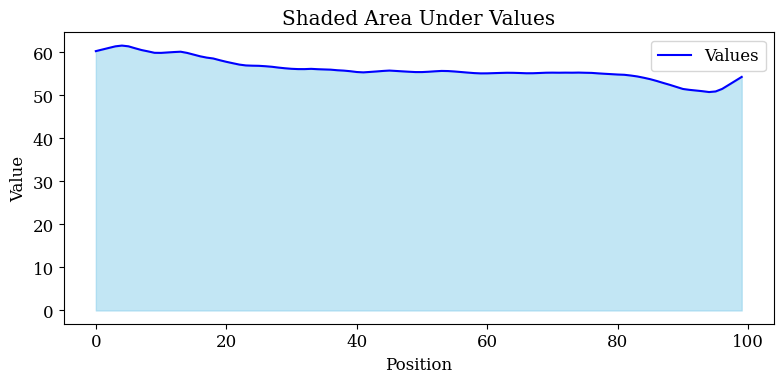

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
idx = '13282'
num = 3
mode = 'SMPO_noMLM'
df_heatmap = pd.read_csv(f'/content/drive/MyDrive/SMPO/Figures/Appendices/{mode}_feature_activations_{idx}.csv')
values = df_heatmap[f'feature_{idx}'].values
x = range(len(values))
plt.figure(figsize=(8, 4))

# Plot the values
plt.plot(x, values, label='Values', color='blue')

# Fill the area under the curve
plt.fill_between(x, values, color='skyblue', alpha=0.5)

# Labels and title
plt.xlabel('Position')
plt.ylabel('Value')
plt.title('Shaded Area Under Values')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# set matplotlib fonts to Serif
idx = idx
num = 3
mode = 'SMPO'
df_pssm = pd.read_csv(f'/content/drive/MyDrive/SMPO/Figures/Appendices/{idx}_pssm_{mode}_noMLM_.csv')

# Example usage:
sampled_sequences = sample_sequences(df_pssm, N=5000)
for i, seq in enumerate(sampled_sequences):
    print(f"{seq}")

SWMAL
LLLMM
RLTAI
LLALT
SLTLW
LLMLW
SMYSL
TTWLI
FLLCA
SRACA
ALMIE
CMWMW
RTMSE
AMTLL
LCLII
LSLAE
LLLWD
WYLMW
TCWSE
RLAIL
TMLAL
TCLLW
LSLAA
CCCCA
LLLLI
TCLAD
FYLAW
SCSLW
TLLWW
ARYAA
SLYAL
TTCSM
RWLLC
TLYWD
SLLSD
RMYLA
CYTME
TTSAL
CYCAD
LTLWE
CWTLL
RRLTL
SMLAE
FYTMW
CLLWW
LLWLA
SLLIA
LLLMC
ARLLE
AYYWI
FLCLD
AWTSW
SSLLL
LSLWW
TTMAC
WLLIL
RLYAC
TLCML
SSYAT
CSLAD
CSWAL
RMLIA
SCLCI
FWMLW
WMSWE
SRWWL
RWSLE
LYCLW
SCMAM
SRLLI
LSWTW
SCLAD
LLAWW
LCYLI
LSLLC
LSSTD
RSLST
WTLII
RWWIE
LLSTD
LLTTD
SLSMA
CTYTA
RLACD
LLMCE
CWLSC
SSTIM
RLTAT
RYLAC
ACLWM
SLLTT
WCSAM
CRAII
RMMTA
FMLMA
LYSMA
LCACD
FWMML
LRLSM
LWMWA
LMWMT
RYYIL
LLATC
WSYAC
RWLTL
FLLLM
LWCAA
SCCCM
WLLAW
LTWWI
LYWLE
CLLCT
LRWLI
WYSTT
CTLIM
LLAAM
LRAWD
CSWAW
CMWII
TSYMD
AWSTM
LRLAW
RLYLE
RSSTC
ACALC
LSYAD
RRCCW
SLMLC
TWTMW
WTYSC
LCTLC
TRWMC
TSMAT
LMCIM
CLLIE
WRWAT
LTTMW
FRLAC
LLLTL
LCLAI
LMLMD
SWYTI
LWLLD
CLTII
LLCMA
WTLLL
FWSLD
FYWCA
CWLTA
LTAAT
SMLAW
LYMCC
RLSWL
FMSLL
TLMSW
ASSAC
LSAWC
CSCLI
LSMMI
TYCST
WMLLC
AMLSA
RCLWW
RLCAC
ALAIT
LLLAW
TLAM

In [ ]:
from sklearn.metrics import r2_score
import numpy as np

# Compute R² for each fold
r2_per_fold = df.groupby('fold').apply(
    lambda group: r2_score(group['actual'], group['predicted'])
)

# Average R² across all folds
average_r2 = r2_per_fold.mean()

print("Average R² across all folds:", average_r2)


In [ ]:
!pip install transformers evaluate datasets requests pandas scikit-learn fair-esm wandb graph-part python-Levenshtein biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 101.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 79.1 MB/s eta 0:00:00


## Preference Tuning

### Homology Partitioning

In [ ]:
from graph_part import train_test_validation_split, stratified_k_fold
from sys import exit

In [ ]:
# Install mamba and setup conda environment in Google Colab
!pip install -q condacolab
import condacolab
condacolab.install()

# Create a new code cell and run these commands
!mamba install -y -c conda-forge mamba
!mamba create -n myenv -y
!mamba init bash
!source ~/.bashrc
!conda activate myenv
!mamba install -y -c bioconda emboss

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.11.0-0/Mambaforge-23.11.0-0-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:10
🔁 Restarting kernel...

Looking for: ['mamba']

[+] 0.0s
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+] 0.1s
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+] 0.2s
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+] 0.3s
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+] 0.4s
conda-forge/linux-64  ⣾  
conda-forge/noarch     1%[+] 0.5s
conda-forge/linux-64   1%
conda-forge/noarch    18%[+] 0.6s
conda-forge/linux-64   1%
conda-forge/noarch    36%[+] 0.7s
conda-forge/linux-64   1%
conda-forge/noarch    40%[+] 0.8s
conda-forge/linux-64   2%
conda-forge/noarch    52%[+] 0.9s
conda-forge/linux-64   2%
conda-forge/noarch    70%[+] 1.0s
conda-forge/linux-64   2%
conda-forge/noarch    91%conda-forge/noarch                                
[+] 1.1s
conda-forge/linux-64

In [ ]:
import pandas as pd
df = pd.read_csv('/content/tm_library_annotated.csv')
sequences = df['aa_seq'].tolist()
train_idx, test_idx, valid_idx = train_test_validation_split(sequences,
                                                             alignment_mode='needle',
                                                             threads = 8,
                                                             threshold = 0.5,
                                                             test_size = 0.15,
                                                             valid_size = 0.05
                                                            )


Computing pairwise sequence identities.


  0%|          | 0/31629376 [00:00<?, ?it/s]

Full graph nr. of edges: 20435
281 [281]
Initialization mode slow-nn



Initializing: 5624it [00:00, 341579.05it/s]


Edge iteration completed in 0.02 seconds.
Edge sorting competed at 0.02 seconds.



clustering: 100%|██████████| 20435/20435 [00:00<00:00, 85004.81it/s]


1
Currently have this many samples: 5624
!  seq_1 seq_5451 {'metric': 0.478}  !
Need to remove! Currently have this many samples: 5624
After removal we have this many samples: 5614


In [ ]:
import pandas as pd
df = pd.read_csv('/content/tm_library_annotated.csv')
df_train = df.iloc[train_idx]
df_train.to_csv("tm_library_train.csv")
df_val = df.iloc[valid_idx]
df_val.to_csv("tm_library_val.csv")
df_test = df.iloc[test_idx]
df_test.to_csv("tm_library_test.csv")
print(len(train_idx), len(valid_idx), len(test_idx))

4549 266 799


In [ ]:
import pandas as pd
import numpy as np

def split_and_save_dataframe(df, train_ratio=0.8, val_ratio=0.05, test_ratio=0.15, train_file='train.csv', val_file='val.csv', test_file='test.csv'):
    # Ensure the ratios sum to 1.0
    assert train_ratio + val_ratio + test_ratio == 1.0, "The ratios must sum to 1.0"

    # Shuffle the dataframe
    df = df.sample(frac=1, random_state=42).reset_index(drop=True)

    # Determine the number of rows for each split
    train_size = int(train_ratio * len(df))
    val_size = int(val_ratio * len(df))
    test_size = len(df) - train_size - val_size

    # Split the dataframe
    train_df = df.iloc[:train_size]
    val_df = df.iloc[train_size:train_size + val_size]
    test_df = df.iloc[train_size + val_size:]

    # Save to CSV files
    train_df.to_csv(train_file, index=False)
    val_df.to_csv(val_file, index=False)
    test_df.to_csv(test_file, index=False)

    return train_df, val_df, test_df

# Example usage
df = pd.read_csv('/content/tm_library_annotated.csv')  # Replace with your dataframe loading method
train_df, val_df, test_df = split_and_save_dataframe(df, train_file='tm_library_train.csv', val_file='tm_library_val.csv', test_file='tm_library_test.csv')


In [ ]:
import pandas as pd
import random

def split_with_extension(df, column='aa_seq', test_size=0.15, val_size=0.05, random_seed=42, train_file='tm_library_train.csv', val_file='tm_library_val.csv', test_file='tm_library_test.csv'):
    """
    Splits a dataframe into train, test, and validation sets ensuring that
    sequences and their extended forms are in the same split.

    Parameters:
    - df: pd.DataFrame, the dataframe to split.
    - column: str, the column name containing the sequences.
    - test_size: float, the proportion of the data to include in the test split.
    - val_size: float, the proportion of the data to include in the validation split.
    - random_seed: int, seed for reproducibility.

    Returns:
    - train_df, test_df, val_df: pd.DataFrame, the train, test, and validation splits.
    """
    # Group sequences by their base form
    sequence_groups = {}
    for seq in df[column]:
        base_seq = min((seq[:i] for i in range(1, len(seq)+1) if seq[:i] in df[column].values), key=len, default=seq)
        sequence_groups.setdefault(base_seq, []).append(seq)

    # Create groups for splitting
    grouped_data = list(sequence_groups.values())

    # Shuffle groups for randomness
    random.seed(random_seed)
    random.shuffle(grouped_data)

    # Determine sizes
    total_groups = len(grouped_data)
    test_count = int(total_groups * test_size)
    val_count = int(total_groups * val_size)

    # Assign splits
    test_groups = grouped_data[:test_count]
    val_groups = grouped_data[test_count:test_count + val_count]
    train_groups = grouped_data[test_count + val_count:]

    # Create splits
    test_sequences = {seq for group in test_groups for seq in group}
    val_sequences = {seq for group in val_groups for seq in group}
    train_sequences = {seq for group in train_groups for seq in group}

    test_df = df[df[column].isin(test_sequences)]
    val_df = df[df[column].isin(val_sequences)]
    train_df = df[df[column].isin(train_sequences)]

    train_df.to_csv(train_file, index=False)
    val_df.to_csv(val_file, index=False)
    test_df.to_csv(test_file, index=False)

    return train_df, test_df, val_df

# Example usage:
df = pd.read_csv("/content/tm_library_annotated.csv")
train_df, test_df, val_df = split_with_extension(df, column="tm_seq", train_file='tm_library_train.csv', val_file='tm_library_val.csv', test_file='tm_library_test.csv')


In [ ]:
display(train_df.head())

,seq_id,retention_score_r1,retention_score_r2,avg_retention_score,induction_score_r1,induction_score_r2,avg_induction_score,aa_seq,entry,start_idx,...,protein_family,protein_superfamily,protein_subfamily,domains,motifs,jxt,jxt_seq,tm_seq,tm_number,total_tm
1,Q9BZD6_114-134_g1,0.99,1.04,1.02,0.52,0.69,0.602900,VMGLLTGLIAAGVFLVIFGLL,Q9BZD6,114.0,...,Commissureless,NaN,NaN,['Gla'],NaN,False,NaN,VMGLLTGLIAAGVFLVIFGLL,1,1
2,Q96H15_315-335_g1,1.83,1.77,1.80,2.55,1.34,1.942436,LLMIIAPSLGFVLFALFVAFL,Q96H15,315.0,...,TIM,Immunoglobulin,NaN,['Ig-like V-type'],NaN,False,NaN,LLMIIAPSLGFVLFALFVAFL,1,1
3,P35916_776-796_g1,1.40,1.60,1.50,1.05,1.28,1.168214,IVILVGTGVIAVFFWVLLLLI,P35916,776.0,...,Tyr protein kinase,Protein kinase,CSF-1/PDGF receptor,"['Ig-like C2-type 1', 'Ig-like C2-type 2', 'Ig...",NaN,False,NaN,IVILVGTGVIAVFFWVLLLLI,1,1
4,P22309_491-507_g1,1.10,0.60,0.85,2.70,1.63,2.168671,VIGFLLAVVLTVAFITF,P22309,491.0,...,UDP-glycosyltransferase,NaN,NaN,NaN,NaN,False,NaN,VIGFLLAVVLTVAFITF,1,1
5,Q8N0Z9_414-434_g1,2.06,2.12,2.09,1.08,1.33,1.207035,IVGTIVSLLLLGLAIISGLLL,Q8N0Z9,414.0,...,NaN,NaN,NaN,"['Ig-like C2-type 1', 'Ig-like C2-type 2', 'Ig...",NaN,False,NaN,IVGTIVSLLLLGLAIISGLLL,1,1


### Model and Finetuning

In [ ]:
import torch
import torch.nn.functional as F
from transformers import AutoModel, EsmForMaskedLM, EsmForProteinFolding, AutoTokenizer, EsmConfig, EsmModel
import esm

model_size = (30, '150M')
model_checkpoint = f"facebook/esm2_t{model_size[0]}_{model_size[1]}_UR50D"
#model_checkpoint = "facebook/esmfold_v1"

In [ ]:
config = EsmConfig.from_pretrained(model_checkpoint)
print(config)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/779 [00:00<?, ?B/s]

EsmConfig {
  "architectures": [
    "EsmForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.0,
  "classifier_dropout": null,
  "emb_layer_norm_before": false,
  "esmfold_config": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 640,
  "initializer_range": 0.02,
  "intermediate_size": 2560,
  "is_folding_model": false,
  "layer_norm_eps": 1e-05,
  "mask_token_id": 32,
  "max_position_embeddings": 1026,
  "model_type": "esm",
  "num_attention_heads": 20,
  "num_hidden_layers": 30,
  "pad_token_id": 1,
  "position_embedding_type": "rotary",
  "token_dropout": true,
  "torch_dtype": "float32",
  "transformers_version": "4.51.3",
  "use_cache": true,
  "vocab_list": null,
  "vocab_size": 33
}



cuda


tokenizer_config.json:   0%|          | 0.00/95.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/93.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/595M [00:00<?, ?B/s]

Some weights of EsmModel were not initialized from the model checkpoint at facebook/esm2_t30_150M_UR50D and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Outputs shape: torch.Size([2, 20, 640])
Contacts shape: (2, 18, 18)


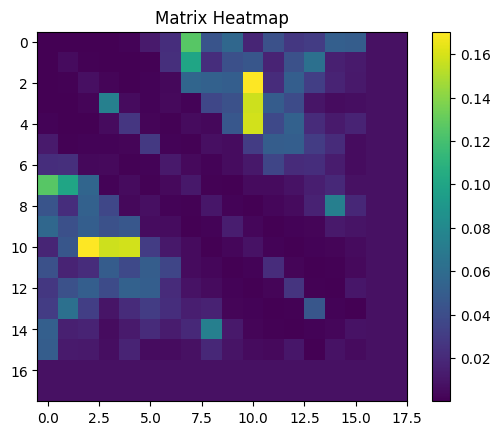

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def get_log_prob(logits, labels):
    log_probs = F.log_softmax(logits, dim=-1)
    return torch.gather(log_probs, -1, labels.unsqueeze(-1)).squeeze(-1).mean(-1)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
####################### TELEMETRY ###########################################
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

model = EsmModel.from_pretrained(model_checkpoint).to(device)
model.eval()
#ref_model = EsmForMaskedLM.from_pretrained(model_checkpoint)

sequences = [
    'MVLSPADKTNVKAAWG',
    'MVLSPADKTNVKAAW',
    #'MVLSPADKTNVKAAWGKVGAHAGEYGAEALERMFLSFPTTKTYFPHFDSHGSAQVKGHGKKVADALTNAVAHVDDMPNALSELHCDKLHVDPENFRLLGNVLVCVLAHHFGKEFTPPVQAAYQKVVAGVANALAHKYH',
    #'ADKGTVWMLFQHSERPIVNRTFYCHQWASLDZMPKTNEGGWPLAKJXSVBMCLNFDYAHTRBGUKSPVIQWEMRXOZUFLPDCNQYHTKGJWVABZMSLEKRFXPIAQNWYTGOJSUVMCZKLDHPRETBWFGYAL'
]
max_length = 20 #max([len(seq) for seq in sequences])

#Tokenize and pad/truncate the sequences
tokens = tokenizer(sequences, padding="max_length", max_length=max_length, truncation=True, return_tensors="pt").to(device)
input_ids = tokens["input_ids"]
attention_mask = tokens["attention_mask"]
#inputs = tokenizer(sequences, return_tensors="pt", add_special_tokens=False, padding='max_length', max_length=max_length).to(device)

with torch.no_grad():
  #outputs = model(**inputs)
  #print(outputs.positions)
  contacts = model.predict_contacts(tokens=input_ids, attention_mask=attention_mask).cpu().numpy()
  outputs = model(input_ids=input_ids, attention_mask=attention_mask).last_hidden_state
  print(f"Outputs shape: {outputs.shape}")
  print(f"Contacts shape: {contacts.shape}")
  plt.imshow(contacts[0,:,:], cmap='viridis', interpolation='nearest')
  plt.colorbar()  # Show color scale
  plt.title('Matrix Heatmap')
  plt.show()

  # print(outputs.logits.shape)
  # print(get_log_prob(outputs.logits, input_ids))

  # del model
  #del ref_model
  ####################### TELEMETRY ###########################################


In [ ]:
# DPO Functions
import torch.nn.functional as F
import torch.nn as nn
import math
# def get_log_prob(logits, labels):
#     log_probs = F.log_softmax(logits, dim=-1)
#     return torch.gather(log_probs, -1, labels.unsqueeze(-1)).squeeze(-1).mean(-1)

def get_log_prob(logits, labels, attention_mask):
    log_probs = F.log_softmax(logits, dim=-1)
    gathered_and_apply_attention = torch.gather(log_probs, -1, labels.unsqueeze(-1)).squeeze(-1) * attention_mask
    sequence_lengths = (labels != tokenizer.pad_token_id).sum(dim=-1)
    return gathered_and_apply_attention.sum(dim=-1) / sequence_lengths.float()

class MonotonicPiecewiseLinearTransform(nn.Module):
    """
    Learns a piecewise linear monotonic mapping of scores into a different space,
    prioritizing certain ranges based on training data.

    This mapping preserves monotonicity while allowing flexible control over
    how different score ranges are transformed.
    """
    def __init__(self, num_pieces=10, input_min=0.0, input_max=1.0,
                 output_min=0.0, output_max=1.0, init_strategy='linear'):
        super().__init__()
        self.num_pieces = num_pieces
        self.register_buffer('input_min', torch.tensor(input_min))
        self.register_buffer('input_max', torch.tensor(input_max))
        self.register_buffer('output_min', torch.tensor(output_min))
        self.register_buffer('output_max', torch.tensor(output_max))

        # Create knot points for the piecewise linear function
        # These are the x-coordinates of the knots, evenly spaced
        knot_x = torch.linspace(input_min, input_max, num_pieces + 1)
        self.register_buffer('knot_x', knot_x)

        # Initialize the y-coordinates of the knots based on strategy
        if init_strategy == 'linear':
            # Start with a linear mapping
            init_knot_y = torch.linspace(output_min, output_max, num_pieces + 1)
        elif init_strategy == 'identity':
            # Start with proportional mapping
            init_knot_y = knot_x * (output_max - output_min) / (input_max - input_min) + output_min
        else:
            raise ValueError(f"Unknown initialization strategy: {init_strategy}")

        # Instead of directly learning knot_y values, we'll learn increments
        # to ensure monotonicity. The increments must be positive.
        # We'll initialize increments from the initial knot_y values
        init_increments = torch.zeros(num_pieces)
        for i in range(num_pieces):
            init_increments[i] = init_knot_y[i+1] - init_knot_y[i]

        # Store the first knot's y-value
        self.first_knot_y = nn.Parameter(init_knot_y[0].clone())

        # Learn the positive increments between knots (log space for stable optimization)
        # Add a small epsilon to avoid log(0)
        self.log_increments = nn.Parameter(torch.log(init_increments + 1e-6))

        # Parameters for adaptively focusing on specific regions
        self.focus_strength = nn.Parameter(torch.zeros(num_pieces))

    def forward(self, inputs):
        """Transform inputs using the learned piecewise linear mapping."""
        # Handle scalar inputs
        if not isinstance(inputs, torch.Tensor):
            inputs = torch.tensor(inputs)
        inputs = inputs.float()

        # Reshape inputs for processing
        original_shape = inputs.shape
        x = inputs.reshape(-1)

        # Clamp inputs to valid range
        x = torch.clamp(x, self.input_min, self.input_max)

        # Compute the knot y-coordinates from learned increments
        increments = torch.exp(self.log_increments)  # Ensure positivity
        knot_y = torch.zeros(self.num_pieces + 1, device=x.device)
        knot_y[0] = self.first_knot_y
        knot_y[1:] = self.first_knot_y + torch.cumsum(increments, dim=0)

        # Clamp output range
        knot_y = torch.clamp(knot_y, self.output_min, self.output_max)

        # Apply the focus attention to the increments
        # Stronger focus means steeper slope in that region
        focus_factors = 1.0 + F.softplus(self.focus_strength)

        # Initialize output tensor
        outputs = torch.zeros_like(x)

        # Apply piecewise linear interpolation
        for i in range(self.num_pieces):
            # Find indices of points that fall in this piece
            mask = (x >= self.knot_x[i]) & (x <= self.knot_x[i+1])
            if not mask.any():
                continue

            # For points in this piece, calculate the interpolated value
            alpha = (x[mask] - self.knot_x[i]) / (self.knot_x[i+1] - self.knot_x[i])
            piece_output = knot_y[i] + alpha * (knot_y[i+1] - knot_y[i])

            # Apply focus factor to this piece (steepens the slope)
            # The focus factor controls how much we prioritize this range
            x_centered = (x[mask] - (self.knot_x[i] + self.knot_x[i+1])/2) / (self.knot_x[i+1] - self.knot_x[i])
            adjustment = focus_factors[i] * (piece_output - knot_y[i]) * (1 - x_centered**2)
            outputs[mask] = piece_output + adjustment

        # Ensure outputs are within bounds
        outputs = torch.clamp(outputs, self.output_min, self.output_max)

        # Restore original shape
        return outputs.reshape(original_shape)

    def get_mapping(self, num_points=1000):
        """
        Returns points to visualize the learned piecewise linear mapping.
        """
        with torch.no_grad():
            x = torch.linspace(self.input_min.item(), self.input_max.item(), num_points)
            y = self.forward(x)
            return x.cpu().numpy(), y.cpu().numpy()

    def get_knots(self):
        """
        Returns the learned knot points of the piecewise linear function.
        """
        with torch.no_grad():
            increments = torch.exp(self.log_increments)
            knot_y = torch.zeros(self.num_pieces + 1)
            knot_y[0] = self.first_knot_y.item()
            knot_y[1:] = self.first_knot_y.item() + torch.cumsum(increments, dim=0).cpu()

            # Get focus factors
            focus_factors = 1.0 + F.softplus(self.focus_strength).cpu().numpy()

            return {
                'knot_x': self.knot_x.cpu().numpy(),
                'knot_y': knot_y.numpy(),
                'focus_factors': focus_factors
            }

def calculate_DPO_loss(model_prefered_logprob, model_disprefered_logprob,
                       ref_prefered_logprob, ref_disprefered_logprob, mnn=None, strengths=None,
                       beta=1.0, ipo=True, label_smoothing=0.0, reference_free=False):
    beta = beta * strengths
    if(mnn):
      beta = mnn(beta.unsqueeze(-1)).squeeze(-1)

    beta_transformed = 1/(2 * beta)

    prefered_relative_logprob = model_prefered_logprob - ref_prefered_logprob
    disprefered_relative_logprob = model_disprefered_logprob - ref_disprefered_logprob

    pi_logratios = model_prefered_logprob - model_disprefered_logprob
    ref_logratios = ref_prefered_logprob - ref_disprefered_logprob
    # losses = -F.logsigmoid(beta * logits) = -F.logsigmoid(beta * (pi_logratios - ref_logratios))

    if(reference_free):
      ref_logratios = 0.0

    logits = pi_logratios - ref_logratios  # also known as h_{\pi_\theta}^{y_w,y_l}
    reward_accuracies = (prefered_relative_logprob > disprefered_relative_logprob).float().mean(dim=-1)
    reward_margins = (prefered_relative_logprob - disprefered_relative_logprob).mean(dim=-1)

    if(ipo):
        loss = (logits - 1/(2 * beta_transformed)) ** 2#(logits - 1/(2 * beta)) ** 2  # Eq. 17 of https://arxiv.org/pdf/2310.12036v2.pdf
        loss = loss.mean()
    else:
        loss = -F.logsigmoid(beta_transformed * logits) * (1 - label_smoothing) - F.logsigmoid(-beta_transformed * logits) * label_smoothing # -F.logsigmoid(beta * (prefered_relative_logprob - disprefered_relative_logprob)) #
        loss = loss.mean()

    return loss, prefered_relative_logprob.mean(dim=-1), disprefered_relative_logprob.mean(dim=-1), reward_accuracies, reward_margins, pi_logratios, ref_logratios

In [ ]:
import torch
from torch.utils.data import Dataset
import pandas as pd
import random
import itertools
from itertools import combinations
import numpy as np
from tqdm import tqdm
from Levenshtein import distance

def collate_fn(batch, device):
    # Unpack the batch
    prefered_ids, disprefered_ids, prefered_mask, disprefered_mask, strengths = zip(*batch)

    # Stack the tensors
    prefered_ids = torch.stack(prefered_ids).to(device)
    disprefered_ids = torch.stack(disprefered_ids).to(device)
    prefered_mask = torch.stack(prefered_mask).to(device)
    disprefered_mask = torch.stack(disprefered_mask).to(device)
    strengths = torch.tensor(strengths).to(device)

    return {'prefered_ids': prefered_ids,
            'disprefered_ids': disprefered_ids,
            'prefered_mask': prefered_mask,
            'disprefered_mask': disprefered_mask,
            'strengths': strengths}

class TMLibrary(Dataset):
    def __init__(self, file_path, tokenizer, max_length, split, frac=1.0):
        self.data = pd.read_csv(file_path)
        if(split == 'train'):
          self.data = self.data.sample(frac=frac)
        combination_indexes = list(combinations(range(len(self.data)), 2))
        combination_indexes, absolute_differences, num_samples = self.filter_combination_indexes(combination_indexes, split)
        self.num_seqs = len(self.data)
        self.observed_seqs = set()
        self.num_samples = num_samples
        self.combination_indexes = iter(combination_indexes)
        self.max_abs_diff = np.max(absolute_differences)
        self.min_abs_diff = np.min(absolute_differences)
        self.tokenizer = tokenizer
        self.tokenized = self.tokenizer(self.data['aa_seq'].tolist(), padding=True, return_tensors="pt", max_length=max_length, truncation=True )

    def filter_combination_indexes(self, index_pairs, split):

        # preare dataframe
        index1, index2 = zip(*index_pairs)

        # store distribution statistics
        self.min = np.min(self.data['avg_induction_score'].values)
        self.max = np.max(self.data['avg_induction_score'].values)
        self.mean = np.mean(self.data['avg_induction_score'].values)
        self.std = np.std(self.data['avg_induction_score'].values)

        scores1 = self.data['avg_induction_score'].values[np.array(index1)]
        scores2 = self.data['avg_induction_score'].values[np.array(index2)]
        sequence1 = self.data['aa_seq'].values[np.array(index1)]
        sequence2 = self.data['aa_seq'].values[np.array(index2)]

        abs_diff = np.abs(scores1 - scores2)
        normalized_abs_diff = (abs_diff - np.min(abs_diff)) / (np.max(abs_diff) - np.min(abs_diff))

        df = pd.DataFrame(
            {
              'index1': index1,
              'index2': index2,
              'score1': scores1,
              'score2': scores2,
              'abs_diff': abs_diff,
              'normalized_abs_diff': normalized_abs_diff,
              'sequence1':sequence1,
              'sequence2':sequence2,
            })

        #df['lev_distance'] = df.apply(lambda row: distance(row['sequence1'], row['sequence2']), axis=1)
        #df['normalized_lev_distance'] = (df['lev_distance'] - np.min(df['lev_distance'])) / (np.max(df['lev_distance']) - np.min(df['lev_distance']))

        threshold = 3.055293866
        df = df[(df['score1'] >= threshold) | (df['score2'] >= threshold)]

        strengths = np.abs(np.log(df['score1'])-np.log(df['score2']))
        plt.hist(strengths, bins=50)

        # custom sort function
        def custom_sort(row):
            return row['abs_diff'] # row['normalized_lev_distance'] +

        if(split == 'none'):
          df_sorted = df.iloc[df.apply(custom_sort, axis=1).argsort()[::-1]]
        else:
          df_sorted = df.sample(frac=1).reset_index(drop=True)

        # Extract the selected pairs and differences
        selected_pairs = list(zip(df_sorted['index1'], df_sorted['index2']))

        filtered_abs_diff = df_sorted['normalized_abs_diff'].tolist()
        num_samples = len(selected_pairs)
        print(f'num_samples: {num_samples}')

        return selected_pairs, filtered_abs_diff, num_samples


    def __len__(self):
        return self.num_samples

    def __normalize__(self, score):
        return ((score - self.min) / (self.max - self.min)) + 1e-5

    def __getitem__(self, idx):
        pair = next(self.combination_indexes)
        self.observed_seqs.add(pair[0])
        self.observed_seqs.add(pair[1])
        if(len(self.observed_seqs) == self.num_seqs):
          print("1 pass through sequences completed!")
          self.observed_seqs = set()

        score_1 = self.__normalize__(self.data.iloc[pair[0]]['avg_induction_score'])
        score_2 = self.__normalize__(self.data.iloc[pair[1]]['avg_induction_score'])

        if(score_1 > score_2):
          preferred_ids = self.tokenized['input_ids'][pair[0]]
          preferred_mask = self.tokenized['attention_mask'][pair[0]]
          disprefered_ids = self.tokenized['input_ids'][pair[1]]
          disprefered_mask = self.tokenized['attention_mask'][pair[1]]

        else:
          preferred_ids = self.tokenized['input_ids'][pair[1]]
          preferred_mask = self.tokenized['attention_mask'][pair[1]]
          disprefered_ids = self.tokenized['input_ids'][pair[0]]
          disprefered_mask = self.tokenized['attention_mask'][pair[0]]

        strengths = np.abs(np.log(score_1)-np.log(score_2))
        # 1/(2*np.log(abs(score_1-score_2))) #(np.abs(score_1-score_2) - self.min_abs_diff) / (self.max_abs_diff - self.min_abs_diff)

        return preferred_ids, disprefered_ids, preferred_mask, disprefered_mask, strengths


In [ ]:
## Training loop
import wandb
P_MASK = 0.15

# Function to compute MLM loss for a batch of protein pairs
def compute_mlm_loss_batch(model, preferred_input_ids, preferred_mask, dispreferred_input_ids, dispreferred_mask):

    mask_token_id = tokenizer.mask_token_id
    pad_token_id = tokenizer.pad_token_id
    losses = None

    for input_ids, mask in [(preferred_input_ids, preferred_mask), (dispreferred_input_ids, dispreferred_mask)]:

        # Clone input IDs for labels
        labels = input_ids.clone()

        # Randomly mask 15% of the residues for each sequence in the batch
        masked_input_ids = input_ids.clone()
        for idx in range(input_ids.shape[0]):
            non_pad_indices = torch.where(input_ids[idx] != pad_token_id)[0]
            mask_indices = np.random.choice(non_pad_indices.cpu().numpy(), size=int(P_MASK * len(non_pad_indices)), replace=False)
            masked_input_ids[idx, mask_indices] = mask_token_id
            labels[idx, [i for i in range(input_ids.shape[1]) if i not in mask_indices]] = -100

        # Compute the MLM loss
        outputs = model(masked_input_ids, attention_mask=mask, labels=labels)
        loss = outputs.loss
        if(losses is None):
          losses = loss
        else:
          losses += loss

    return losses


def process_batch(batch, model, ref_model, mnn, beta, reg_weight, preference_weight):

    prefered_ids = batch['prefered_ids']
    disprefered_ids = batch['disprefered_ids']
    prefered_mask = batch['prefered_mask']
    disprefered_mask = batch['disprefered_mask']
    strengths = batch['strengths']

    model_prefered_output = model(prefered_ids, attention_mask=prefered_mask).logits
    model_disprefered_output = model(disprefered_ids, attention_mask=disprefered_mask).logits

    ref_prefered_output = ref_model(prefered_ids, attention_mask=prefered_mask).logits
    ref_disprefered_output = ref_model(disprefered_ids, attention_mask=disprefered_mask).logits

    model_prefered_log_prob = get_log_prob(model_prefered_output, prefered_ids, prefered_mask)
    model_disprefered_log_prob = get_log_prob(model_disprefered_output, disprefered_ids, disprefered_mask)

    ref_prefered_log_prob = get_log_prob(ref_prefered_output, prefered_ids, prefered_mask)
    ref_disprefered_log_prob = get_log_prob(ref_disprefered_output, disprefered_ids, disprefered_mask)

    loss, prefered_relative_logprob, disprefered_relative_logprob, reward_accuracies, reward_margins, pi_logratios,ref_logratios  = calculate_DPO_loss(
        model_prefered_log_prob, model_disprefered_log_prob,
        ref_prefered_log_prob, ref_disprefered_log_prob, mnn, strengths,
        beta=beta, label_smoothing=preference_weight
    )

    mlm_loss = compute_mlm_loss_batch(model, prefered_ids, prefered_mask, disprefered_ids, disprefered_mask)
    total_loss = loss + reg_weight * mlm_loss

    return total_loss, loss, mlm_loss, prefered_relative_logprob, disprefered_relative_logprob, reward_accuracies, reward_margins, pi_logratios, ref_logratios

def validate(model, val_dataloader, ref_model, mnn, beta, reg_weight, preference_weight):
    model.eval()
    if(mnn):
      mnn.eval()
    with torch.no_grad():
        #for batch_idx, batch in enumerate(tqdm(val_dataloader, desc="Validation")):
        batch = next(val_dataloader)
        total_loss, loss, mlm_loss, prefered_relative_logprob, disprefered_relative_logprob, reward_accuracies, reward_margins, pi_logratios, ref_logratios = process_batch(batch, model, ref_model, mnn, beta, reg_weight, preference_weight)

        # val_batches += 1

    model.train()
    if(mnn):
      mnn.train()
    return total_loss, loss, mlm_loss, prefered_relative_logprob , disprefered_relative_logprob, reward_accuracies, reward_margins


def train(model, ref_model, mnn, optimizer, scheduler, train_dataloader, val_dataloader, gradient_accumulation_steps=8, epochs=1, beta=0.1, reg_weight=1e-1, preference_weight=1e-1, print_interval=100):
    model.train()
    ref_model.eval()
    if(mnn):
      mnn.train()
    optimizer.zero_grad()
    for epoch in range(epochs):
        num_batches = len(train_dataloader)
        i = 0
        val_loss_running_avg = 0.0
        for batch_idx, batch in enumerate(tqdm(train_dataloader, desc=f"Epoch {epoch+1}/{epochs}")):
            total_loss, loss, mlm_loss, prefered_relative_logprob, disprefered_relative_logprob, reward_accuracies, reward_margins, pi_logratios, ref_logratios = process_batch(batch, model, ref_model, mnn, beta, reg_weight, preference_weight)
            total_loss.backward()

            # Print gradients
            # for name, param in mnn.named_parameters():
            #   if param.grad is not None:
            #       print(f"Gradient of {name}: {param.grad}")
            #   else:
            #       print(f"No gradient for {name}")
            # if(scheduler):
            #   scheduler.step()

            i += 1
            if i % gradient_accumulation_steps == 0:
                # torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
                # Print gradients
                optimizer.step()
                optimizer.zero_grad()

            if(i % print_interval == 0):
              val_total_loss, val_loss, val_mlm_loss, val_prefered_relative_logprob, val_disprefered_relative_logprob, val_reward_accuracies, val_reward_margins = validate(model, val_dataloader, ref_model, mnn, beta, reg_weight, preference_weight)
              val_loss_running_avg += val_loss
              scheduler.step(val_loss_running_avg/(i/print_interval))
              #print(f"Last computed lr: {scheduler.get_last_lr()}")
              wandb.log({
                'val_loss': val_loss,
                'ref_val_mlm_loss': val_mlm_loss,
                'val_prefered_relative_logprob': val_prefered_relative_logprob,
                'val_disprefered_relative_logprob': val_disprefered_relative_logprob,
                'val_reward_accuracy': val_reward_accuracies,
                'val_reward_margin': val_reward_margins,
              })


            wandb.log({
                'train_loss': loss,
                'ref_mlm_loss': mlm_loss,
                'prefered_relative_logprob': prefered_relative_logprob,
                'disprefered_relative_logprob': disprefered_relative_logprob,
                'reward_accuracy': reward_accuracies,
                'reward_margin': reward_margins,
            })




In [ ]:
from torch.distributions import Categorical
import random

def replace_with_mask(original_string, replacement_ratio, add_masks_distr_mean=2, max_length=50, snp=False):

    if(snp):
      num_replacements = 1
    else:
      num_replacements = int(len(original_string) * replacement_ratio)

    indices_to_replace = random.sample(range(len(original_string)), num_replacements)
    str_list = list(original_string)

    if(not snp):
      for index in indices_to_replace:
          str_list[index] = "<mask>"


      num_additional_masks = np.random.poisson(add_masks_distr_mean)
      for i in range(num_additional_masks):
          if(len(str_list) < max_length):
            add_position = random.choice(['beginning', 'end', 'none'])
            if add_position == 'beginning':
                str_list = ['<mask>'] + str_list
            elif( add_position == 'end'):
                str_list = str_list + ['<mask>']
            else:
              str_list = str_list
          else:
            break

    else:

      action = random.choice(['none', 'deletion', 'insertion', 'substitution'])
      if(action == 'deletion'):
        str_list[indices_to_replace[0]] = ''
      elif(action == 'insertion' and len(str_list) < max_length):
        str_list.insert(indices_to_replace[0], '<mask>')
      elif(action == 'substitution'):
        str_list[indices_to_replace[0]] = '<mask>'
      else:
        pass

    masked_sequence = ''.join(str_list)

    return masked_sequence

def replace_masks(masked_string, replacement_string):

    segments = masked_string.split("<mask>")
    result = ""
    for i, segment in enumerate(segments):
        result += segment
        if i < len(replacement_string):
            result += replacement_string[i]

    return result

# Generate TM
def generate(seq, model, tokenizer, device):
  model.eval()
  top_k = 5
  inputs = tokenizer(seq, return_tensors="pt").to(model.device)

  with torch.no_grad():
      logits = model(**inputs).logits
  mask_token_indices = (inputs["input_ids"] == tokenizer.mask_token_id).nonzero(as_tuple=True)[1]
  logits_at_masks = logits[0, mask_token_indices]

  # Apply top-k sampling
  top_k_logits, top_k_indices = logits_at_masks.topk(top_k, dim=-1)
  probabilities = torch.nn.functional.softmax(top_k_logits, dim=-1)
  predicted_indices = Categorical(probabilities).sample()
  predicted_token_ids = top_k_indices.gather(-1, predicted_indices.unsqueeze(-1)).squeeze(-1)

  aa_seq_masks = tokenizer.decode(predicted_token_ids, skip_special_tokens=True).replace(' ', '')

  return replace_masks(seq, aa_seq_masks)

def get_sequence_probs(sequences, model, tokenizer, max_length, device, batch_size=16):
    model.eval()
    all_probs = []

    with torch.no_grad():
        # Iterate through sequences in batches
        for i in range(0, len(sequences), batch_size):

            batch_sequences = sequences[i:i + batch_size]

            tokens = tokenizer(batch_sequences, padding="max_length", max_length=max_length, truncation=True, return_tensors="pt")
            input_ids = tokens["input_ids"].to(device)
            attention_mask = tokens["attention_mask"].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            batch_probs = get_log_prob(outputs.logits, input_ids, attention_mask)

            all_probs.append(batch_probs)

    # Concatenate the results from all batches
    return torch.cat(all_probs, dim=0)

def sample_lognormal_between_0_and_1(mean, sigma):
    while True:
        sample = np.random.lognormal(mean, sigma)
        if 0 < sample < 1:
            return sample


### Train model


In [ ]:
import torch
import torch.nn as nn
import re
from transformers import get_cosine_schedule_with_warmup

class EsmWithLMHead(nn.Module):
    def __init__(self, original_model):
        super(EsmWithLMHead, self).__init__()
        self.original_model = original_model
        self.lm_head = nn.Linear(self.original_model.config.hidden_size, 1, bias=True)

    def forward(self, input_ids, attention_mask):
        outputs = self.original_model(input_ids=input_ids, attention_mask=attention_mask)
        score = self.lm_head(outputs.pooler_output)
        return score

class LoRALayer(nn.Module):
    def __init__(self, original_layer, rank=8):
        super(LoRALayer, self).__init__()
        self.original_layer = original_layer
        self.rank = rank

        # Initialize the low-rank matrices with Xavier uniform initialization
        self.A = nn.Parameter(torch.empty(rank, original_layer.weight.size(1)))
        self.B = nn.Parameter(torch.empty(original_layer.weight.size(0), rank))
        nn.init.xavier_uniform_(self.A)
        nn.init.xavier_uniform_(self.B)

        # Freeze original layer parameters
        for name, param in self.original_layer.named_parameters():
            param.requires_grad = False

    def forward(self, x):

        # Original layer forward pass
        original_output = self.original_layer(x)

        # Compute low-rank update
        low_rank_update = torch.matmul(torch.matmul(x, self.A.t()), self.B.t())

        return original_output + low_rank_update

def apply_lora_to_model(model, rank=8, num_layers=2, dropout_rate=0.0):
    for name, module in model.named_modules():
        if(check_layer(name, num_layers=num_layers) == -1 or check_layer(name, num_layers=num_layers) == 1):
          if isinstance(module, nn.Linear):
              parent, child_name = get_parent_and_child_by_name(model, name)
              setattr(parent, child_name, LoRALayer(module, rank=rank))
        else:
          for param in module.parameters():
            param.requires_grad = False
    return model

def apply_lora_to_model_SFT(model, rank=8, num_layers=2, dropout_rate=0.0):
    for name, module in model.named_modules():
        if('pooler' not in name):
          if(check_layer(name, num_layers=num_layers) == -1 or check_layer(name, num_layers=num_layers) == 1):
            if isinstance(module, nn.Linear):
                parent, child_name = get_parent_and_child_by_name(model, name)
                setattr(parent, child_name, LoRALayer(module, rank=rank))
            if(isinstance(module, torch.nn.Dropout) and 'embedding' not in name):
              module.p = dropout_rate
    return model

def get_parent_and_child_by_name(model, name):
    parts = name.split('.')
    parent = model
    for part in parts[:-1]:
        parent = getattr(parent, part)
    child_name = parts[-1]
    return parent, child_name

def set_dropout_rate(model, dropout_rate):
    for name, module in model.named_modules():
        if isinstance(module, torch.nn.Dropout):
            module.p = dropout_rate
            #print(f"Set dropout rate to {dropout_rate} for layer {name}")
    return model

def check_layer(name, num_layers=2):

  # Define a regular expression pattern to match the word 'layer' followed by a dot and then a number
  pattern = r'\.layer\.(\d+)'
  # Search for the pattern in the string
  regexp_match = re.search(pattern, name)
  if(regexp_match is not None):
    return int(int(regexp_match.group(1)) > model_size[0]-(num_layers+1))
  else:
    return -1


def prepare_model(model, rank=8, num_layers=2, dropout_rate=0.0):

    # Apply LoRA to all Linear layers in the model
    model = apply_lora_to_model(model, rank=rank, num_layers=num_layers, dropout_rate=dropout_rate)

    for name, param in model.named_parameters():
      if('embeddings' in name):
        param.requires_grad = False
      if(not param.requires_grad):
        print(f"Layer {name} is frozen")

    model = set_dropout_rate(model, dropout_rate)

    return model

def prepare_model_SFT(model, rank=8, num_layers=2, dropout_rate=0.0):


    # Apply LoRA to all Linear layers in the model
    model = apply_lora_to_model_SFT(model, rank=rank, num_layers=num_layers, dropout_rate=dropout_rate)

    for name, param in model.named_parameters():
      if('embeddings' in name):
        param.requires_grad = False
    model = set_dropout_rate(model, dropout_rate)

    with_lm_head = EsmWithLMHead(model)

    return with_lm_head

def freeze_model(model):
    # Freeze original layer parameters
    for name, param in model.named_parameters():
        param.requires_grad = False
    return model


# Custom cosine annealing scheduler with a minimum learning rate
class CosineAnnealingWithMinLRScheduler(torch.optim.lr_scheduler.LambdaLR):
    def __init__(self, optimizer, num_warmup_steps, num_hold_steps, num_training_steps, init_lr=1e-3, min_lr=5e-4, last_epoch=-1):
        def lr_lambda(current_step):
            if current_step < num_warmup_steps:
                return (float(current_step) / float(max(1, num_warmup_steps)))
            if current_step < num_warmup_steps + num_hold_steps:
                return 1.0
            progress = float(current_step - (num_warmup_steps + num_hold_steps)) / float(max(1, num_training_steps - (num_warmup_steps + num_hold_steps)))
            cosine_decay_lr = 0.5 * (1 + torch.cos(torch.tensor(torch.pi * progress)))
            return max(min_lr/init_lr, cosine_decay_lr)

        super(CosineAnnealingWithMinLRScheduler, self).__init__(optimizer, lr_lambda, last_epoch)

Layer esm.embeddings.word_embeddings.weight is frozen
Layer esm.embeddings.position_embeddings.weight is frozen
Layer esm.encoder.layer.0.attention.self.query.original_layer.weight is frozen
Layer esm.encoder.layer.0.attention.self.query.original_layer.bias is frozen
Layer esm.encoder.layer.0.attention.self.key.original_layer.weight is frozen
Layer esm.encoder.layer.0.attention.self.key.original_layer.bias is frozen
Layer esm.encoder.layer.0.attention.self.value.original_layer.weight is frozen
Layer esm.encoder.layer.0.attention.self.value.original_layer.bias is frozen
Layer esm.encoder.layer.0.attention.output.dense.original_layer.weight is frozen
Layer esm.encoder.layer.0.attention.output.dense.original_layer.bias is frozen
Layer esm.encoder.layer.0.intermediate.dense.original_layer.weight is frozen
Layer esm.encoder.layer.0.intermediate.dense.original_layer.bias is frozen
Layer esm.encoder.layer.0.output.dense.original_layer.weight is frozen
Layer esm.encoder.layer.0.output.dense.or

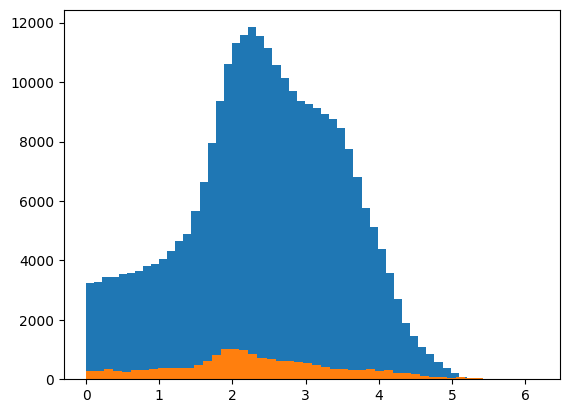

In [ ]:
from functools import partial
from torch.optim.lr_scheduler import StepLR
import torch.optim.lr_scheduler as lr_scheduler
import matplotlib.pyplot as plt
import torch

# model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)
model = prepare_model(EsmForMaskedLM.from_pretrained(model_checkpoint), rank=8, num_layers=model_size[0], dropout_rate=0.05).to(device)
#prepare_model(EsmForMaskedLM.from_pretrained(model_checkpoint), rank=8, num_layers=model_size[0], dropout_rate=0.05).to(device)

# load state dict
# model.load_state_dict(torch.load('/content/drive/MyDrive/p4.150M.JHP.8r.62r2.11202024.pth'))
# model.load_state_dict(torch.load("/content/drive/MyDrive/p4.150M.JHP.SFT.8r.46r2.05122025.pth"))

ref_model = freeze_model(EsmForMaskedLM.from_pretrained(model_checkpoint)).to(device)

total_params = lambda model: sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Total number of trainable parameters in policy: {total_params(model)}")
print(f"Total number of trainable parameters in ref_model: {total_params(ref_model)}")

# hyperparameters
# previous best, dr = 0.05, wd = 5e-1
lr=5e-4
batch_size = 64
epochs = 1
beta = 1e0 # reward weight
max_length = 50
reg_weight = 5e-1 # mlm weight
gradient_accumulation_steps = 1
preference_weight = 0.0 # label smoothing parmaeter
print_interval = 10

dataset = TMLibrary(file_path="/content/tm_library_train_jhp.csv", tokenizer=tokenizer, max_length=max_length, split='train', frac=0.25)
train_dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True, collate_fn=partial(collate_fn, device=device))

val_dataset = TMLibrary(file_path="/content/tm_library_val_jhp.csv", tokenizer=tokenizer, max_length=max_length, split='val')
val_dataloader = itertools.cycle(torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=True, collate_fn=partial(collate_fn, device=device)))

mnn = None #MonotonicPiecewiseLinearTransform(10, dataset.min, dataset.max, dataset.min, dataset.max*10).to(device)
train_ref = False
if(mnn):
  parameter_list = list(model.parameters()) + list(mnn.parameters())
else:
  parameter_list = list(model.parameters())
if(train_ref):
  parameter_list += list(ref_model.parameters())
optimizer = torch.optim.AdamW(filter(lambda p: p.requires_grad, parameter_list), lr=lr, weight_decay=1e-3)

#torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=gamma)
# scheduler = lr_scheduler.CosineAnnealingLR(optimizer, T_max=len(train_dataloader)*epochs, eta_min=1e-6)
# gamma = 1.0 #(final_lr / lr) ** (1 / decay_period)
# print(f"Decaying lr with rate: {gamma}")

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min',
                                                 factor=0.90, patience=10,
                                                 threshold=1e-2, verbose=True, min_lr = 1e-5)

num_training_steps = epochs * len(train_dataloader)
num_warmup_steps = int(0.1 * num_training_steps)  # 10% warmup
num_hold_steps = int(0.0 * num_training_steps)  # 20% hold
min_lr = 1e-5  # Minimum learning rate you want to set

# scheduler = CosineAnnealingWithMinLRScheduler(optimizer, num_warmup_steps, num_hold_steps, num_training_steps, init_lr=lr, min_lr=min_lr)

In [ ]:
print(model)

EsmForMaskedLM(
  (esm): EsmModel(
    (embeddings): EsmEmbeddings(
      (word_embeddings): Embedding(33, 640, padding_idx=1)
      (dropout): Dropout(p=0.05, inplace=False)
      (position_embeddings): Embedding(1026, 640, padding_idx=1)
    )
    (encoder): EsmEncoder(
      (layer): ModuleList(
        (0-29): 30 x EsmLayer(
          (attention): EsmAttention(
            (self): EsmSelfAttention(
              (query): LoRALayer(
                (original_layer): Linear(in_features=640, out_features=640, bias=True)
              )
              (key): LoRALayer(
                (original_layer): Linear(in_features=640, out_features=640, bias=True)
              )
              (value): LoRALayer(
                (original_layer): Linear(in_features=640, out_features=640, bias=True)
              )
              (dropout): Dropout(p=0.05, inplace=False)
              (rotary_embeddings): RotaryEmbedding()
            )
            (output): EsmSelfOutput(
              (dense): Lo

In [ ]:
#0.418, 1627

wandb.login()
wandb.init(reinit=True)

train(model, ref_model, mnn, optimizer, scheduler, train_dataloader, val_dataloader, gradient_accumulation_steps=gradient_accumulation_steps, epochs=epochs, beta=beta, reg_weight=reg_weight, preference_weight=preference_weight, print_interval=print_interval)

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


disprefered_relative_logprob,█▂▃▃▄▃▂▂▂▁▃▂▂▂▂▂▂▂▂▁▁▁▂▂▂▂▂▁▂▂▂▂▁▁▂▂▁▂▁▂
prefered_relative_logprob,█▇▂▃▂▆▄▅▄▄▄▅▄▄▅▄▄▄▄▃▄▃▃▂▄▃▃▃▄▃▃▃▃▂▅▁▂▄▃▂
ref_mlm_loss,▄▅█▆▄▃▃▃▃▃▃▂▂▃▂▂▂▂▂▂▂▂▃▂▂▂▂▁▁▂▂▂▁▁▁▂▁▁▁▁
ref_val_mlm_loss,▂█▇▅▆▅▄▅▅▄▆▅▄▃▄▃▂▄▂▅▁▂▂▅▃▂▁▁▂▂▁▃▃▁▂▁▃▃▅▁
reward_accuracy,▅▁▃▄▃▃▇▄▆▇▇▇▇▇▆▇▇▅██▆█▇▇▇▇▇▇▇▇█▇█▇▇▇█▇▇█
reward_margin,▁▁▁▄▄▄▅▆▆▇▆▇▇▆▇█▆▇▇▇▇█▆▇▇▇▇▇▇▇▇▇▇▇▆▇█▇▇▇
train_loss,▅█▄▄▄▃▃▃▂▃▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_disprefered_relative_logprob,█▆▄▅▄▄▃▄▂▂▃▃▂▃▃▃▃▂▂▂▂▂▂▂▂▃▂▃▂▂▂▂▂▂▃▂▁▂▂▁
val_loss,█▄▆▂▆▃▂▃▄▂▂▃▂▃▁▄▄▃▃▁▃▂▄▃▂▃▂▂▂▂▃▃▂▃▂▂▃▂▃▁
val_prefered_relative_logprob,▇███▇█▆▆▇▇▇▇▅▆▅▅▃▃▄▄▁▂▃▂▂▃▂▂▂▄▁▁▂▁▃▂▁▂▂▂
val_reward_accuracy,▅▁▅▃▄▄▅▅▃▇▁▄▃▃▅▃▅▃▄▃▃▅▆▂▃▅▄▇▃▅▃▁▆▅▅▆▅▄▇█


Epoch 1/1:   0%|          | 0/4290 [00:00<?, ?it/s]


OutOfMemoryError: CUDA out of memory. Tried to allocate 26.00 MiB. GPU 0 has a total capacity of 39.56 GiB of which 24.88 MiB is free. Process 15047 has 39.52 GiB memory in use. Of the allocated memory 37.79 GiB is allocated by PyTorch, and 1.23 GiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [ ]:
torch.save(model.state_dict(), "/content/drive/MyDrive/p4.150M.JHP.40out100.8r.62r2.05032025.pth") # 27%, 43019 steps, 1e-2 to 1e-7 lr, decay period 50000, batch size = 64*8

### Train SAE

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from transformers import AutoTokenizer
from torch.utils.data import DataLoader, Dataset
from tqdm import tqdm
import numpy as np

# 1. Define the Sparse Autoencoder
class SparseAutoencoder(nn.Module):
    def __init__(self, input_dim, latent_dim, sparsity_weight=1e-3, device='cuda' if torch.cuda.is_available() else 'cpu'):
        super().__init__()
        self.encoder = nn.Linear(input_dim, latent_dim)
        self.decoder = nn.Linear(latent_dim, input_dim)
        self.activation = nn.ReLU()
        self.sparsity_weight = sparsity_weight
        self.device = device
        self.to(device)

    def forward(self, x):
        # Ensure input is on the correct device
        x = x.to(self.device)

        # Encode
        latent = self.encoder(x)
        latent_activated = self.activation(latent)

        # Decode
        reconstruction = self.decoder(latent_activated)

        return reconstruction, latent_activated

    def l1_loss(self, latent_activations):
        return self.sparsity_weight * torch.mean(torch.abs(latent_activations))

# 2. Create a hook to extract activations from a specific layer
def get_activation_extractor(model, target_layer_name, device='cuda' if torch.cuda.is_available() else 'cpu'):
    activations = {}
    def hook_fn(module, input, output):
        if isinstance(output, tuple):
            # For attention layers that return (attention_output, attention_weights)
            # Usually we want the first element
            activations['value'] = output[0].detach().to(device)
        else:
            # For layers that return a single tensor
            activations['value'] = output.detach().to(device)

    # Attach hook to the target layer
    for name, module in model.named_modules():
        if name == target_layer_name:
            module.register_forward_hook(hook_fn)

    return activations

# 3. Function to collect activations from a dataset
def collect_activations(model, dataset_loader, activation_extractor, max_samples=10000, device='cuda' if torch.cuda.is_available() else 'cpu'):
    activations_list = []
    sample_count = 0

    model.eval()
    with torch.no_grad():
        for batch in tqdm(dataset_loader):
            # Move batch to device
            batch = {k: v.to(device) for k, v in batch.items()}

            # Forward pass through the model to trigger hooks
            model(**batch)
            # Get the activations (already on device from the hook)
            batch_activations = activation_extractor['value']


            # Reshape to (batch_size * seq_len, hidden_dim)
            batch_size, seq_len, hidden_dim = batch_activations.shape
            reshaped_activations = batch_activations.view(-1, hidden_dim)

            activations_list.append(reshaped_activations)

            sample_count += reshaped_activations.shape[0]
            if sample_count >= max_samples:
                break

    # Concatenate all activations (all on device already)
    all_activations = torch.cat(activations_list, dim=0)

    # Subsample if we have too many
    if all_activations.shape[0] > max_samples:
        indices = torch.randperm(all_activations.shape[0], device=device)[:max_samples]
        all_activations = all_activations[indices]

    return all_activations

from torch.optim.lr_scheduler import LambdaLR
import math

def get_cosine_schedule_with_warmup(optimizer, num_warmup_steps, num_training_steps, num_cycles=0.5, last_epoch=-1):
    """
    Create a schedule with a learning rate that decreases following the
    values of the cosine function between 0 and pi * num_cycles after a warmup period.
    """
    def lr_lambda(current_step):
        if current_step < num_warmup_steps:
            return float(current_step) / float(max(1, num_warmup_steps))
        progress = float(current_step - num_warmup_steps) / float(max(1, num_training_steps - num_warmup_steps))
        return max(0.0, 0.5 * (1.0 + math.cos(math.pi * num_cycles * 2.0 * progress)))

    return LambdaLR(optimizer, lr_lambda, last_epoch)

# 4. Function to train the SAE
def train_sae(sae, activations, batch_size=256, num_epochs=50, lr=5e-4, device='cuda' if torch.cuda.is_available() else 'cpu'):
    optimizer = optim.Adam(sae.parameters(), lr=lr)
    mse_loss = nn.MSELoss()
    scheduler = get_cosine_schedule_with_warmup(optimizer, num_warmup_steps=100, num_training_steps=num_epochs*len(activations)//batch_size)
    # Ensure activations are on the correct device
    activations = activations.to(device)

    dataset = torch.utils.data.TensorDataset(activations)
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

    for epoch in range(num_epochs):
        total_loss = 0
        for batch in dataloader:
            optimizer.zero_grad()

            # Get batch of activations (already on device)
            act_batch = batch[0]

            # Forward pass
            reconstructions, latents = sae(act_batch)

            # Calculate losses
            reconstruction_loss = mse_loss(reconstructions, act_batch)
            sparsity_loss = sae.l1_loss(latents)
            loss = reconstruction_loss + sparsity_loss

            # Backward pass
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            scheduler.step()

        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss/len(dataloader):.6f}")

    return sae

# 5. Main function to extract and analyze features
def analyze_with_sae(model, tokenizer, dataset, target_layer, latent_dim=256, num_epochs=50, lr=5e-4, device='cuda' if torch.cuda.is_available() else 'cpu'):
    # Move model to device
    model = model.to(device)

    # 5.1 Set up activation extraction
    activation_extractor = get_activation_extractor(model, target_layer, device)

    # 5.2 Create DataLoader
    data_loader = DataLoader(dataset, batch_size=8, shuffle=True)

    # 5.3 Collect activations
    activations = collect_activations(model, data_loader, activation_extractor, device=device)

    # 5.4 Create and train SAE
    input_dim = activations.shape[1]  # Hidden dimension of the layer
    sae = SparseAutoencoder(input_dim, latent_dim, device=device)
    trained_sae = train_sae(sae, activations, device=device, num_epochs=num_epochs, lr=lr)

    # 5.5 Analyze feature patterns
    # You can now use trained_sae to analyze patterns in new inputs

    return trained_sae, activations



In [ ]:
# 6. Protein dataset class
class ProteinDataset(Dataset):
    def __init__(self, sequences, tokenizer, max_length=1024):
        self.tokenizer = tokenizer
        self.sequences = sequences
        self.max_length = max_length

    def __len__(self):
        return len(self.sequences)

    def __getitem__(self, idx):
        seq = self.sequences[idx]
        encoding = self.tokenizer(seq,
                                return_tensors="pt",
                                padding="max_length",
                                max_length=self.max_length,
                                truncation=True)

        # Remove batch dimension added by tokenizer
        return {k: v.squeeze(0) for k, v in encoding.items()}

In [ ]:
# Analyze which features activate for specific protein motifs
# 7. Analyze which features activate for specific protein motifs
def analyze_feature_activations(sae, model, tokenizer, protein_sequence, target_layer, device='cuda' if torch.cuda.is_available() else 'cpu'):
    # Tokenize the sequence
    inputs = tokenizer(protein_sequence, return_tensors="pt")
    inputs = {k: v.to(device) for k, v in inputs.items()}

    # Get model activations
    activation_extractor = get_activation_extractor(model, target_layer, device)
    model.eval()
    with torch.no_grad():
        model(**inputs)

    # Get activations and reshape
    activations = activation_extractor['value']
    reshaped_activations = activations.view(-1, activations.shape[-1])

    # Get SAE feature activations
    _, feature_activations = sae(reshaped_activations)

    # Reshape back to (seq_len, num_features)
    feature_map = feature_activations.reshape(activations.shape[1], -1)

    return feature_map

In [ ]:
tm_library_df_train = pd.read_csv("/content/tm_library_train_jhp.csv")
tm_library_df_val = pd.read_csv("/content/tm_library_val_jhp.csv")

train_sequences = tm_library_df_train['aa_seq'].to_list()
train_scores = tm_library_df_train['avg_induction_score'].to_list()

val_sequences = tm_library_df_val['aa_seq'].to_list()
val_scores = tm_library_df_val['avg_induction_score'].to_list()

test_sequences = tm_library_df_val['aa_seq'].to_list()
test_scores = tm_library_df_val['avg_induction_score'].to_list()

In [ ]:
# 8. Example usage
# Example:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

# Prepare dataset
protein_dataset = ProteinDataset(train_sequences, tokenizer)

# Choose a layer to analyze
target_layer = "esm.encoder.layer.29" #

# Train SAE
sae, activations = analyze_with_sae(model, tokenizer, protein_dataset, target_layer, latent_dim=20000, num_epochs=500, lr=5e-4, device=device)


Using device: cuda


  0%|          | 1/565 [00:00<05:58,  1.57it/s]


Epoch 1/500, Loss: 609.419123
Epoch 2/500, Loss: 39.386998
Epoch 3/500, Loss: 20.236346
Epoch 4/500, Loss: 13.615061
Epoch 5/500, Loss: 11.523835
Epoch 6/500, Loss: 8.464025
Epoch 7/500, Loss: 7.315936
Epoch 8/500, Loss: 6.392849
Epoch 9/500, Loss: 5.602581
Epoch 10/500, Loss: 5.143388
Epoch 11/500, Loss: 4.648984
Epoch 12/500, Loss: 4.273923
Epoch 13/500, Loss: 4.079562
Epoch 14/500, Loss: 5.215974
Epoch 15/500, Loss: 3.826777
Epoch 16/500, Loss: 3.456259
Epoch 17/500, Loss: 4.871542
Epoch 18/500, Loss: 4.077141
Epoch 19/500, Loss: 3.067793
Epoch 20/500, Loss: 3.189441
Epoch 21/500, Loss: 3.286578
Epoch 22/500, Loss: 2.666002
Epoch 23/500, Loss: 2.452494
Epoch 24/500, Loss: 2.666553
Epoch 25/500, Loss: 12.028185
Epoch 26/500, Loss: 3.198564
Epoch 27/500, Loss: 3.511330
Epoch 28/500, Loss: 2.424121
Epoch 29/500, Loss: 2.252005
Epoch 30/500, Loss: 6.910389
Epoch 31/500, Loss: 5.842794
Epoch 32/500, Loss: 2.491735
Epoch 33/500, Loss: 2.168903
Epoch 34/500, Loss: 2.188012
Epoch 35/500, Lo

In [ ]:
# save sae model weights
torch.save(sae.state_dict(), '/content/drive/MyDrive/sae_SMPO_noMLM_05132025.pth')

In [ ]:
# load state_dict
sae = SparseAutoencoder(640, 20000, device=device)
sae.load_state_dict(torch.load('/content/drive/MyDrive/sae_SFT_05132025.pth'))

<All keys matched successfully>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from Bio import SeqIO
import pandas as pd

def visualize_feature_map(feature_map, sequence=None, title="Feature Map Visualization", device='cuda' if torch.cuda.is_available() else 'cpu'):
    # Convert to numpy for visualization if on GPU
    if torch.is_tensor(feature_map):
        feature_map = feature_map.detach().cpu().numpy()

    # 1. Heatmap visualization
    plt.figure()
    ax = sns.heatmap(feature_map, cmap="viridis")
    plt.title(f"{title} - Heatmap")
    plt.xlabel("Feature Index")
    plt.ylabel("Sequence Position")
    plt.tight_layout()
    # plt.savefig("feature_map_heatmap.png", dpi=300)
    plt.show()

    # 2. Top features per position
    if sequence:
        seq_len = min(len(sequence), feature_map.shape[0])
        top_n_features = 3

        # Find top features for each position
        top_features_idx = np.argsort(-feature_map[:seq_len], axis=1)[:, :top_n_features]
        top_features_val = np.take_along_axis(feature_map[:seq_len], top_features_idx, axis=1)

        # Create a dataframe for visualization
        position_data = []
        for pos in range(seq_len):
            amino_acid = sequence[pos]
            for i in range(top_n_features):
                feature_idx = top_features_idx[pos, i]
                activation = top_features_val[pos, i]
                if activation > 0.1:  # Only show significant activations
                    position_data.append({
                        'Position': pos + 1,
                        'Amino Acid': amino_acid,
                        'Feature': f'Feature {feature_idx}',
                        'Activation': activation
                    })

        if position_data:
            df = pd.DataFrame(position_data)
            plt.figure()
            sns.scatterplot(data=df, x='Position', y='Activation', hue='Feature',
                            size='Activation', sizes=(20, 200), alpha=0.7)

            # Annotate with amino acids for top activations
            for i, row in df.iterrows():
                if row['Activation'] > 0.5:  # Only annotate strong activations
                    plt.annotate(row['Amino Acid'],
                                (row['Position'], row['Activation']),
                                xytext=(0, 5),
                                textcoords='offset points',
                                ha='center')

            plt.title(f"{title} - Top Features by Position")
            plt.xlabel("Sequence Position")
            plt.ylabel("Feature Activation")
            plt.tight_layout()
            # plt.savefig("top_features_by_position.png", dpi=300)
            plt.show()

    # 3. Feature activation distribution
    plt.figure()
    # Calculate sparsity (percentage of neurons that are active)
    sparsity = (feature_map > 0.1).mean(axis=0) * 100
    plt.bar(range(len(sparsity)), sparsity)
    plt.title(f"{title} - Feature Activation Percentage")
    plt.xlabel("Feature Index")
    plt.ylabel("% of Positions Where Feature is Active")
    plt.tight_layout()
    # plt.savefig("feature_activation_distribution.png", dpi=300)
    plt.show()

# Visualizing specific features across the sequence
def visualize_specific_feature(feature_idx, feature_map, sequence, title=None, device='cuda' if torch.cuda.is_available() else 'cpu'):
    if torch.is_tensor(feature_map):
        feature_map = feature_map.detach().cpu().numpy()

    # Extract the feature activations
    feature_activations = feature_map[:, feature_idx]

    plt.figure()
    plt.bar(range(len(feature_activations)), feature_activations)

    # Add amino acid labels on x-axis
    if sequence:
        seq_len = min(len(sequence), len(feature_activations))
        plt.xticks(range(0, seq_len, 5),
                   [sequence[i:i+5] for i in range(0, seq_len, 5)],
                   rotation=45)

    # Highlight top activations
    threshold = np.percentile(feature_activations, 95)
    top_positions = np.where(feature_activations > threshold)[0]

    # Annotate top activations with amino acids
    for pos in top_positions:
        if pos < len(sequence):
            plt.annotate(sequence[pos],
                        (pos, feature_activations[pos]),
                        xytext=(0, 10),
                        textcoords='offset points',
                        ha='center',
                        fontweight='bold')

    plt.title(title or f"Feature {feature_idx} Activation Pattern")
    plt.xlabel("Sequence Position")
    plt.ylabel(f"Feature {feature_idx} Activation")
    plt.tight_layout()
    # plt.savefig(f"feature_{feature_idx}_pattern.png", dpi=300)
    plt.show()

# Creating a motif visualization
def visualize_feature_motifs(sae, top_k_features=5, device='cuda' if torch.cuda.is_available() else 'cpu'):
    # Get the decoder weights
    decoder_weights = sae.decoder.weight.detach().cpu().numpy()

    # Compute feature importance (L2 norm of each feature's decoder weights)
    feature_importance = np.linalg.norm(decoder_weights, axis=0)

    # Get top features
    top_features = np.argsort(-feature_importance)[:top_k_features]

    # Visualize each top feature's decoder weights
    plt.figure()
    for i, feature_idx in enumerate(top_features):
        plt.subplot(top_k_features, 1, i+1)
        weights = decoder_weights[:, feature_idx]
        plt.bar(range(len(weights)), weights)
        plt.title(f"Feature {feature_idx} Decoder Weights")
        plt.xlabel("Dimension in Original Space")
        plt.ylabel("Weight")

    plt.tight_layout()
    # plt.savefig("top_feature_motifs.png", dpi=300)
    plt.show()

# Calculate feature similarity
def visualize_feature_similarity(feature_map, device='cuda' if torch.cuda.is_available() else 'cpu'):
    if torch.is_tensor(feature_map):
        feature_map = feature_map.detach().cpu().numpy()

    # Calculate correlation matrix between features
    n_features = feature_map.shape[1]
    correlation_matrix = np.corrcoef(feature_map.T)

    # Visualize correlation matrix
    plt.figure()
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    sns.heatmap(correlation_matrix, mask=mask, cmap="coolwarm", vmin=-1, vmax=1,
                center=0, square=True, linewidths=.5, annot=False)
    plt.title("Feature Correlation Matrix")
    plt.tight_layout()
    plt.show()

Extracting features for all sequences...


100%|██████████| 279/279 [00:21<00:00, 12.78it/s]


Computing correlations...


<ipython-input-319-fd5e78167caa>:62: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, p_val = spearmanr(feature_matrix[:, i], scores_array)


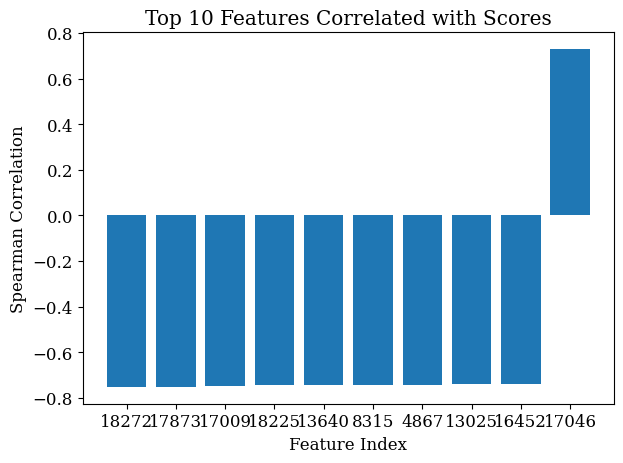

<Figure size 640x480 with 0 Axes>

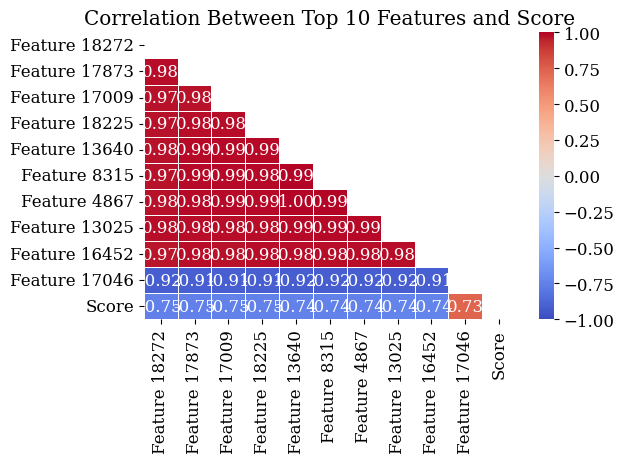

Top correlated features:
Feature 18272: correlation = -0.752, p-value = 4.532e-52
Feature 17873: correlation = -0.751, p-value = 6.447e-52
Feature 17009: correlation = -0.747, p-value = 4.469e-51
Feature 18225: correlation = -0.745, p-value = 1.258e-50
Feature 13640: correlation = -0.744, p-value = 2.138e-50
Feature 8315: correlation = -0.743, p-value = 2.731e-50
Feature 4867: correlation = -0.743, p-value = 3.315e-50
Feature 13025: correlation = -0.740, p-value = 1.325e-49
Feature 16452: correlation = -0.738, p-value = 3.492e-49
Feature 17046: correlation = 0.729, p-value = 1.859e-47
Feature activation in top scoring sequences:
Max activation: 35.042
Max activation: 30.188
Max activation: 24.943
Max activation: 31.219
Max activation: 28.724
Feature activation in bottom scoring sequences:
Max activation: 58.463
Max activation: 84.899
Max activation: 67.935
Max activation: 74.555
Max activation: 97.265


In [ ]:
import numpy as np
import torch
from scipy.stats import spearmanr, pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

def compute_top_correlated_features(sae, model, tokenizer, sequences, scores, target_layer,
                                   k=10, correlation_type='pearson',
                                   device='cuda' if torch.cuda.is_available() else 'cpu'):
    """
    Compute the top-k features most correlated with sequence scores.

    Args:
        sae: Trained Sparse Autoencoder model
        model: ESM protein language model
        tokenizer: ESM tokenizer
        sequences: List of protein sequences
        scores: List of corresponding scores for each sequence
        target_layer: Layer in ESM model to extract activations from
        k: Number of top correlated features to return
        correlation_type: 'pearson' or 'spearman'
        device: Computing device

    Returns:
        Dictionary with top-k features, their correlation values, and p-values
    """
    # Ensure inputs are valid
    assert len(sequences) == len(scores), "Sequences and scores must have the same length"
    assert correlation_type in ['pearson', 'spearman'], "Correlation type must be 'pearson' or 'spearman'"

    # Collect feature activations for all sequences
    print("Extracting features for all sequences...")
    all_feature_activations = []

    for sequence in tqdm(sequences):
        # Use the existing function to get feature map
        feature_map = analyze_feature_activations(sae, model, tokenizer, sequence, target_layer, device)

        # Pool features across sequence (max pooling)
        if torch.is_tensor(feature_map):
            pooled_features = torch.max(feature_map, dim=0)[0].cpu().detach().numpy()
        else:
            pooled_features = np.max(feature_map, axis=0)

        all_feature_activations.append(pooled_features)

    # Convert to numpy array for correlation analysis
    feature_matrix = np.vstack(all_feature_activations)
    scores_array = np.array(scores)

    # Compute correlation between each feature and the scores
    n_features = feature_matrix.shape[1]
    correlations = np.zeros(n_features)
    p_values = np.zeros(n_features)

    print("Computing correlations...")
    for i in range(n_features):
        if correlation_type == 'pearson':
            corr, p_val = pearsonr(feature_matrix[:, i], scores_array)
        else:  # spearman
            corr, p_val = spearmanr(feature_matrix[:, i], scores_array)

        correlations[i] = corr
        p_values[i] = p_val

    # Get top-k features by absolute correlation
    abs_correlations = np.abs(correlations)
    top_indices = np.argsort(-abs_correlations)[:k]

    # Create result dictionary
    results = {
        'feature_indices': top_indices,
        'correlation_values': correlations[top_indices],
        'p_values': p_values[top_indices],
        'absolute_correlations': abs_correlations[top_indices]
    }

    # Visualize results
    plt.figure()
    plt.bar(range(k), correlations[top_indices])
    plt.xlabel('Feature Index')
    plt.ylabel(f'{correlation_type.capitalize()} Correlation')
    plt.title(f'Top {k} Features Correlated with Scores')
    plt.xticks(range(k), top_indices)

    # Add correlation values as text
    # for i in range(k):
    #     plt.text(i, correlations[top_indices[i]],
    #             f'{correlations[top_indices[i]]:.3f}\np={p_values[top_indices[i]]:.3e}',
    #             ha='center', va='bottom' if correlations[top_indices[i]] > 0 else 'top')

    plt.tight_layout()
    # plt.savefig("top_correlated_features.png", dpi=300)
    plt.show()

    # Additional visualization: correlation heatmap for top features
    plt.figure()
    top_features_matrix = feature_matrix[:, top_indices]
    correlation_data = np.column_stack((top_features_matrix, scores_array.reshape(-1, 1)))

    # Fix the heatmap visualization part
    plt.figure()
    top_features_matrix = feature_matrix[:, top_indices]

    # Create a new correlation matrix manually to match the first calculation
    heatmap_corr_matrix = np.zeros((k+1, k+1))
    # Fill in feature-score correlations (last row and last column)
    for i in range(k):
        heatmap_corr_matrix[i, k] = correlations[top_indices[i]]  # Last column
        heatmap_corr_matrix[k, i] = correlations[top_indices[i]]  # Last row

    # Fill in feature-feature correlations using pearsonr or spearmanr
    for i in range(k):
        heatmap_corr_matrix[i, i] = 1.0  # Diagonal is always 1
        for j in range(i+1, k):
            if correlation_type == 'pearson':
                corr, _ = pearsonr(top_features_matrix[:, i], top_features_matrix[:, j])
            else:  # spearman
                corr, _ = spearmanr(top_features_matrix[:, i], top_features_matrix[:, j])
            heatmap_corr_matrix[i, j] = corr
            heatmap_corr_matrix[j, i] = corr  # Matrix is symmetric

    # Set score-score correlation to 1
    heatmap_corr_matrix[k, k] = 1.0

    # Create mask for upper triangle
    mask = np.zeros_like(heatmap_corr_matrix)
    mask[np.triu_indices_from(mask)] = True

    feature_labels = [f'Feature {idx}' for idx in top_indices]
    feature_labels.append('Score')

    sns.heatmap(heatmap_corr_matrix, mask=mask, cmap='coolwarm', vmin=-1, vmax=1,
                center=0, annot=True, fmt='.2f', linewidths=0.5,
                xticklabels=feature_labels, yticklabels=feature_labels)
    plt.title(f'Correlation Between Top {k} Features and Score')
    plt.tight_layout()
    plt.savefig("/content/drive/MyDrive/SMPO/Figures/Appendices/feature_correlations_SMPO_noMLM.png", dpi=300)
    plt.show()

    return results

# Example usage:

# Assuming you have:
# - trained_sae: your trained Sparse Autoencoder
# - model: your ESM model (already loaded)
# - tokenizer: ESM tokenizer
# - sequences: list of protein sequences
# - scores: list of corresponding performance scores
# - target_layer: target layer name (e.g., "esm.encoder.layer.15")

# Set parameters
target_layer =  "esm.encoder.layer.29"
k = 10
correlation_type = 'spearman'  # or 'pearson'

# Get top correlated features
top_features = compute_top_correlated_features(
    sae, model, tokenizer, test_sequences, test_scores,
    target_layer, k, correlation_type
)

# Print results
print("Top correlated features:")
for i, feat_idx in enumerate(top_features['feature_indices']):
    corr = top_features['correlation_values'][i]
    p_val = top_features['p_values'][i]
    print(f"Feature {feat_idx}: correlation = {corr:.3f}, p-value = {p_val:.3e}")

# Analyze the top feature in more detail
top_feature_idx = top_features['feature_indices'][0]

# Now you can visualize patterns for this feature across different sequences
# For example, sort sequences by score and see how this feature activates
sorted_indices = np.argsort(test_scores)
high_scoring_sequences = [test_sequences[i] for i in sorted_indices[-5:]]
low_scoring_sequences = [test_sequences[i] for i in sorted_indices[:5]]

# Compare feature activation between high and low scoring sequences
print("Feature activation in top scoring sequences:")
for seq in high_scoring_sequences:
    feature_map = analyze_feature_activations(sae, model, tokenizer, seq, target_layer, device)
    max_activation = torch.max(feature_map[:, top_feature_idx]).item()
    print(f"Max activation: {max_activation:.3f}")

print("Feature activation in bottom scoring sequences:")
for seq in low_scoring_sequences:
    feature_map = analyze_feature_activations(sae, model, tokenizer, seq, target_layer, device)
    max_activation = torch.max(feature_map[:, top_feature_idx]).item()
    print(f"Max activation: {max_activation:.3f}")


In [ ]:
import numpy as np
from scipy.interpolate import interp1d

import numpy as np
import torch
from scipy.stats import spearmanr, pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import time

def interpolate_sequence(seq, target_len=120):
    """
    seq: np.array of shape (N, 120)
    target_len: desired length after resampling
    Returns: np.array of shape (target_len, 120)
    """
    N, F = seq.shape
    x_old = np.linspace(0, 1, N)
    x_new = np.linspace(0, 1, target_len)

    # Use vectorized interpolation across all features at once
    interpolated = interp1d(x_old, seq, axis=0, kind='linear', fill_value="extrapolate")(x_new)
    return interpolated

def find_feature_triggers(feature_idx, target_layer, sae, model, tokenizer, sequences,
                          top_k=5, motif_length=1, device='cuda' if torch.cuda.is_available() else 'cpu'):
    """
    Find amino acid motifs that trigger a specific feature.

    Args:
        feature_idx: Index of the feature to analyze
        target_layer: Layer in ESM model to extract activations from
        sae: Trained Sparse Autoencoder model
        model: ESM protein language model
        tokenizer: ESM tokenizer
        sequences: List of protein sequences to analyze
        top_k: Number of top motifs to return
        motif_length: Length of continuous motifs to find (default=1 for single amino acids)
        device: Computing device

    Returns:
        Lists of top motifs and their activation values
    """
    all_motifs = []
    all_activations = []

    # Ensure motif_length is valid
    motif_length = max(1, int(motif_length))

    # Add logging info
    start_time = time.time()
    total_sequences = len(sequences)
    print(f"Processing {total_sequences} sequences for feature {feature_idx} with motif length {motif_length}...")

    # Use tqdm for progress tracking
    for i, sequence in enumerate(tqdm(sequences, desc=f"Feature {feature_idx}, Motif length {motif_length}")):
        # Get feature activations for this sequence
        feature_map = analyze_feature_activations(sae, model, tokenizer, sequence, target_layer, device)

        # Convert to numpy if needed
        if torch.is_tensor(feature_map):
            feature_activations = feature_map[:, feature_idx].cpu().detach().numpy()
        else:
            feature_activations = feature_map[:, feature_idx]

        # Get all possible motifs of the specified length
        seq_len = min(len(sequence), len(feature_activations))

        for j in range(seq_len - motif_length + 1):
            # Extract the motif
            motif = sequence[j:j+motif_length]

            # For motifs longer than 1, use the average activation across the motif positions
            if motif_length == 1:
                activation = feature_activations[j]
            else:
                # We could use different aggregation methods here:
                # - Mean: average activation across the motif
                # - Max: strongest activation within the motif
                # - Sum: total activation across the motif
                activation = np.mean(feature_activations[j:j+motif_length])

            all_motifs.append(motif)
            all_activations.append(activation)

        # Add intermediate logging every 20% of sequences
        if (i+1) % max(1, total_sequences // 5) == 0:
            elapsed = time.time() - start_time
            avg_time_per_seq = elapsed / (i+1)
            remaining = avg_time_per_seq * (total_sequences - (i+1))
            print(f"  Processed {i+1}/{total_sequences} sequences ({(i+1)/total_sequences*100:.1f}%)")
            print(f"  Elapsed: {elapsed:.1f}s, Estimated remaining: {remaining:.1f}s")
            print(f"  Current motif count: {len(all_motifs)}")

    elapsed = time.time() - start_time
    print(f"Finished processing {total_sequences} sequences in {elapsed:.1f}s")
    print(f"Total motifs found: {len(all_motifs)}")

    # Convert to numpy array for sorting
    activations = np.array(all_activations)

    # Find top activating motifs
    if len(activations) > 0:
        print("Finding top motifs...")
        top_indices = np.argsort(-activations)[:top_k]
        top_motifs = [all_motifs[i] for i in top_indices]
        top_activation_values = [activations[i] for i in top_indices]
        bottom_indices = np.argsort(activations)[:top_k]
        bottom_motifs = [all_motifs[i] for i in bottom_indices]
        bottom_activation_values = [activations[i] for i in bottom_indices]

        print(f"Top motifs for feature {feature_idx}, length {motif_length}:")
        for i, (motif, activation) in enumerate(zip(top_motifs, top_activation_values)):
            print(f"  {i+1}. {motif}: {activation:.4f}")

        print(f"Bottom motifs for feature {feature_idx}, length {motif_length}:")
        for i, (motif, activation) in enumerate(zip(bottom_motifs, bottom_activation_values)):
            print(f"  {i+1}. {motif}: {activation:.4f}")
    else:
        top_motifs = []
        top_activation_values = []
        print("No motifs found.")

    # Visualize the results
    if len(top_motifs) > 0:
        print("Creating visualization...")
        plt.figure()
        y_pos = range(len(top_motifs))
        plt.barh(y_pos, top_activation_values)
        plt.yticks(y_pos, top_motifs)
        plt.xlabel('Activation Strength')
        plt.title(f'Top {top_k} Motifs (Length {motif_length}) for Feature {feature_idx}')
        plt.tight_layout()
        # plt.savefig(f"feature_{feature_idx}_motifs_length_{motif_length}.png", dpi=300)
        plt.show()

    return top_motifs, top_activation_values

# Function to find consensus patterns across top motifs
def find_consensus_pattern(motifs):
    """
    Find the consensus pattern in a list of motifs of the same length.
    Returns a consensus string with most common amino acid at each position.

    Args:
        motifs: List of motifs of the same length

    Returns:
        Consensus pattern and position-specific frequency information
    """
    if not motifs or len(motifs) == 0:
        return "", {}

    motif_length = len(motifs[0])
    position_frequencies = []

    # Count amino acid frequencies at each position
    for pos in range(motif_length):
        aa_counts = {}
        for motif in motifs:
            if pos < len(motif):
                aa = motif[pos]
                aa_counts[aa] = aa_counts.get(aa, 0) + 1
        position_frequencies.append(aa_counts)

    # Find the most common amino acid at each position
    consensus = ""
    for pos_counts in position_frequencies:
        if pos_counts:
            most_common_aa = max(pos_counts.items(), key=lambda x: x[1])[0]
            consensus += most_common_aa
        else:
            consensus += "X"  # Use X for positions with no clear consensus

    return consensus, position_frequencies

# Enhanced function to analyze multiple motif lengths
def analyze_feature_motifs(feature_idx, target_layer, sae, model, tokenizer, sequences,
                         max_motif_length=5, top_k=10, device='cuda' if torch.cuda.is_available() else 'cpu'):
    """
    Analyze a feature across multiple motif lengths and find patterns.

    Args:
        feature_idx: Index of the feature to analyze
        target_layer: Layer in ESM model to extract activations from
        sae: Trained Sparse Autoencoder model
        model: ESM protein language model
        tokenizer: ESM tokenizer
        sequences: List of protein sequences to analyze
        max_motif_length: Maximum motif length to analyze
        top_k: Number of top motifs to return for each length
        device: Computing device

    Returns:
        Dictionary of results for each motif length
    """
    results = {}
    total_motif_lengths = max_motif_length

    print(f"Starting analysis of feature {feature_idx} across {total_motif_lengths} motif lengths")
    start_time = time.time()

    for motif_length in tqdm(range(max_motif_length, max_motif_length + 1), desc="Analyzing motif lengths"):
        motif_start_time = time.time()
        print(f"\nAnalyzing motifs of length {motif_length}/{max_motif_length}...")

        top_motifs, top_activations = find_feature_triggers(
            feature_idx, target_layer, sae, model, tokenizer, sequences,
            top_k, motif_length, device
        )

        # Skip if no motifs found
        if not top_motifs:
            print(f"No motifs found for length {motif_length}, skipping.")
            continue

        # Find consensus pattern for motifs
        print("Finding consensus pattern...")
        consensus, position_frequencies = find_consensus_pattern(top_motifs)

        # Visualize position-specific amino acid frequencies
        if motif_length > 1:
            print("Creating position frequency visualization...")
            fig, axes = plt.subplots(motif_length, 1, sharex=False)

            # Add overall title to the figure instead of individual subplot titles
            fig.suptitle('Amino Acid Frequencies by Position', fontsize=14)

            # Add common y-label
            fig.text(0.04, 0.5, 'Frequency (%)', va='center', rotation='vertical')

            aggregate_df = []  # List to store each position's DataFrame

            for pos in range(motif_length):
                ax = axes[pos] if motif_length > 1 else axes

                pos_counts = position_frequencies[pos]
                aa_list = sorted(pos_counts.keys())
                frequencies = [pos_counts[aa] / len(top_motifs) * 100 for aa in aa_list]

                # Build position-specific DataFrame
                df = pd.DataFrame({
                    'position': pos,         # Add position as a column
                    'aa': aa_list,
                    'frequency': frequencies
                })
                aggregate_df.append(df)

                ax.bar(range(len(aa_list)), frequencies)
                ax.set_xticks(range(len(aa_list)))
                ax.set_xticklabels(aa_list)

                # Only add position indicator on the right side
                ax.text(1.02, 0.5, f'Pos {pos+1}', transform=ax.transAxes,
                        verticalalignment='center')

                # Remove individual y-labels and titles
                ax.set_ylabel('')

                # Only show y-ticks for leftmost subplot
                if pos > 0:
                    ax.set_yticklabels([])
            final_df = pd.concat(aggregate_df, ignore_index=True)
            final_df.to_csv(f'/content/drive/MyDrive/SMPO/Figures/Appendices/{feature_idx}_pssm_SMPO_noMLM_.csv')
            # Adjust spacing between subplots to prevent overlap
            plt.tight_layout()
            plt.subplots_adjust(hspace=0.3, left=0.15, right=0.85)

            # plt.savefig(f"feature_{feature_idx}_position_frequencies_length_{motif_length}.png", dpi=300)
            plt.show()

        # Store results
        results[motif_length] = {
            'motifs': top_motifs,
            'activations': top_activations,
            'consensus': consensus,
            'position_frequencies': position_frequencies
        }

        motif_elapsed = time.time() - motif_start_time
        print(f"Consensus pattern for length {motif_length}: {consensus}")
        print(f"Completed motif length {motif_length} in {motif_elapsed:.1f}s")

    total_elapsed = time.time() - start_time
    print(f"\nAnalysis complete for feature {feature_idx}")
    print(f"Total time: {total_elapsed:.1f}s")

    # Summary of best motifs by activation strength
    if results:
        print("\nSummary of best motifs by length:")
        for length, result in sorted(results.items()):
            if result['motifs']:
                best_motif = result['motifs'][0]
                best_activation = result['activations'][0]
                print(f"Length {length}: {best_motif} (activation: {best_activation:.4f})")

        # Find best overall motif
        best_length = max(results.keys(), key=lambda k: max(results[k]['activations']))
        best_motif = results[best_length]['motifs'][0]
        best_activation = results[best_length]['activations'][0]

        print(f"\nBest overall motif: {best_motif} (length {best_length}, activation: {best_activation:.4f})")
        print(f"Consensus pattern: {results[best_length]['consensus']}")

    return results

# Function to scan sequences for motifs
def scan_sequences_for_motif(motif, sequences, feature_idx, target_layer, sae, model, tokenizer,
                            threshold=None, device='cuda' if torch.cuda.is_available() else 'cpu'):
    """
    Scan sequences for occurrences of a motif and report activation levels.

    Args:
        motif: Motif to scan for (exact string or consensus pattern with 'X' wildcards)
        sequences: List of protein sequences to scan
        feature_idx: Feature index to check activations for
        target_layer: Target layer for feature extraction
        sae: Trained SAE model
        model: ESM model
        tokenizer: ESM tokenizer
        threshold: Optional activation threshold (default: None = report all occurrences)
        device: Computing device

    Returns:
        Dictionary with occurrences and their activation levels
    """
    results = {}
    motif_length = len(motif)
    is_consensus = 'X' in motif

    print(f"Scanning {len(sequences)} sequences for motif: {motif}")

    for seq_idx, sequence in enumerate(tqdm(sequences, desc="Scanning sequences")):
        # Get feature activations
        feature_map = analyze_feature_activations(sae, model, tokenizer, sequence, target_layer, device)

        if torch.is_tensor(feature_map):
            feature_activations = feature_map[:, feature_idx].cpu().detach().numpy()
        else:
            feature_activations = feature_map[:, feature_idx]

        # Find motif occurrences
        occurrences = []

        for pos in range(len(sequence) - motif_length + 1):
            current_segment = sequence[pos:pos+motif_length]

            # Check for match (exact or consensus with wildcards)
            match = True
            if is_consensus:
                for i, aa in enumerate(motif):
                    if aa != 'X' and aa != current_segment[i]:
                        match = False
                        break
            else:
                match = (current_segment == motif)

            if match:
                # Calculate average activation for this occurrence
                activation = np.mean(feature_activations[pos:pos+motif_length])

                # Only include if above threshold (if specified)
                if threshold is None or activation >= threshold:
                    occurrences.append({
                        'position': pos,
                        'activation': activation,
                        'segment': current_segment
                    })

        # Sort occurrences by activation
        occurrences.sort(key=lambda x: x['activation'], reverse=True)

        # Store results if any occurrences found
        if occurrences:
            results[seq_idx] = occurrences

    # Summary statistics
    total_occurrences = sum(len(occs) for occs in results.values())
    num_sequences_with_motif = len(results)

    print(f"\nScan complete:")
    print(f"- Motif found in {num_sequences_with_motif}/{len(sequences)} sequences ({num_sequences_with_motif/len(sequences)*100:.1f}%)")
    print(f"- Total occurrences: {total_occurrences}")
    print(f"- Average occurrences per sequence (where present): {total_occurrences/max(1, num_sequences_with_motif):.2f}")

    if total_occurrences > 0:
        # Collect all activations for histogram
        all_activations = [occ['activation'] for seq_occs in results.values() for occ in seq_occs]

        plt.figure()
        plt.hist(all_activations, bins=30)
        plt.xlabel('Activation Level')
        plt.ylabel('Frequency')
        plt.title(f'Activation Distribution for Motif "{motif}" (Feature {feature_idx})')
        plt.axvline(np.mean(all_activations), color='r', linestyle='dashed', label=f'Mean: {np.mean(all_activations):.4f}')
        plt.legend()
        plt.tight_layout()
        # plt.savefig(f"feature_{feature_idx}_motif_{motif.replace('X', 'x')}_activation_histogram.png", dpi=300)
        plt.show()

    return results

In [ ]:
# Analyze specific features
import time
feature_idx = 18557
feature_idxs = [feature_idx] #, 2380, 2252
target_len = 100
num_features = 20000
base = np.zeros((target_len, num_features))

for idx, sequence in enumerate(test_sequences):
  start = time.time()
  feature_map = analyze_feature_activations(sae, model, tokenizer, sequence, target_layer, device=device)
  normalized = interpolate_sequence(feature_map.detach().cpu().numpy(), target_len=target_len)
  base += normalized
  # Basic visualization
  # visualize_feature_map(feature_map, sequence=sequences[0], title="Ubiquitin Feature Map")

  # Look at specific features of interest
  # visualize_specific_feature(feature_idx, feature_map, sequence)  # Feature 0
  # visualize_specific_feature(10, feature_map, sequences[0])  # Feature 10

  # Visualize feature motifs (what patterns each feature is looking for)
  # visualize_feature_motifs(sae, top_k_features=5)

  # Check for redundancy between features
  # visualize_feature_similarity(feature_map)

  # find_feature_triggers(feature_idx, target_layer, sae, model, tokenizer, protein_dataset, top_k=5)
  print(f"Iteration {idx} took {time.time() - start} seconds")
base = base / len(test_sequences)
base = base[:, feature_idxs].reshape(1,-1)



Iteration 0 took 0.09907007217407227 seconds
Iteration 1 took 0.09741950035095215 seconds
Iteration 2 took 0.09196233749389648 seconds
Iteration 3 took 0.09243917465209961 seconds
Iteration 4 took 0.08930253982543945 seconds
Iteration 5 took 0.08837509155273438 seconds
Iteration 6 took 0.09738945960998535 seconds
Iteration 7 took 0.09502482414245605 seconds
Iteration 8 took 0.08877897262573242 seconds
Iteration 9 took 0.0895240306854248 seconds
Iteration 10 took 0.08815979957580566 seconds
Iteration 11 took 0.08862066268920898 seconds
Iteration 12 took 0.09055352210998535 seconds
Iteration 13 took 0.09079813957214355 seconds
Iteration 14 took 0.09058952331542969 seconds
Iteration 15 took 0.09214019775390625 seconds
Iteration 16 took 0.09144139289855957 seconds
Iteration 17 took 0.08920073509216309 seconds
Iteration 18 took 0.09044456481933594 seconds
Iteration 19 took 0.09198403358459473 seconds
Iteration 20 took 0.08802628517150879 seconds
Iteration 21 took 0.0896298885345459 seconds


In [ ]:
# save as dataframe of values labeled by feature
# Assuming base is flat and holds 3 × 100 = 300 values
base = base.reshape(len(feature_idxs), 100)  # (3, 100)
df = pd.DataFrame(base.T, columns=[f"feature_{i}" for i in feature_idxs])  # (100, 3)
df.to_csv(f"/content/drive/MyDrive/SMPO/Figures/Appendices/SMPO_noMLM_feature_activations_{feature_idx}.csv", index=False)
df.head()

,feature_13282
0,60.317239
1,60.690293
2,61.063346
3,61.432277
4,61.608497


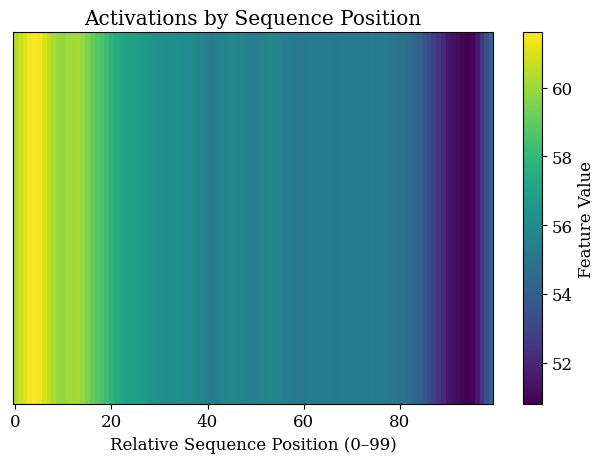

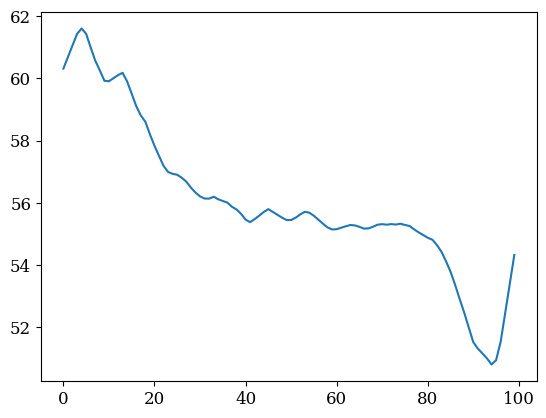

In [ ]:
# Plot as heatmap
plt.figure()
plt.imshow(base[:,:], aspect='auto', cmap='viridis')
plt.colorbar(label='Feature Value')
plt.xlabel('Relative Sequence Position (0–99)')
plt.yticks([])  # Hide y-axis ticks
plt.title(f'Activations by Sequence Position')
plt.tight_layout()
plt.show()

plt.figure()
plt.plot(range(100), base[:, :].T)
plt.show()

Starting analysis of feature 13282 across 5 motif lengths


Analyzing motif lengths:   0%|          | 0/1 [00:00<?, ?it/s]


Analyzing motifs of length 5/5...
Processing 279 sequences for feature 13282 with motif length 5...



Feature 13282, Motif length 5:  20%|██        | 56/279 [00:04<00:16, 13.84it/s]

  Processed 55/279 sequences (19.7%)
  Elapsed: 4.0s, Estimated remaining: 16.2s
  Current motif count: 944



Feature 13282, Motif length 5:  40%|████      | 112/279 [00:07<00:11, 14.36it/s]

  Processed 110/279 sequences (39.4%)
  Elapsed: 7.9s, Estimated remaining: 12.1s
  Current motif count: 1891



Feature 13282, Motif length 5:  59%|█████▉    | 166/279 [00:11<00:08, 13.45it/s]

  Processed 165/279 sequences (59.1%)
  Elapsed: 11.8s, Estimated remaining: 8.2s
  Current motif count: 3276



Feature 13282, Motif length 5:  80%|███████▉  | 222/279 [00:15<00:04, 13.46it/s]

  Processed 220/279 sequences (78.9%)
  Elapsed: 15.8s, Estimated remaining: 4.2s
  Current motif count: 4672



Feature 13282, Motif length 5:  99%|█████████▉| 276/279 [00:19<00:00, 13.80it/s]

  Processed 275/279 sequences (98.6%)
  Elapsed: 19.7s, Estimated remaining: 0.3s
  Current motif count: 5776



Feature 13282, Motif length 5: 100%|██████████| 279/279 [00:20<00:00, 13.92it/s]


Finished processing 279 sequences in 20.0s
Total motifs found: 5863
Finding top motifs...
Top motifs for feature 13282, length 5:
  1. LLSCL: 151.9341
  2. LTWMA: 151.2680
  3. RYLAD: 151.2617
  4. FRYLA: 151.0945
  5. CLTWM: 150.7247
  6. LSCLT: 150.7115
  7. ALLSC: 150.4424
  8. WMAIE: 149.8621
  9. SCLTW: 149.7786
  10. TWMAI: 149.6335
Bottom motifs for feature 13282, length 5:
  1. IIATA: 0.0000
  2. IIAAI: 0.0000
  3. GIIAA: 0.0000
  4. GGIIA: 0.0000
  5. IGGII: 0.0000
  6. IIGGI: 0.0000
  7. YKSRS: 0.0000
  8. GRRHC: 0.0000
  9. IGRRH: 0.0000
  10. IIGRR: 0.0000
Creating visualization...


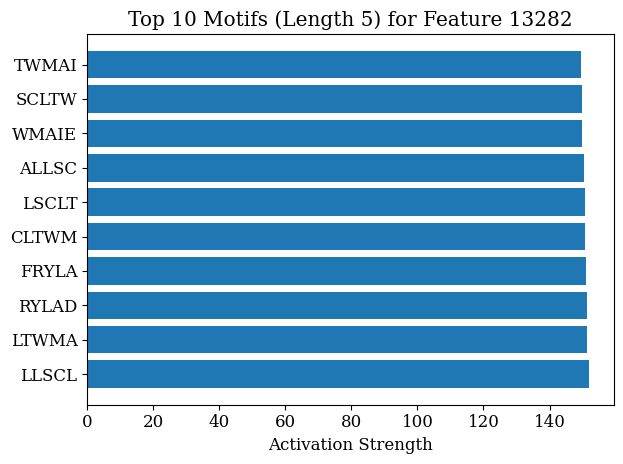

Finding consensus pattern...
Creating position frequency visualization...


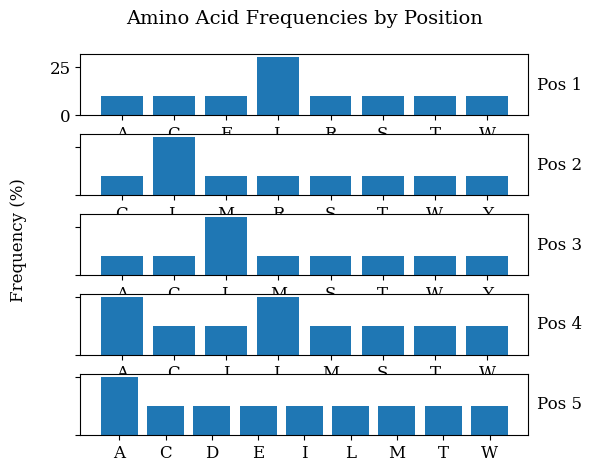

Analyzing motif lengths: 100%|██████████| 1/1 [00:20<00:00, 20.55s/it]

Consensus pattern for length 5: LLLAA
Completed motif length 5 in 20.6s

Analysis complete for feature 13282
Total time: 20.6s

Summary of best motifs by length:
Length 5: LLSCL (activation: 151.9341)

Best overall motif: LLSCL (length 5, activation: 151.9341)
Consensus pattern: LLLAA


{5: {'motifs': ['LLSCL',
   'LTWMA',
   'RYLAD',
   'FRYLA',
   'CLTWM',
   'LSCLT',
   'ALLSC',
   'WMAIE',
   'SCLTW',
   'TWMAI'],
  'activations': [np.float32(151.9341),
   np.float32(151.26797),
   np.float32(151.26175),
   np.float32(151.09453),
   np.float32(150.72466),
   np.float32(150.71147),
   np.float32(150.44244),
   np.float32(149.8621),
   np.float32(149.77864),
   np.float32(149.63354)],
  'consensus': 'LLLAA',
  'position_frequencies': [{'L': 3,
    'R': 1,
    'F': 1,
    'C': 1,
    'A': 1,
    'W': 1,
    'S': 1,
    'T': 1},
   {'L': 3, 'T': 1, 'Y': 1, 'R': 1, 'S': 1, 'M': 1, 'C': 1, 'W': 1},
   {'S': 1, 'W': 1, 'L': 3, 'Y': 1, 'T': 1, 'C': 1, 'A': 1, 'M': 1},
   {'C': 1, 'M': 1, 'A': 2, 'L': 2, 'W': 1, 'S': 1, 'I': 1, 'T': 1},
   {'L': 1, 'A': 2, 'D': 1, 'M': 1, 'T': 1, 'C': 1, 'E': 1, 'W': 1, 'I': 1}]}}

In [ ]:
feature_idx = feature_idx
analyze_feature_motifs(feature_idx, target_layer, sae, model, tokenizer, test_sequences, max_motif_length=5, top_k=10)

### Reset model

In [ ]:
import gc
import torch

try:
  del model
except:
  pass

try:
  del ref_model
except:
  pass

try:
  del dataset
except:
  pass

try:
  del train_dataloader
except:
  pass

try:
  del optimizer
except:
  pass

try:
  del scheduler
except:
  pass

torch.cuda.empty_cache()
gc.collect()


28782

In [ ]:
# reset
import torch
torch.cuda.empty_cache()
print(torch.cuda.memory_summary(device=device, abbreviated=True))

|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      | 301383 KiB |  25245 MiB |  46183 GiB |  46183 GiB |
|---------------------------------------------------------------------------|
| Active memory         | 301383 KiB |  25245 MiB |  46183 GiB |  46183 GiB |
|---------------------------------------------------------------------------|
| Requested memory      | 300800 KiB |  25091 MiB |  46014 GiB |  46014 GiB |
|---------------------------------------------------------------

### DeNovo Design

In [ ]:
top_k = 5
sorted_df = df.sort_values(by='avg_induction_score', ascending=False)
top_k_seqs = sorted_df['aa_seq'].tolist()[0:top_k]

In [ ]:
from collections import defaultdict
from tqdm import tqdm

df = pd.read_csv("/content/tm_library_annotated.csv")
seqs = df['aa_seq'].to_list()
sequence_lengths = [len(seq) for seq in seqs]
num_sequences = 5000
results_dict = defaultdict(list)

# parameters controlling rate of mutation
mean = -0.5  # Mean of the underlying normal distribution
sigma = 0.1  # Standard deviation of the underlying normal distribution
add_masks_distr_mean = 4 # Poisson mean

optimal_seqs = ['']

for i in tqdm(range(num_sequences)):


  seq = random.choice(top_k_seqs)#random.choice(seqs)
  replacement_ratio = sample_lognormal_between_0_and_1(mean, sigma)
  masked_seq = replace_with_mask(seq, replacement_ratio, add_masks_distr_mean=add_masks_distr_mean)
  generated_seq = generate(masked_seq, model, tokenizer, device)

  results_dict['original_sequence'].append(seq)
  results_dict['generated_sequence'].append(generated_seq)
  results_dict['original_logprobs'].append(get_sequence_probs(seq, model, tokenizer, max_length, device).cpu().item())
  results_dict['generated_logprobs'].append(get_sequence_probs(generated_seq, model, tokenizer, max_length, device).cpu().item())


 21%|██        | 1052/5000 [03:24<12:47,  5.14it/s]


KeyboardInterrupt: 

In [ ]:
results_df = pd.DataFrame(results_dict)
results_df.head(10)
improved_seqs = results_df[results_df['generated_logprobs'] > results_df['original_logprobs']].head(10)

best_seq_idx = results_df['generated_logprobs'].idxmax()
best_seq = results_df.loc[best_seq_idx]

best_overall = np.max(results_df[['original_logprobs']])
best_overall_series = results_df[(results_df['generated_logprobs'] == best_overall) | (results_df['original_logprobs'] == best_overall)]


best_overall_with_margin = best_overall - 0.0*np.abs(best_overall)
design_candidates = results_df[results_df['generated_logprobs'] >= best_overall_with_margin]

display(improved_seqs)
print("\n")
if(not design_candidates.empty):
  display(design_candidates)
else:
  print(f"No optimal generations. Best sequence {best_overall_series['original_sequence'].tolist()[0]} has logprob: {best_overall} and generated sequence {best_overall_series['generated_sequence'].tolist()[0]} with logprobs: {best_overall_series['generated_logprobs'].tolist()[0]}")
print("\n")
display(best_seq)

,original_sequence,generated_sequence,original_logprobs,generated_logprobs
43,GLIWVVGPVLAVVFIICIVIAILLYKRKRAESD,LLIWLVVLGLLAVVFIICIVVALLWYCIWRLRQSDD,-1.116401,-1.054749
74,GLIWVVGPVLAVVFIICIVIAILLYKRKRAESD,YWLIIVIVAVAAVAFIVLVVIGIILYKCKRCERRSE,-1.116401,-0.545060
105,GLIWVVGPVLAVVFIICIVIAILLYKRKRAESD,LPVIVLWVGPVLAIVLIICLVIFIIWILRKRCGED,-1.116401,-1.002209
178,GLIWVVGPVLAVVFIICIVIAILLYKRKRAESD,LILIVIVGVAVLVVVLIVVVIGIVLWYRYRARQVSE,-1.116401,-0.617959
195,IVGSATAGLVFVVAVVVIAIV,SPPRSPSASPSLVFVLAGVLIAIWVL,-1.948190,-1.869651
230,GLIWVVGPVLAVVFIICIVIAILLYKRKRAESD,PPLIWLVLIVLVVVFVILVVLAIVLYKRWCRRSRED,-1.116401,-0.809571
262,GLIWVVGPVLAVVFIICIVIAILLYKRKRAESD,LVWLWVIGVVLALVFILCIVIIILLYKICRRESVAD,-1.116401,-0.982417
334,GLIWVVGPVLAVVFIICIVIAILLYKRKRAESD,VPPPLVLWVVGIVLLIVFLLLIVIAVLLYWRWRAERDGSRD,-1.116401,-1.041851
377,GLIWVVGPVLAVVFIICIVIAILLYKRKRAESD,YLTVLIWLVGVLAAVLFIICIILAIWYIKRIRRRDDE,-1.116401,-0.913546
539,GLIWVVGPVLAVVFIICIVIAILLYKRKRAESD,MSLLLWVIGVVLAVVFIICIVVAFLYWIIKRRESDAR,-1.116401,-0.877841




No optimal generations. Best sequence VVYPCTALLLLCLFATIITYI has logprob: -0.2652149498462677 and generated sequence IVIVPLLLLLIICLLLLLMTLIVI with logprobs: -3.3433046340942383




,74
original_sequence,GLIWVVGPVLAVVFIICIVIAILLYKRKRAESD
generated_sequence,YWLIIVIVAVAAVAFIVLVVIGIILYKCKRCERRSE
original_logprobs,-1.116401
generated_logprobs,-0.54506


### Evolve sequence, must run above group

In [ ]:
df = pd.read_csv('/content/tm_library_annotated.csv')

top_k = -1
sorted_df = df.sort_values(by='avg_induction_score', ascending=False)
top_k_seqs = sorted_df['aa_seq'].tolist()[0:top_k]
non_tms = pd.read_csv("/content/100RandomHumanProteinSeqs.csv")
non_tm_seqs = non_tms['RandomSubstring'].to_list()

In [ ]:
def snp(seq, max_length=50):
  masked_seq = replace_with_mask(seq, replacement_ratio=None, add_masks_distr_mean=None, snp=True)
  generated_seq = generate(masked_seq, model, tokenizer, device)
  logprobs = get_sequence_probs([generated_seq], model, tokenizer, max_length, device).cpu().item()
  return generated_seq, logprobs

def evolve(seq):
  generation_indx = 1
  logprobs = get_sequence_probs([seq], model, tokenizer, max_length, device).cpu().item()
  print(f'Strting seqeunce: {seq} at generation {generation_indx} with logprobs: {logprobs}')
  #logprobs = -float('inf')
  while True:#logprobs > init_logprobs:
    candidate_seq, candidate_logprobs = snp(seq)
    if(candidate_logprobs > logprobs):
      seq = candidate_seq
      logprobs = candidate_logprobs
      generation_indx += 1
      print(f'Generation {generation_indx} -> sequence: {seq} with logprobs: {logprobs}')


# evolve(top_k_seqs[1]) #



### Prob Regression


In [ ]:
from torch.utils.data import DataLoader

def get_sequence_scores(sequences, model, tokenizer, max_length, device, batch_size=32):
    model.eval()
    dataloader = DataLoader(sequences, batch_size=batch_size, shuffle=False)

    all_outputs = []
    with torch.no_grad():
        for batch in dataloader:
            tokens = tokenizer(batch, padding=True, return_tensors="pt",
                               max_length=max_length, truncation=True).to(device)
            input_ids = tokens["input_ids"]
            attention_mask = tokens["attention_mask"]

            model_output = model(input_ids, attention_mask=attention_mask)
            all_outputs.append(model_output)

    # Optionally, you can concatenate the outputs if needed
    return torch.cat(all_outputs, dim=0).flatten()

In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import torch
sequences = [
      'MATKAAKAVNLFLGKVVTLAA', # Alpha A-1 Antitrypsin (E.coli)
      'MALWMRLLPLLALLALWGPDPAAA', # Insulin (Human)
      'CYIQNCPLG', # Oxytocin (Human),
      'HSQGTFTSDYSKYLDSRRAQDFVQWLMNT', # Glucagon (Human)
      'LAVGLTGGILLIVLAGLGAFW', # Really Good
      'VMGLLTGLIAAGVFLVIFGLL', # Really bad
      'ALATGACIVGILCLPLILLLV', # Moderately Good
      'VASSACLSLWTPVFWVLVLAF', # Best
  ]
max_length = 50
out = get_sequence_probs(sequences, model, tokenizer, max_length, device)
#get_sequence_probs(sequences, model, tokenizer, max_length, device)
#get_sequence_scores(sequences, model, tokenizer, max_length, device).tolist()
np.set_printoptions(suppress=True)
print(out)

tensor([-4.9682, -2.4609, -5.2979, -5.9632, -1.3598, -4.3300, -2.5139, -1.9795],
       device='cuda:0')


In [ ]:
df = pd.read_csv("/content/tm_library_test_jhp.csv")
#df = df[df['avg_induction_score'] >= 3.055293866]
seqs = df['aa_seq'].to_list()
scores = np.array(df['avg_induction_score'].to_list())
probs = np.array(get_sequence_probs(seqs, model, tokenizer, max_length, device).tolist())
# get_sequence_scores(seqs, model, tokenizer, max_length, device).tolist()
# get_sequence_probs(seqs, model, tokenizer, max_length, device).tolist()

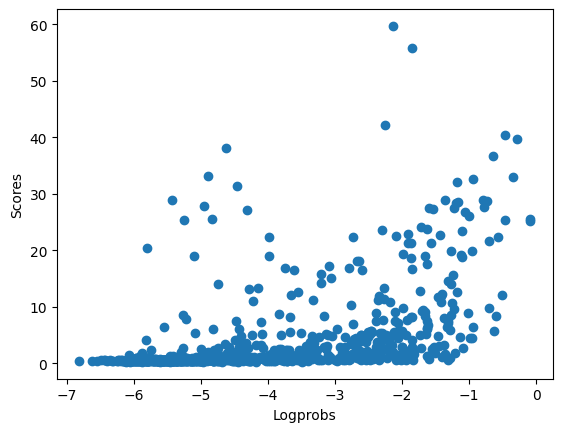

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(probs, scores)
plt.xlabel('Logprobs')
plt.ylabel('Scores')
plt.show()

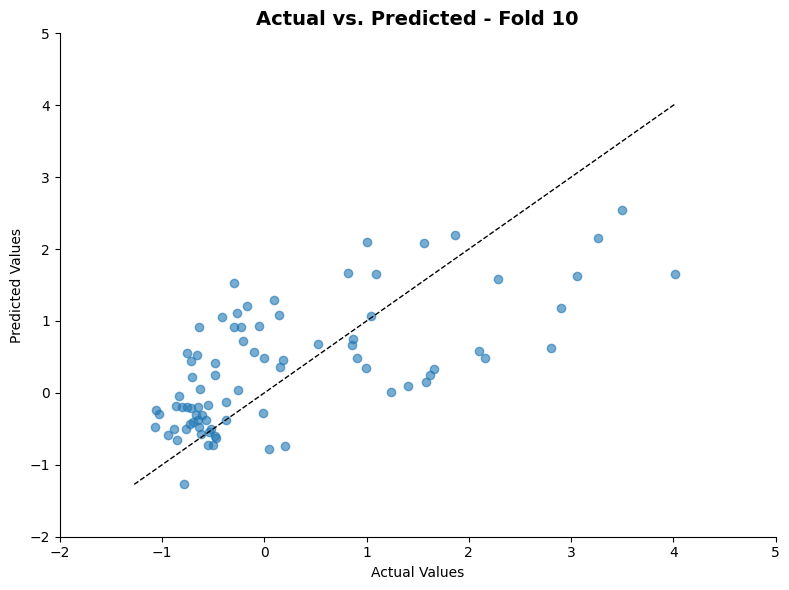



RMSE for Fold 10: 0.9161383166493949
RRMSE for Fold 10: 4.407693884417399
R^2 for Fold 10: 0.427974694410179


Average RMSE for all K: 0.890475207268097
Average RRMSE for all K: -4706.76721787825
Average R^2 for all K: 0.4887136091156969




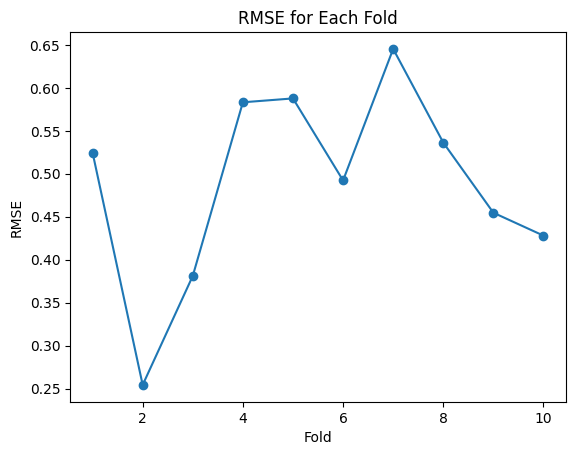

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from scipy.optimize import curve_fit
import os
save = True
# Sample data
probs = probs # probs
logscores = np.log(scores)    # logscores

# Define the linear regression model
def linear_model(x, a, b):
    return a * x + b

# Initial guess for the parameters
initial_guess = [1, 0]

# Number of folds for K-Fold Cross Validation
n_splits = 10

# Initialize K-Fold Cross Validation
kf = KFold(n_splits=n_splits, shuffle=True)

# List to store RMSE values for each fold
rmse_list = []
rrmse_list = []
r2_list = []

# Directory to save CSV files
save_path = '/content/drive/MyDrive/SMPO/Figures/Appendices'  # <-- replace with your actual path
os.makedirs(save_path, exist_ok=True)

# Create list to store all fold DataFrames
fold_dataframes = []

# Perform K-Fold Cross Validation
for fold, (train_index, test_index) in enumerate(kf.split(probs), start=1):
    probs_train, probs_test = probs[train_index], probs[test_index]
    logscores_train, logscores_test = logscores[train_index], logscores[test_index]

    # Fit the model
    params, covariance = curve_fit(linear_model, probs_train, logscores_train, p0=initial_guess)

    # Predict the log-scores on the test set
    predicted_logscores = linear_model(probs_test, *params)

    # Compute the RMSE
    rmse = np.sqrt(mean_squared_error(logscores_test, predicted_logscores))
    rmse_list.append(rmse)
    rrmse_list.append(rmse / np.average(logscores_test))

    # Compute the R^2 coefficient
    r2 = r2_score(logscores_test, predicted_logscores)
    r2_list.append(r2)

    # Store results in DataFrame for this fold
    fold_df = pd.DataFrame({
        'fold': fold,
        'predicted_log_score': probs_test,
        'actual_log_score': logscores_test,
        'fitted_predicted_log_score': predicted_logscores
    })
    fold_dataframes.append(fold_df)

    # Plot results for the last fold
    if fold == n_splits:
        plt.figure(figsize=(8, 6))
        plt.scatter(logscores_test, predicted_logscores, alpha=0.6)

        # Plot identity line
        min_val = min(min(logscores_test), min(predicted_logscores))
        max_val = max(max(logscores_test), max(predicted_logscores))
        plt.plot([min_val, max_val], [min_val, max_val], 'k--', linewidth=1)

        plt.xlabel('Actual Values')
        plt.ylabel('Predicted Values')

        min_val = math.floor(min_val / 1) * 1
        max_val = math.ceil(max_val / 1) * 1

        plt.xlim(min_val, max_val)
        plt.ylim(min_val, max_val)

        plt.title(f'Actual vs. Predicted - Fold {fold}', fontsize=14, fontweight='bold')

        ax = plt.gca()
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        plt.tight_layout()
        plt.show()

if(save):
  # Optionally, save all folds combined into one CSV
  all_folds_df = pd.concat(fold_dataframes, ignore_index=True)
  all_folds_df.to_csv(os.path.join(save_path, 'SMPO_40out100_line_plot.csv'), index=False)

print("\n")
# Print RMSE for the last fold
print(f'RMSE for Fold {n_splits}: {rmse_list[n_splits-1]}')
print(f'RRMSE for Fold {n_splits}: {rrmse_list[n_splits-1]}')
print(f'R^2 for Fold {n_splits}: {r2_list[n_splits-1]}')
print("\n")
print(f'Average RMSE for all K: {np.average(rmse_list)}')
print(f'Average RRMSE for all K: {np.average(rrmse_list)}')
print(f'Average R^2 for all K: {np.average(r2_list)}')
print("\n")

# Plot RMSE for all folds

plt.plot(range(1, n_splits + 1), r2_list, marker='o')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.title('RMSE for Each Fold')
plt.show()


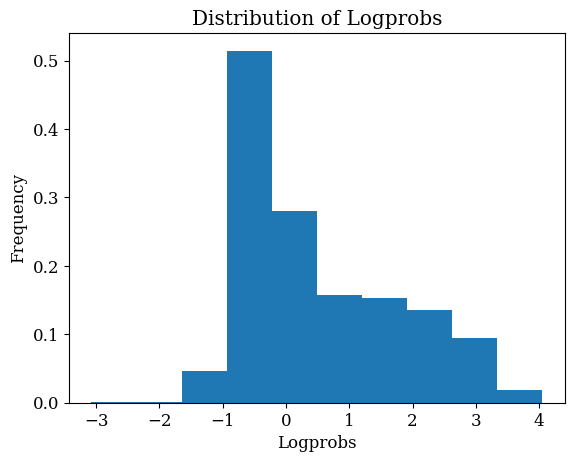

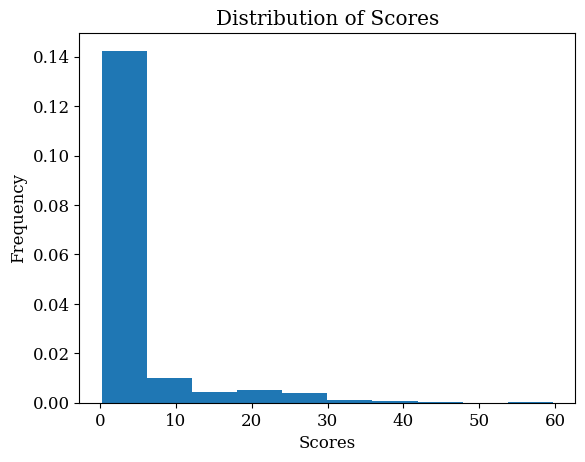

In [ ]:
plt.figure()
plt.hist(probs, density=True, bins=10)
plt.xlabel('Logprobs')
plt.ylabel('Frequency')
plt.title('Distribution of Logprobs')

plt.figure()
plt.hist(scores, density=True, bins=10)
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.title('Distribution of Scores')
plt.show()

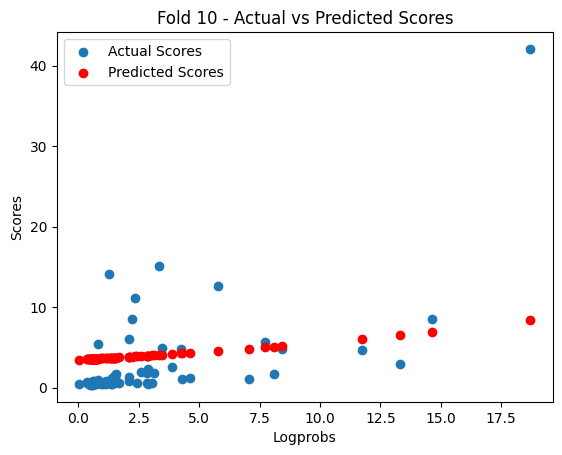

RMSE for Fold 10: 5.0900174590941
RRMSE for Fold 10: 2.0420012482695755
Average RMSE for all K: 6.231708476042542
Average RRMSE for all K: 1.6629229052354753


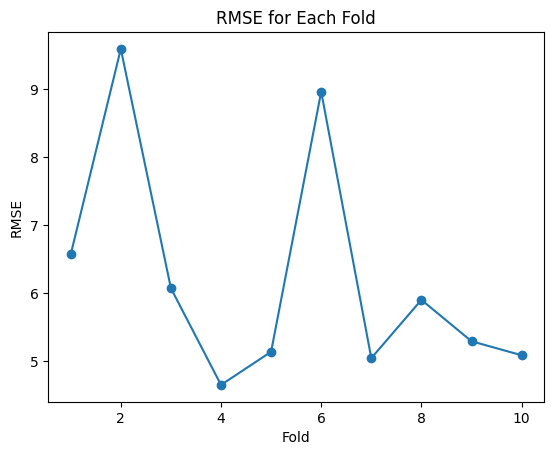

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit

# Sample data
logprobs = np.array(probs)
scores = np.array(scores)

# Define the exponential regression model
def exponential_model(x, a, b):
    return a * np.exp(b * x)

# Initial guess for the parameters
initial_guess = [1, 0.1]

# Number of folds for K-Fold Cross Validation
n_splits = 10

# Initialize K-Fold Cross Validation
kf = KFold(n_splits=n_splits, shuffle=True)

# List to store RMSE values for each fold
rmse_list = []
rrmse_list = []

# Perform K-Fold Cross Validation
for fold, (train_index, test_index) in enumerate(kf.split(logprobs), start=1):
    logprobs_train, logprobs_test = logprobs[train_index], logprobs[test_index]
    scores_train, scores_test = scores[train_index], scores[test_index]

    # Fit the model
    params, covariance = curve_fit(exponential_model, logprobs_train, scores_train, p0=initial_guess)

    # Predict the scores on the test set
    predicted_scores = exponential_model(logprobs_test, *params)

    # Compute the RMSE
    rmse = np.sqrt(mean_squared_error(scores_test, predicted_scores))
    rmse_list.append(rmse)
    rrmse_list.append(rmse/np.average(scores_test))

    # Plot results for fold 27
    if fold == n_splits:
      plt.scatter(logprobs_test, scores_test, label='Actual Scores')
      plt.scatter(logprobs_test, predicted_scores, label='Predicted Scores', color='red')
      plt.xlabel('Logprobs')
      plt.ylabel('Scores')
      plt.legend()
      plt.title(f'Fold {fold} - Actual vs Predicted Scores')
      plt.show()

# Print RMSE for fold 27
print(f'RMSE for Fold {n_splits}: {rmse_list[n_splits-1]}')
print(f'RRMSE for Fold {n_splits}: {rrmse_list[n_splits-1]}')
print(f'Average RMSE for all K: {np.average(rmse_list)}')
print(f'Average RRMSE for all K: {np.average(rrmse_list)}')
# Plot RMSE for all folds
plt.plot(range(1, n_splits + 1), rmse_list, marker='o')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.title('RMSE for Each Fold')
plt.show()



### Negative Controls

In [ ]:
df = pd.read_csv('/content/tm_library_annotated.csv')
df_evolved = pd.read_csv('/content/efficient_mutation_g1_g2_tmd_only.csv')
neg_controls = pd.read_csv("/content/100RandomHumanProteinSeqs.csv")
neg_seqs = neg_controls['RandomSubstring'].to_list()

In [ ]:
# Negative controls
max_length = 50
out = get_sequence_probs(neg_seqs, model, tokenizer, max_length, device)
neg_array = out.cpu().numpy()

# Positive samples
pos_seqs = df['aa_seq'].to_list()
max_length = 50
out = get_sequence_probs(pos_seqs, model, tokenizer, max_length, device)
pos_array = out.cpu().numpy()

evolved_seqs = df_evolved['Subsequence'].to_list()
evolved_array = get_sequence_probs(evolved_seqs, model, tokenizer, max_length, device).cpu().numpy()

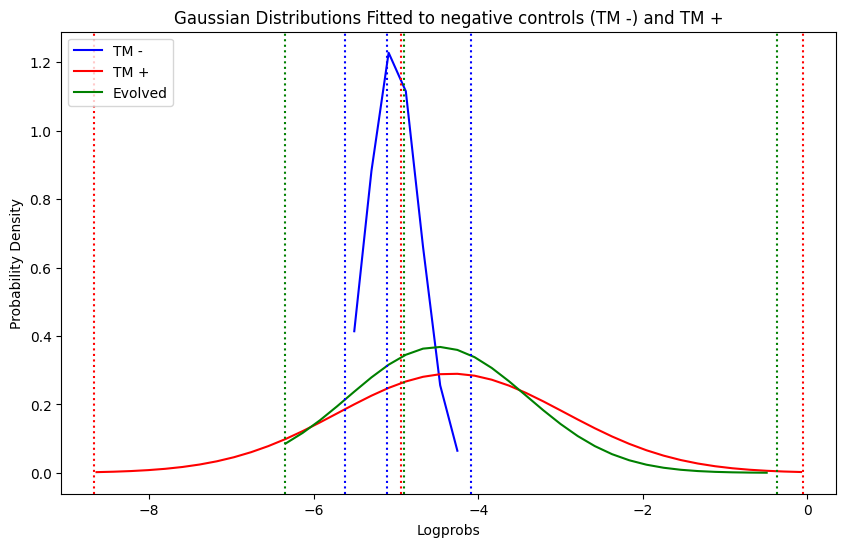

In [ ]:
# characterization of distributions
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Data for the two distributions
distribution_1 = [np.max(neg_array), np.min(neg_array), np.mean(neg_array), np.std(neg_array), np.median(neg_array)]
distribution_2 = [np.max(pos_array), np.min(pos_array), np.mean(pos_array), np.std(pos_array), np.median(pos_array)]
distribution_3 = [np.max(evolved_array), np.min(evolved_array), np.mean(evolved_array), np.std(evolved_array), np.median(evolved_array)]

# Extracting statistics
max1, min1, mean1, std1, median1 = distribution_1
max2, min2, mean2, std2, median2 = distribution_2
max3, min3, mean3, std3, median3 = distribution_3

# Generate points on the x axis
x = np.linspace(min(min1, min2) - 100, max(max1, max2) + 100, 1000)

# Calculate the Gaussian distributions
x1_filtered = x[(x >= min1) & (x <= max1)]
y1_filtered = norm.pdf(x1_filtered, mean1, std1)

x2_filtered = x[(x >= min2) & (x <= max2)]
y2_filtered = norm.pdf(x2_filtered, mean2, std2)

x3_filtered = x[(x >= min3) & (x <= max3)]
y3_filtered = norm.pdf(x3_filtered, mean3, std3)

# Plotting the distributions
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(x1_filtered, y1_filtered, label='TM -', color='blue')
ax.plot(x2_filtered, y2_filtered, label='TM +', color='red')
ax.plot(x3_filtered, y3_filtered, label='Evolved', color='green')

# Marking max, min, and median on the plots
ax.axvline(max1, color='blue', linestyle='dotted')
ax.axvline(min1, color='blue', linestyle='dotted')
ax.axvline(median1, color='blue', linestyle='dotted')

ax.axvline(max2, color='red', linestyle='dotted')
ax.axvline(min2, color='red', linestyle='dotted')
ax.axvline(median2, color='red', linestyle='dotted')

ax.axvline(max3, color='green', linestyle='dotted')
ax.axvline(min3, color='green', linestyle='dotted')
ax.axvline(median3, color='green', linestyle='dotted')

# Adding labels, title, and legend
ax.set_xlabel('Logprobs')
ax.set_ylabel('Probability Density')
ax.set_title('Gaussian Distributions Fitted to negative controls (TM -) and TM +')
ax.legend()

plt.show()


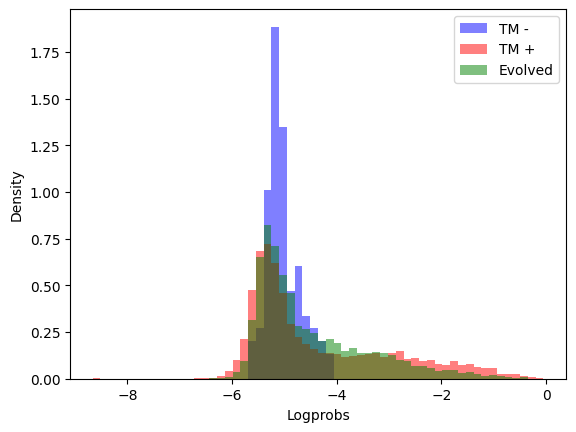

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data
array1 = neg_array
array2 = pos_array
array3 = evolved_array

# Combine arrays to find the optimal binning
combined_array = np.concatenate([array1, array2, array3])

# Find optimal bin edges using numpy's histogram_bin_edges
bin_edges = np.histogram_bin_edges(combined_array, bins='auto')

# Plot normalized histograms with the optimal binning
plt.hist(array1, bins=bin_edges, alpha=0.5, color='blue', label='TM -', density=True)
plt.hist(array2, bins=bin_edges, alpha=0.5, color='red', label='TM +', density=True)
plt.hist(array3, bins=bin_edges, alpha=0.5, color='green', label='Evolved', density=True)

# Add labels and legend
plt.xlabel('Logprobs')
plt.ylabel('Density')
ax.set_title('Gaussian Distributions Fitted to negative controls (TM -) and TM + and evolved seqs')
plt.legend(loc='upper right')

# Show the plot
plt.show()


In [ ]:
# Cosmic-forest-70

In [ ]:
07/25 - v1 (10%)
07/26 - v2 (8%)
07/26 - v1 (10%)
07/27 - v1 (6%, 50k steps)
07/31 - v1 (27%, 50k steps)

## Structure Prediction

In [ ]:
!pip install torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 29.4 MB/s eta 0:00:00


In [ ]:
import torch
import torch.nn.functional as F
from transformers import AutoModel, EsmForMaskedLM, EsmForProteinFolding, AutoTokenizer, EsmConfig, EsmModel
import esm

model_size = (6, '8M')
model_checkpoint = f"facebook/esm2_t{model_size[0]}_{model_size[1]}_UR50D"
#model_checkpoint = "facebook/esmfold_v1"

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

config = EsmConfig.from_pretrained(model_checkpoint)
print(config)

config.json:   0%|          | 0.00/775 [00:00<?, ?B/s]

EsmConfig {
  "_name_or_path": "/tmp/facebook/esm2_t6_8M_UR50D",
  "architectures": [
    "EsmForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.0,
  "classifier_dropout": null,
  "emb_layer_norm_before": false,
  "esmfold_config": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 320,
  "initializer_range": 0.02,
  "intermediate_size": 1280,
  "is_folding_model": false,
  "layer_norm_eps": 1e-05,
  "mask_token_id": 32,
  "max_position_embeddings": 1026,
  "model_type": "esm",
  "num_attention_heads": 20,
  "num_hidden_layers": 6,
  "pad_token_id": 1,
  "position_embedding_type": "rotary",
  "token_dropout": true,
  "torch_dtype": "float32",
  "transformers_version": "4.44.2",
  "use_cache": true,
  "vocab_list": null,
  "vocab_size": 33
}



cuda


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of EsmModel were not initialized from the model checkpoint at facebook/esm2_t6_8M_UR50D and are newly initialized: ['esm.pooler.dense.bias', 'esm.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Outputs shape: torch.Size([1, 25, 320])
Contacts shape: (1, 23, 23)


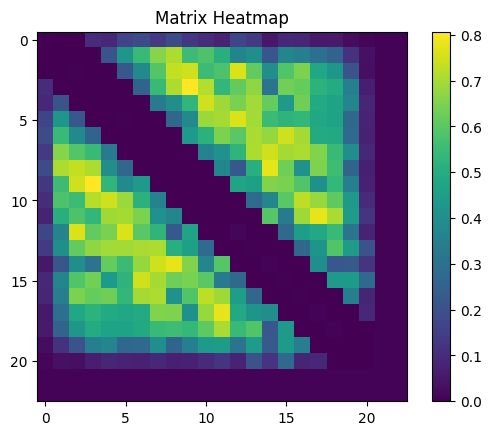

In [ ]:
import pandas as pd
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

esm = EsmModel.from_pretrained(model_checkpoint).to(device)
esm.eval()
esm.gradient_checkpointing_enable()
esm.use_cache = False

# sequences = [
#     'ALATGACIVGILCLPLILLLVALATGACIVGILCLPLILLLVALATGACI',
# ]
indx = 0
sequences = pd.read_csv('/content/tm_library_train.csv')['aa_seq'].to_list()[indx]
max_length = 25 #max([len(seq) for seq in sequences])

#Tokenize and pad/truncate the sequences
tokens = tokenizer(sequences, padding="max_length", max_length=max_length, truncation=True, return_tensors="pt").to(device)
input_ids = tokens["input_ids"]
attention_mask = tokens["attention_mask"]

with torch.no_grad():

  contacts = esm.predict_contacts(tokens=input_ids, attention_mask=attention_mask)
  outputs = esm(input_ids=input_ids, attention_mask=attention_mask).last_hidden_state
  print(f"Outputs shape: {outputs.shape}")
  print(f"Contacts shape: {contacts.cpu().numpy().shape}")
  plt.imshow(contacts.cpu().numpy()[0,:,:], cmap='viridis', interpolation='nearest')
  plt.colorbar()  # Show color scale
  plt.title('Matrix Heatmap')
  plt.show()


In [ ]:

'''returns shape (2, E_g_batch) where first row is x-index, second is y-index,
, E_g_batch is total number of edges in batch'''
def get_edge_index(contacts_batch, threshold=0.5):
  batch_indices, row_indices, col_indices = torch.where(contacts_batch > threshold)
  indices = torch.stack((col_indices, row_indices), dim=0)
  return indices

'''formats residue embeddings to node features for graph. Returns shape (N_g_batch, F) where N_g_batch is total number
nodes/contact residues in batch and F is feature dimension of each residue'''
def get_node_features(outputs_batch):

    reshaped_tensor = outputs_batch.view(-1, outputs_batch.size(2))
    batch_size = outputs_batch.size(0)
    num_elements_per_batch = outputs_batch.size(1)

    # Create a tensor indicating the batch index for each element
    batch_indices = torch.cat([torch.full((num_elements_per_batch,), i) for i in range(batch_size)])
    return reshaped_tensor, batch_indices

'''formats ESM output to graph'''
def format_to_graph_batch(contacts_batch, outputs_batch, threshold=0.5):
    edge_indices = get_edge_index(contacts_batch, 0)
    edge_attr = contacts_batch[:, edge_indices[0, :], edge_indices[1, :]]
    edge_attr = edge_attr.view(-1, 1)
    node_features, batch_indices = get_node_features(outputs_batch)
    return edge_indices, node_features, batch_indices, edge_attr

def get_graph(model, tokenizer, sequences, max_length, device=device):
    tokens = tokenizer(sequences, padding="max_length", max_length=max_length, truncation=True, return_tensors="pt").to(device)
    input_ids = tokens["input_ids"]
    attention_mask = tokens["attention_mask"]

    eos_index = torch.where(input_ids[0] == tokenizer.eos_token_id)[0].item()
    non_special_indices = torch.arange(1, eos_index)
    with torch.no_grad():
        contacts = model.predict_contacts(tokens=input_ids, attention_mask=attention_mask)
        contacts = contacts[:, non_special_indices][:, :, non_special_indices]
        outputs = model(input_ids=input_ids, attention_mask=attention_mask).last_hidden_state
        outputs = outputs[:, non_special_indices, :]
        #print(outputs.shape)

    return format_to_graph_batch(contacts.cpu(), outputs.cpu())

out = get_graph(esm, tokenizer, ['METDTLLLWVLLLWVPGSTGDASETGGSGGRLGSDKTHTCPPCPAPELLGGPSVFLFPPKPKDTLMISRTPEVTCVVVDVSHEDPEVKFNWYVDGVEVHNAKTKPREEQYNSTYRVVSVLTVLHQDWLNGKEYKCKVSNKALPAPIEKTISKAKGQPREPQVYTLPPSREEMTKNQVSLTCLVKGFYPSDIAVEWESNGQPENNYKTTPPVLDSDGSFFLYSKLTVDKSRWQQGNVFSCSVMHEALHNHYTQKSLSLSPGKGGGGSGGGGSGGGGSGEQKLISEEDLALATGACIVGILCLPLILLLVGGSGGLENLYFQSGSGGTLLEALTLASARGPLRKRSVPMAKAKPKFSISPDSLS'], max_length=512)
print(out[0].shape)

torch.Size([2, 131044])


In [ ]:
import torch
from torch_geometric.data import Dataset, Data, InMemoryDataset
import os
import pandas as pd
from tqdm import tqdm

class CustomGraphDatasetInMemory(InMemoryDataset):
    def __init__(self, root, file_path, model, tokenizer, max_length, transform=None, pre_transform=None):
        df = pd.read_csv(file_path)
        #df = df[df['avg_induction_score'] > 3.055293866]
        self.data = df.reset_index(drop=True)
        self.tokenizer = tokenizer
        self.model = model
        self.max_length = max_length
        super(CustomGraphDatasetInMemory, self).__init__(root, transform, pre_transform)

        # Initialize data_list by loading processed data from disk, if it exists
        if os.path.exists(self.processed_paths[0]):
            self.data_list = torch.load(self.processed_paths[0])
        else:
            self.data_list = []

    @property
    def raw_file_names(self):
        # No raw files needed
        return []

    @property
    def processed_file_names(self):
        # Define where processed data will be stored
        return ['data.pt']

    def process(self):
        # Process the entire dataset and save it to disk
        data_list = []

        for idx in tqdm(range(len(self.data))):
            # Generate graph data using the model and tokenizer
            edge_indices, node_features, batch_indices, edge_attr = get_graph(
                self.model, self.tokenizer, [self.data['aa_seq'][idx]], self.max_length
            )

            # Graph-level label (e.g., for regression or classification)
            y = torch.log(torch.Tensor([self.data['avg_induction_score'][idx]]))

            # Create Data object
            graph_data = Data(x=node_features, edge_index=edge_indices, y=y, edge_attr=edge_attr)
            # Append to list
            data_list.append(graph_data)

        # Save the processed data list to disk without calling self.collate
        torch.save(data_list, self.processed_paths[0])

    def len(self):
        # Length is determined by the CSV data
        return len(self.data_list)

    def get(self, idx):
        # Return the graph data object at the given index
        return self.data_list[idx]


class CustomGraphDataset(Dataset):
    def __init__(self, root, file_path, model, tokenizer, max_length, transform=None, pre_transform=None):
        super(CustomGraphDataset, self).__init__(root, transform, pre_transform)
        df = pd.read_csv(file_path)
        #df = df[df['avg_induction_score'] > 3.055293866]
        self.data = df.reset_index(drop=True)
        self.tokenizer = tokenizer
        self.model = model
        self.max_length = max_length

    @property
    def raw_file_names(self):
        # No raw file, as we're generating data dynamically
        return []

    @property
    def processed_file_names(self):
        # No processed file, as we're generating data dynamically
        return []

    def len(self):
        # Define the number of graphs in the dataset
        return len(self.data)  # For example, 10 graphs

    def get(self, idx):
        edge_indices, node_features, batch_indices, edge_attr = get_graph(self.model, self.tokenizer, [self.data['aa_seq'][idx]], self.max_length, device)
        #edge_attr = torch.ones((edge_index.size(1), 1))  # One scalar feature per edge
        # Graph-level label (e.g., for binary classification)
        y = torch.Tensor([self.data['avg_induction_score'][idx]])

        # Create and return the Data object for the graph
        data = Data(x=node_features, edge_index=edge_indices, y=y, edge_attr=edge_attr)

        return data


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import MessagePassing, global_mean_pool, global_max_pool, global_add_pool
from torch_geometric.utils import degree

class MPNNLayer(MessagePassing):
    def __init__(self, node_dim, edge_dim, hidden_dim):
        super(MPNNLayer, self).__init__(aggr='sum')  # "Add" aggregation (sum messages)

        # MLP to compute messages
        self.message_mlp = nn.Sequential(
            nn.Linear(2 * hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim)
        )

        # MLP to update node features
        self.update_mlp = nn.Sequential(
            nn.Linear(2 * hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim)
        )

    def forward(self, x, edge_index, edge_attr):
        # Start the message passing process
        return self.propagate(edge_index, x=x, edge_attr=edge_attr)

    def message(self, x_j, edge_attr):
        # Concatenate the node features of neighbors (x_j) with the edge features
        return self.message_mlp(torch.cat([x_j, edge_attr], dim=-1))

    def update(self, aggr_out, x):
        # Concatenate the aggregated messages with the original node features
        return self.update_mlp(torch.cat([x, aggr_out], dim=-1))


class MPNN(nn.Module):
    def __init__(self, node_dim, edge_dim, hidden_dim, num_layers):
        super(MPNN, self).__init__()
        # Project node features and edge features initially
        self.node_proj = nn.Linear(node_dim, hidden_dim)
        self.edge_proj = nn.Linear(edge_dim, hidden_dim)

        # Stack of MPNN layers
        self.layers = nn.ModuleList([MPNNLayer(hidden_dim, hidden_dim, hidden_dim) for _ in range(num_layers)])
        self.readout = global_add_pool
        self.regression_head = nn.Linear(hidden_dim, 1)  # For graph-level regression or classification

    def forward(self, x, edge_index, edge_attr, batch):
        # Project node features and edge features to hidden_dim initially
        x = self.node_proj(x)
        edge_attr = self.edge_proj(edge_attr)

        # Pass through MPNN layers
        for layer in self.layers:
            x = layer(x, edge_index, edge_attr)

        # Global pooling to get graph-level representation
        graph_embedding = self.readout(x, batch)

        # Graph-level classification or regression output
        return self.regression_head(graph_embedding)


In [ ]:
from torch_geometric.loader import DataLoader
import torch.optim as optim
import shutil

output_path = '/content/train'
if(os.path.exists(output_path)):
    shutil.rmtree(output_path)
    print(f"Directory '{output_path}' removed successfully.")
else:
    print(f"Directory '{output_path}' does not exist.")

output_path = '/content/test'
if(os.path.exists(output_path)):
    shutil.rmtree(output_path)
    print(f"Directory '{output_path}' removed successfully.")
else:
    print(f"Directory '{output_path}' does not exist.")

output_path = '/content/val'
if(os.path.exists(output_path)):
    shutil.rmtree(output_path)
    print(f"Directory '{output_path}' removed successfully.")
else:
    print(f"Directory '{output_path}' does not exist.")

# Create the DataLoader (from the custom dataset created earlier)
val_dataset = CustomGraphDatasetInMemory(root=os.getcwd() + '/val', file_path=os.getcwd() + '/tm_library_val.csv', tokenizer=tokenizer, model=esm, max_length=40)
test_dataset = CustomGraphDatasetInMemory(root=os.getcwd() + '/test', file_path=os.getcwd() + '/tm_library_test.csv', tokenizer=tokenizer, model=esm, max_length=40)
train_dataset = CustomGraphDatasetInMemory(root=os.getcwd() + '/train', file_path=os.getcwd() + '/tm_library_train.csv', tokenizer=tokenizer, model=esm, max_length=40)


Processing...
/usr/local/lib/python3.10/dist-packages/torch_geometric/data/in_memory_dataset.py:300: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  warnings.warn(msg)


Directory '/content/train' does not exist.
Directory '/content/test' does not exist.
Directory '/content/val' does not exist.


100%|██████████| 266/266 [00:04<00:00, 59.80it/s]
Done!
<ipython-input-41-6a60a6f1eeea>:19: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.data_list = torch.load(self.pr

In [ ]:
import itertools
from tqdm import tqdm
import torch.optim as optim
from torch_geometric.loader import DataLoader

# Define device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# hyperparams
batch_size = 64
lr = 1e-3

# Instantiate the model, loss function, and optimizer
model = MPNN(node_dim=320, edge_dim=1, hidden_dim=16, num_layers=4).to(device)

total_trainable_params  = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Total trainable parameters: {total_trainable_params}")

optimizer = optim.AdamW(model.parameters(), lr=lr, weight_decay=1e0)
criterion = nn.MSELoss()  # Binary classification

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)


# Training loop
num_epochs = 10
print_interval = 10 # Print every 100 epochs

scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=num_epochs*len(train_loader), eta_min=1e-6)

for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    running_train_loss = 0.0
    print_count = 0

    # Training phase
    for idx, batch in enumerate(tqdm(train_loader)):
        batch = batch.to(device)  # Move batch data to the appropriate device

        optimizer.zero_grad()  # Zero gradients
        output = model(batch.x, batch.edge_index, batch.edge_attr, batch.batch)  # Forward pass
        #print(output.view(-1))
        loss = criterion(output.view(-1), batch.y.float())  # Calculate loss
        loss.backward()  # Backpropagation

        optimizer.step()  # Update model parameters
        scheduler.step()

        running_train_loss += loss.item()  # Accumulate training loss

        if(idx % print_interval == 0):
          # Validation phase
          model.eval()  # Set model to evaluation mode
          running_val_loss = 0.0
          with torch.no_grad():  # Disable gradient computation
              for val_batch in val_loader:  # Use `val_batches` to limit validation steps
                  val_batch = val_batch.to(device)  # Get next batch from validation loader
                  val_output = model(val_batch.x, val_batch.edge_index, val_batch.edge_attr, val_batch.batch)
                  val_loss = criterion(val_output.view(-1), val_batch.y.float())
                  running_val_loss += val_loss.item()  # Accumulate validation loss
          avg_val_loss = running_val_loss / len(val_loader)
          print(f"Batch {idx+1}/{len(train_loader)}, Train Loss: {running_train_loss / (idx+1):.4f}, Val Loss: {avg_val_loss:.4f}")
          model.train()


Total trainable parameters: 11585


  6%|▌         | 4/72 [00:00<00:01, 36.13it/s]

Batch 1/72, Train Loss: 9.2988, Val Loss: 1.8733


 15%|█▌        | 11/72 [00:00<00:01, 44.07it/s]

Batch 11/72, Train Loss: 2.4119, Val Loss: 2.0328


 43%|████▎     | 31/72 [00:00<00:00, 47.72it/s]

Batch 21/72, Train Loss: 2.0539, Val Loss: 1.7220
Batch 31/72, Train Loss: 1.8368, Val Loss: 1.7078


 61%|██████    | 44/72 [00:00<00:00, 49.18it/s]

Batch 41/72, Train Loss: 1.8227, Val Loss: 1.8859
Batch 51/72, Train Loss: 1.7599, Val Loss: 1.5016


 99%|█████████▊| 71/72 [00:01<00:00, 49.31it/s]

Batch 61/72, Train Loss: 1.7058, Val Loss: 1.7022
Batch 71/72, Train Loss: 1.6676, Val Loss: 1.3729


 15%|█▌        | 11/72 [00:00<00:01, 45.89it/s]

Batch 1/72, Train Loss: 1.4676, Val Loss: 1.6227
Batch 11/72, Train Loss: 1.1724, Val Loss: 1.5093


 43%|████▎     | 31/72 [00:00<00:00, 49.35it/s]

Batch 21/72, Train Loss: 1.2423, Val Loss: 1.5403
Batch 31/72, Train Loss: 1.2813, Val Loss: 1.5020


 71%|███████   | 51/72 [00:01<00:00, 49.13it/s]

Batch 41/72, Train Loss: 1.2562, Val Loss: 1.6975
Batch 51/72, Train Loss: 1.2491, Val Loss: 1.2730


 89%|████████▉ | 64/72 [00:01<00:00, 49.60it/s]

Batch 61/72, Train Loss: 1.2221, Val Loss: 1.3465
Batch 71/72, Train Loss: 1.2089, Val Loss: 1.4942

100%|██████████| 72/72 [00:01<00:00, 49.82it/s]


  6%|▌         | 4/72 [00:00<00:01, 39.24it/s]

Batch 1/72, Train Loss: 1.0636, Val Loss: 1.3806


 29%|██▉       | 21/72 [00:00<00:01, 45.97it/s]

Batch 11/72, Train Loss: 1.1668, Val Loss: 1.2218
Batch 21/72, Train Loss: 1.1198, Val Loss: 1.1943


 57%|█████▋    | 41/72 [00:00<00:00, 49.47it/s]

Batch 31/72, Train Loss: 1.0854, Val Loss: 1.1370
Batch 41/72, Train Loss: 1.0859, Val Loss: 1.5267


 85%|████████▍ | 61/72 [00:01<00:00, 50.74it/s]

Batch 51/72, Train Loss: 1.1140, Val Loss: 1.3996
Batch 61/72, Train Loss: 1.1169, Val Loss: 1.2007


100%|██████████| 72/72 [00:01<00:00, 50.74it/s]


Batch 71/72, Train Loss: 1.1181, Val Loss: 1.3770


  7%|▋         | 5/72 [00:00<00:01, 43.67it/s]

Batch 1/72, Train Loss: 1.9702, Val Loss: 1.2531


 25%|██▌       | 18/72 [00:00<00:01, 51.68it/s]

Batch 11/72, Train Loss: 1.2788, Val Loss: 1.7251
Batch 21/72, Train Loss: 1.1707, Val Loss: 1.2023


 53%|█████▎    | 38/72 [00:00<00:00, 52.55it/s]

Batch 31/72, Train Loss: 1.1284, Val Loss: 1.2415
Batch 41/72, Train Loss: 1.1241, Val Loss: 1.1854


 78%|███████▊  | 56/72 [00:01<00:00, 49.91it/s]

Batch 51/72, Train Loss: 1.1371, Val Loss: 1.3342
Batch 61/72, Train Loss: 1.1077, Val Loss: 1.1586


100%|██████████| 72/72 [00:01<00:00, 49.10it/s]


Batch 71/72, Train Loss: 1.0948, Val Loss: 1.4633


  6%|▌         | 4/72 [00:00<00:01, 36.40it/s]

Batch 1/72, Train Loss: 0.8078, Val Loss: 1.2977


 25%|██▌       | 18/72 [00:00<00:01, 50.54it/s]

Batch 11/72, Train Loss: 1.1178, Val Loss: 1.1735
Batch 21/72, Train Loss: 1.0881, Val Loss: 1.1499


 53%|█████▎    | 38/72 [00:00<00:00, 50.81it/s]

Batch 31/72, Train Loss: 1.0914, Val Loss: 1.3198


 61%|██████    | 44/72 [00:00<00:00, 48.23it/s]

Batch 41/72, Train Loss: 1.0784, Val Loss: 1.6163


 79%|███████▉  | 57/72 [00:01<00:00, 47.99it/s]

Batch 51/72, Train Loss: 1.0665, Val Loss: 1.3065


 96%|█████████▌| 69/72 [00:01<00:00, 51.16it/s]

Batch 61/72, Train Loss: 1.0722, Val Loss: 1.1480
Batch 71/72, Train Loss: 1.0586, Val Loss: 1.1768


 15%|█▌        | 11/72 [00:00<00:01, 44.76it/s]

Batch 1/72, Train Loss: 1.5963, Val Loss: 1.3117
Batch 11/72, Train Loss: 1.1160, Val Loss: 1.1019


 43%|████▎     | 31/72 [00:00<00:00, 49.93it/s]

Batch 21/72, Train Loss: 1.0561, Val Loss: 1.2860
Batch 31/72, Train Loss: 1.0674, Val Loss: 1.1712


 71%|███████   | 51/72 [00:01<00:00, 49.23it/s]

Batch 41/72, Train Loss: 1.0331, Val Loss: 1.4414
Batch 51/72, Train Loss: 1.0353, Val Loss: 1.4376


 99%|█████████▊| 71/72 [00:01<00:00, 49.43it/s]

Batch 61/72, Train Loss: 1.0281, Val Loss: 1.3925
Batch 71/72, Train Loss: 1.0413, Val Loss: 1.1042


 15%|█▌        | 11/72 [00:00<00:01, 44.35it/s]

Batch 1/72, Train Loss: 0.8369, Val Loss: 1.5394
Batch 11/72, Train Loss: 1.0699, Val Loss: 1.2744


 43%|████▎     | 31/72 [00:00<00:00, 49.04it/s]

Batch 21/72, Train Loss: 1.0159, Val Loss: 1.1704
Batch 31/72, Train Loss: 1.0646, Val Loss: 1.0710


 71%|███████   | 51/72 [00:01<00:00, 50.37it/s]

Batch 41/72, Train Loss: 1.0651, Val Loss: 1.0946
Batch 51/72, Train Loss: 1.0517, Val Loss: 1.1573


 99%|█████████▊| 71/72 [00:01<00:00, 50.78it/s]

Batch 61/72, Train Loss: 1.0364, Val Loss: 1.2079
Batch 71/72, Train Loss: 1.0320, Val Loss: 1.1881


 15%|█▌        | 11/72 [00:00<00:01, 47.32it/s]

Batch 1/72, Train Loss: 1.2992, Val Loss: 1.2586
Batch 11/72, Train Loss: 1.0574, Val Loss: 1.5042


 43%|████▎     | 31/72 [00:00<00:00, 49.88it/s]

Batch 21/72, Train Loss: 1.0550, Val Loss: 1.7376
Batch 31/72, Train Loss: 1.0297, Val Loss: 1.2555


 71%|███████   | 51/72 [00:01<00:00, 49.45it/s]

Batch 41/72, Train Loss: 1.0195, Val Loss: 1.1315
Batch 51/72, Train Loss: 1.0195, Val Loss: 1.2782


100%|██████████| 72/72 [00:01<00:00, 51.42it/s]


Batch 61/72, Train Loss: 1.0073, Val Loss: 1.1600
Batch 71/72, Train Loss: 1.0062, Val Loss: 1.1493


 15%|█▌        | 11/72 [00:00<00:01, 44.93it/s]

Batch 1/72, Train Loss: 1.3104, Val Loss: 1.1067
Batch 11/72, Train Loss: 0.9725, Val Loss: 1.3684


 33%|███▎      | 24/72 [00:00<00:00, 48.22it/s]

Batch 21/72, Train Loss: 0.9815, Val Loss: 1.1727
Batch 31/72, Train Loss: 1.0139, Val Loss: 1.1362


 71%|███████   | 51/72 [00:01<00:00, 49.04it/s]

Batch 41/72, Train Loss: 1.0299, Val Loss: 1.2221
Batch 51/72, Train Loss: 0.9897, Val Loss: 1.2233


 99%|█████████▊| 71/72 [00:01<00:00, 49.50it/s]

Batch 61/72, Train Loss: 0.9878, Val Loss: 1.1306
Batch 71/72, Train Loss: 0.9957, Val Loss: 1.4013


  6%|▌         | 4/72 [00:00<00:01, 37.03it/s]

Batch 1/72, Train Loss: 0.5964, Val Loss: 1.1919


 25%|██▌       | 18/72 [00:00<00:01, 51.47it/s]

Batch 11/72, Train Loss: 0.9048, Val Loss: 1.4257
Batch 21/72, Train Loss: 0.9471, Val Loss: 1.2649


 53%|█████▎    | 38/72 [00:00<00:00, 53.00it/s]

Batch 31/72, Train Loss: 0.9414, Val Loss: 1.2582
Batch 41/72, Train Loss: 0.9478, Val Loss: 1.2434


 81%|████████  | 58/72 [00:01<00:00, 53.86it/s]

Batch 51/72, Train Loss: 0.9759, Val Loss: 1.1459
Batch 61/72, Train Loss: 0.9909, Val Loss: 1.2221


100%|██████████| 72/72 [00:01<00:00, 49.91it/s]

Batch 71/72, Train Loss: 0.9923, Val Loss: 1.1015


In [ ]:
## evaluate on test set
model.eval()
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=True)

y_pred = []
y_true = []

for batch in test_loader:

    batch = batch.to(device)
    with torch.no_grad():
      output = model(batch.x, batch.edge_index, batch.edge_attr, batch.batch).cpu().detach().numpy()
      batch_y = batch.y.cpu().detach().numpy()
      y_pred.append(output)
      y_true.append(batch_y)

y_pred = np.concatenate(y_pred, axis=0).flatten()
y_true = np.concatenate(y_true, axis=0).flatten()

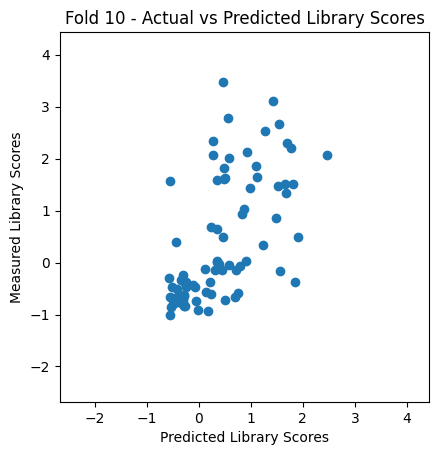



RMSE for Fold 10: 0.9445526599884033
RRMSE for Fold 10: 2.3461170196533203
R^2 for Fold 10: 0.37566977572390714


Average RMSE for all K: 1.0874583721160889
Average RRMSE for all K: 2.425351619720459
Average R^2 for all K: 0.3807119227601702




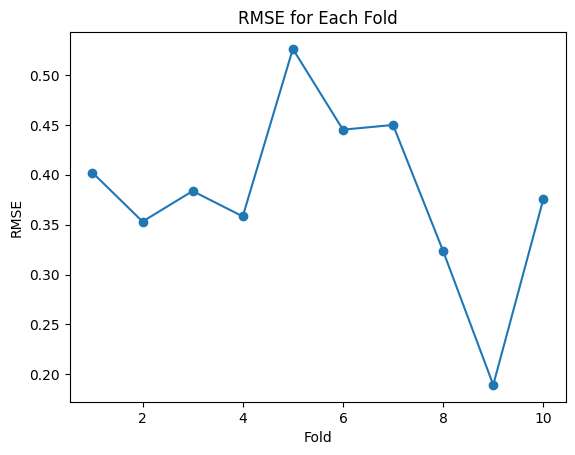

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from scipy.optimize import curve_fit

# Sample data
y_pred_arr = np.array(y_pred)
y_true_arr = np.array(y_true)

# Define the linear regression model
def linear_model(x, a, b):
    return a * x + b

# Initial guess for the parameters
initial_guess = [1, 0]

# Number of folds for K-Fold Cross Validation
n_splits = 10

# Initialize K-Fold Cross Validation
kf = KFold(n_splits=n_splits, shuffle=True)

# List to store RMSE values for each fold
rmse_list = []
rrmse_list = []
r2_list = []

# Perform K-Fold Cross Validation
for fold, (train_index, test_index) in enumerate(kf.split(y_pred_arr), start=1):
    y_pred_arr_train, y_pred_arr_test = y_pred_arr[train_index], y_pred_arr[test_index]
    y_true_arr_train, y_true_arr_test = y_true_arr[train_index], y_true_arr[test_index]

    # Fit the model
    params, covariance = curve_fit(linear_model, y_pred_arr_train, y_true_arr_train, p0=initial_guess)

    # Predict the log-scores on the test set
    predicted_scores = linear_model(y_pred_arr_test, *params)

    # Compute the RMSE
    rmse = np.sqrt(mean_squared_error(y_true_arr_test, predicted_scores))
    rmse_list.append(rmse)
    rrmse_list.append(rmse / np.average(y_true_arr_test))

    # Compute the R^2 coefficient
    r2 = r2_score(y_true_arr_test, predicted_scores)
    r2_list.append(r2)

    # Plot results for the last fold
    if fold == n_splits:
        plt.scatter(predicted_scores, y_true_arr_test)
        #plt.scatter(probs_test, predicted_logscores, label='Predicted Logscores', color='red')
        plt.xlabel('Predicted Library Scores')
        plt.ylabel('Measured Library Scores')
        #plt.legend()

        min_value = min(min(predicted_logscores), min(logscores_test)) - 1
        max_value = max(max(predicted_logscores), max(logscores_test)) + 1

        # Set the range for both x and y axes to be the same
        plt.xlim(min_value, max_value)
        plt.ylim(min_value, max_value)

        # Set identical ticks on both axes
        ticks = np.arange(int(min_value), int(max_value) + 1, 1)  # Adjust the increment (here 1) as needed
        plt.xticks(ticks)
        plt.yticks(ticks)

        # Set aspect ratio to be equal
        plt.gca().set_aspect('equal', adjustable='box')

        plt.title(f'Fold {fold} - Actual vs Predicted Library Scores')
        plt.show()

print("\n")
# Print RMSE for the last fold
print(f'RMSE for Fold {n_splits}: {rmse_list[n_splits-1]}')
print(f'RRMSE for Fold {n_splits}: {rrmse_list[n_splits-1]}')
print(f'R^2 for Fold {n_splits}: {r2_list[n_splits-1]}')
print("\n")
print(f'Average RMSE for all K: {np.average(rmse_list)}')
print(f'Average RRMSE for all K: {np.average(rrmse_list)}')
print(f'Average R^2 for all K: {np.average(r2_list)}')
print("\n")

# Plot RMSE for all folds
plt.plot(range(1, n_splits + 1), r2_list, marker='o')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.title('RMSE for Each Fold')
plt.show()


## ClinVar

In [ ]:
import pandas as pd
import csv

tm_df = pd.read_csv('/content/TM_Library_Expression_Retention (1).csv')
# count number of duplicates in one column
tm_df['group'] = tm_df['Seq ID'].apply(lambda x: x.split("_")[-1])
tm_df['Seq ID'] = tm_df['Seq ID'].apply(lambda x: x.split("_")[0])
tm_df.head()

,Seq ID,Retention Score Rep 1,Retention Score Rep 2,Average Retention Score,Induced Surface Score Rep 1,Induced Surface Score Rep 2,Average Induced Surface Score,Amino Acid Sequence,group
0,Q9H7M9,2.37,1.78,2.07,5.74,3.67,4.708204,ALATGACIVGILCLPLILLLV,g1
1,Q9BZD6,0.99,1.04,1.02,0.52,0.69,0.602900,VMGLLTGLIAAGVFLVIFGLL,g1
2,Q96H15,1.83,1.77,1.8,2.55,1.34,1.942436,LLMIIAPSLGFVLFALFVAFL,g1
3,P35916,1.4,1.6,1.5,1.05,1.28,1.168214,IVILVGTGVIAVFFWVLLLLI,g1
4,P22309,1.1,0.6,0.85,2.70,1.63,2.168671,VIGFLLAVVLTVAFITF,g1


In [ ]:
# Filter only rows where group is 'g1'
g1_df = tm_df[tm_df['group'] == 'g1']

# Find Seq IDs that occur only once in the 'g1' group
unique_g1_seqs = g1_df['Seq ID'].value_counts()
single_occurrence_seqs = set(unique_g1_seqs[unique_g1_seqs == 1].index.tolist())
print(f"Number of single occurrence sequences: {len(single_occurrence_seqs)}")
print(single_occurrence_seqs)

Number of single occurrence sequences: 1193
{'O95297', 'Q8N2Q7', 'Q5SQ64', 'P22309', 'Q6UXD5', 'Q8IZU8', 'P14778', 'Q13261', 'Q9BZG2', 'P0DTF9', 'Q16653', 'Q9Y3A6', 'Q9H1U4', 'P01911', 'Q8TDY8', 'Q9Y5Z0', 'O43506', 'P15509', 'Q9P2B2', 'Q16849', 'Q9NR96', 'Q15762', 'Q5VV43', 'P0C7U0', 'O43300', 'Q8TF66', 'Q96MS0', 'Q9H665', 'Q96J42', 'Q86VZ4', 'Q96IQ7', 'P13473', 'P27930', 'P54753', 'Q13477', 'Q16820', 'Q9ULT6', 'Q92637', 'A6NHS7', 'O75976', 'P10912', 'P19256', 'A0A0K2S4Q6', 'Q6GTX8', 'P33151', 'P04843', 'Q6UXZ3', 'P43146', 'P51511', 'O95196', 'Q6UX27', 'Q13634', 'Q01973', 'Q96PX8', 'P15812', 'Q50LG9', 'P01730', 'P19022', 'Q99466', 'O60462', 'P41217', 'Q86XT9', 'Q9H2E6', 'Q96LC7', 'P0C6S8', 'Q96JA1', 'Q8WWV6', 'P21709', 'P08637', 'P43631', 'Q5JRM2', 'Q9BY71', 'Q9Y5E9', 'Q9HB29', 'Q99706', 'O15399', 'P0DP72', 'Q8J025', 'Q8NFT8', 'P24394', 'P21860', 'Q8WVV5', 'Q9UJA9', 'P0DPE3', 'Q6PI73', 'Q96JP9', 'Q99795', 'Q13445', 'Q16651', 'Q8WUT4', 'P16662', 'P55287', 'P07333', 'Q15884', 'Q6UW88', '

In [ ]:
clinvar_df = pd.read_csv('/content/ClinVarTMDVariants (1).txt', delimiter='\t')  # or use sep='\t' for tab-delimited files
clinvar_df['seq_id'] = clinvar_df['seq_id'].apply(lambda x: x.split("_")[0])
clinvar_seqs = set(clinvar_df['seq_id'])
intersect = single_occurrence_seqs.intersection(clinvar_seqs)
print(f"Number of sequences in both sets: {len(intersect)}")
print(intersect)

Number of sequences in both sets: 388
{'O95297', 'Q8N2Q7', 'Q16653', 'Q9Y3A6', 'Q9Y5Z0', 'Q15762', 'Q16849', 'Q9NR96', 'P0C7U0', 'Q96MS0', 'Q96IQ7', 'P13473', 'P27930', 'P54753', 'Q9ULT6', 'Q16820', 'P10912', 'P04843', 'P51511', 'O95196', 'Q01973', 'P01730', 'O60462', 'Q8WWV6', 'P21709', 'Q8NFT8', 'Q9UJA9', 'Q96JP9', 'Q99795', 'Q8WUT4', 'P07333', 'P01133', 'P32926', 'P15813', 'Q15116', 'Q9P1W8', 'Q8TCW7', 'O60894', 'P16410', 'P07359', 'Q8WWF5', 'Q3SXY7', 'Q58EX2', 'Q29983', 'P19235', 'Q9BZW8', 'O43567', 'P11279', 'P12821', 'Q6P1J6', 'P13224', 'P14784', 'Q6PCB8', 'Q9H2U9', 'P19320', 'Q6UX41', 'Q5VWK5', 'P17643', 'Q9HBG7', 'Q96LA6', 'Q9H3N1', 'P98155', 'Q12836', 'Q01974', 'Q96J86', 'P11912', 'Q06136', 'Q6ZRP7', 'P24071', 'Q86SU0', 'Q9H6B4', 'Q495A1', 'P42262', 'Q96PZ7', 'O75460', 'Q9BVK6', 'O60602', 'O75325', 'O15455', 'Q14956', 'P29317', 'O60603', 'Q9NR97', 'Q9UK23', 'P50281', 'P29017', 'Q16827', 'Q12866', 'Q14114', 'Q07699', 'P54764', 'Q99650', 'P04629', 'Q9Y5Y7', 'P31431', 'Q8TDW7', '

In [ ]:
# get all the ones that are pathogenic
clinvar_all_relevant = clinvar_df[clinvar_df['seq_id'].isin(intersect)]
clinvar_all_relevant.to_csv("/content/clinvar_relevant_single_spanning.csv")
display(clinvar_all_relevant)
print(clinvar_all_relevant['ClinicalSignificance'].value_counts())
clinvar_pathogenic = clinvar_all_relevant[clinvar_all_relevant['ClinicalSignificance'].str.contains('pathogen', case=False, na=False)]
display(clinvar_pathogenic)
print(f"Number of annotated clinically relevant sequences: {len(clinvar_all_relevant)}")
print(f"Number of unique annotated clinically relevant uniprot ids: {len(clinvar_all_relevant)}")
print(f"Number of annotated pathogenic sequences: {len(clinvar_pathogenic)}")
print(f"Number of unique annotated pathogenic uniprot ids: {len(clinvar_pathogenic['seq_id'].unique())}")

,#AlleleID,Type,Name,GeneID,GeneSymbol,HGNC_ID,ClinicalSignificance,ClinSigSimple,LastEvaluated,RS# (dbSNP),...,Guidelines,TestedInGTR,OtherIDs,SubmitterCategories,VariationID,PositionVCF,ReferenceAlleleVCF,AlternateAlleleVCF,position,seq_id
0,15057,single nucleotide variant,NM_000410.4(HFE):c.989G>T (p.Arg330Met),3077,HFE,HGNC:4886,Pathogenic,1,"Aug 01, 1999",111033558,...,"ACMG2021,ACMG2022",N,"OMIM:613609.0008,ClinGen:CA280947,UniProtKB:Q3...",1,18,26093443,G,T,989.0,Q30201
1,455491,single nucleotide variant,NM_000410.4(HFE):c.1010G>T (p.Gly337Val),3077,HFE,HGNC:4886,Uncertain significance,0,"Sep 01, 2021",751707198,...,"ACMG2021,ACMG2022",N,ClinGen:CA3666814,2,461190,26094417,G,T,1010.0,Q30201
2,765611,single nucleotide variant,NM_000410.4(HFE):c.978C>T (p.Phe326=),3077,HFE,HGNC:4886,Likely benign,0,"Sep 06, 2018",1581673132,...,"ACMG2021,ACMG2022",N,-,2,751536,26093432,C,T,978.0,Q30201
3,896216,single nucleotide variant,NM_000410.4(HFE):c.1006+14A>G,3077,HFE,HGNC:4886,Conflicting interpretations of pathogenicity,0,"Oct 09, 2022",201262562,...,"ACMG2021,ACMG2022",N,-,2,904395,26093474,A,G,1006.0,Q30201
4,954409,Deletion,NM_000410.4(HFE):c.968del (p.Gly323fs),3077,HFE,HGNC:4886,Uncertain significance,0,"Sep 13, 2022",766108842,...,"ACMG2021,ACMG2022",N,-,2,968749,26093420,TG,T,968.0,Q30201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5669,2266286,single nucleotide variant,NM_032027.3(TM2D1):c.376G>A (p.Ala126Thr),83941,TM2D1,HGNC:24142,Uncertain significance,0,"Feb 17, 2022",-1,...,-,N,-,2,2277763,62166669,C,T,376.0,Q9BX74
5670,2281658,single nucleotide variant,NM_002999.4(SDC4):c.458G>C (p.Gly153Ala),6385,SDC4,HGNC:10661,Uncertain significance,0,"Jun 30, 2022",-1,...,-,N,-,2,2299643,43956043,C,G,458.0,P31431
5671,2341566,single nucleotide variant,NM_002999.4(SDC4):c.512G>A (p.Arg171His),6385,SDC4,HGNC:10661,Uncertain significance,0,"Sep 06, 2022",-1,...,-,N,-,2,2346544,43955989,C,T,512.0,P31431
5672,2363198,single nucleotide variant,NM_052938.5(FCRL1):c.1004G>A (p.Gly335Glu),115350,FCRL1,HGNC:18509,Uncertain significance,0,"Sep 16, 2021",-1,...,-,N,-,2,2378343,157769875,C,T,1004.0,Q96LA6


ClinicalSignificance
Uncertain significance                          1365
Likely benign                                    703
Benign                                           210
Pathogenic                                       138
Conflicting interpretations of pathogenicity     119
Likely pathogenic                                 55
Benign/Likely benign                              51
Pathogenic/Likely pathogenic                      18
not provided                                       2
Uncertain risk allele; protective                  1
drug response                                      1
association                                        1
no interpretation for the single variant           1
Name: count, dtype: int64


,#AlleleID,Type,Name,GeneID,GeneSymbol,HGNC_ID,ClinicalSignificance,ClinSigSimple,LastEvaluated,RS# (dbSNP),...,Guidelines,TestedInGTR,OtherIDs,SubmitterCategories,VariationID,PositionVCF,ReferenceAlleleVCF,AlternateAlleleVCF,position,seq_id
0,15057,single nucleotide variant,NM_000410.4(HFE):c.989G>T (p.Arg330Met),3077,HFE,HGNC:4886,Pathogenic,1,"Aug 01, 1999",111033558,...,"ACMG2021,ACMG2022",N,"OMIM:613609.0008,ClinGen:CA280947,UniProtKB:Q3...",1,18,26093443,G,T,989.0,Q30201
3,896216,single nucleotide variant,NM_000410.4(HFE):c.1006+14A>G,3077,HFE,HGNC:4886,Conflicting interpretations of pathogenicity,0,"Oct 09, 2022",201262562,...,"ACMG2021,ACMG2022",N,-,2,904395,26093474,A,G,1006.0,Q30201
5,1053984,single nucleotide variant,NM_000410.4(HFE):c.1006+1G>A,3077,HFE,HGNC:4886,Pathogenic/Likely pathogenic,1,"Feb 08, 2023",-1,...,"ACMG2021,ACMG2022",N,-,3,1065637,26093461,G,A,1006.0,Q30201
33,540830,Deletion,NM_206933.4(USH2A):c.15200del (p.Ile5067fs),7399,USH2A,HGNC:12601,Pathogenic/Likely pathogenic,1,"Jul 12, 2022",1295968274,...,-,N,-,2,556916,215807897,GA,G,15200.0,O75445
34,540832,single nucleotide variant,NM_206933.4(USH2A):c.15178T>C (p.Ser5060Pro),7399,USH2A,HGNC:12601,Conflicting interpretations of pathogenicity,1,"Jul 30, 2022",752377040,...,-,N,-,2,552090,215807920,A,G,15178.0,O75445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5016,363580,single nucleotide variant,NM_001281766.3(EPHA5):c.1748G>A (p.Gly583Glu),2044,EPHA5,HGNC:3389,Likely pathogenic,1,"May 13, 2016",1057520012,...,-,N,ClinGen:CA16603113,1,376701,66270137,C,T,1748.0,P54756
5018,2357115,single nucleotide variant,NM_006495.4(EVI2B):c.643A>G (p.Met215Val),2124,EVI2B,HGNC:3500,Conflicting interpretations of pathogenicity,0,"Dec 01, 2022",-1,...,-,N,-,2,2366525,29631985,T,C,643.0,P34910
5048,418321,single nucleotide variant,NM_002035.4(KDSR):c.879G>A (p.Gln293=),2531,KDSR,HGNC:4021,Pathogenic,1,"Jun 13, 2017",752611378,...,-,N,"ClinGen:CA8985991,OMIM:136440.0003",1,427791,61002490,C,T,879.0,Q06136
5140,1315000,single nucleotide variant,NM_005797.4(MPZL2):c.544C>T (p.Arg182Ter),10205,MPZL2,HGNC:3496,Likely pathogenic,1,"Dec 07, 2021",-1,...,-,N,-,2,1324734,118130809,G,A,544.0,O60487


Number of annotated clinically relevant sequences: 2665
Number of unique annotated clinically relevant uniprot ids: 2665
Number of annotated pathogenic sequences: 330
Number of unique annotated pathogenic uniprot ids: 87


In [ ]:
import pandas as pd
clinvar_ss = pd.read_csv('/content/clinvar_relevant_single_spanning.csv')
clinvar_ss.head(100)

,Unnamed: 0,#AlleleID,Type,Name,GeneID,GeneSymbol,HGNC_ID,ClinicalSignificance,ClinSigSimple,LastEvaluated,...,Guidelines,TestedInGTR,OtherIDs,SubmitterCategories,VariationID,PositionVCF,ReferenceAlleleVCF,AlternateAlleleVCF,position,seq_id
0,0,15057,single nucleotide variant,NM_000410.4(HFE):c.989G>T (p.Arg330Met),3077,HFE,HGNC:4886,Pathogenic,1,"Aug 01, 1999",...,"ACMG2021,ACMG2022",N,"OMIM:613609.0008,ClinGen:CA280947,UniProtKB:Q3...",1,18,26093443,G,T,989.0,Q30201
1,1,455491,single nucleotide variant,NM_000410.4(HFE):c.1010G>T (p.Gly337Val),3077,HFE,HGNC:4886,Uncertain significance,0,"Sep 01, 2021",...,"ACMG2021,ACMG2022",N,ClinGen:CA3666814,2,461190,26094417,G,T,1010.0,Q30201
2,2,765611,single nucleotide variant,NM_000410.4(HFE):c.978C>T (p.Phe326=),3077,HFE,HGNC:4886,Likely benign,0,"Sep 06, 2018",...,"ACMG2021,ACMG2022",N,-,2,751536,26093432,C,T,978.0,Q30201
3,3,896216,single nucleotide variant,NM_000410.4(HFE):c.1006+14A>G,3077,HFE,HGNC:4886,Conflicting interpretations of pathogenicity,0,"Oct 09, 2022",...,"ACMG2021,ACMG2022",N,-,2,904395,26093474,A,G,1006.0,Q30201
4,4,954409,Deletion,NM_000410.4(HFE):c.968del (p.Gly323fs),3077,HFE,HGNC:4886,Uncertain significance,0,"Sep 13, 2022",...,"ACMG2021,ACMG2022",N,-,2,968749,26093420,TG,T,968.0,Q30201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,880651,single nucleotide variant,NM_177986.5(DSG4):c.1933+12A>G,147409,DSG4,HGNC:21307,Conflicting interpretations of pathogenicity,0,"Feb 23, 2022",...,-,N,-,2,889353,28986348,A,G,1933.0,Q86SJ6
96,96,1220427,single nucleotide variant,NM_177986.5(DSG4):c.1934-250G>A,147409,DSG4,HGNC:21307,Benign,0,"Jun 19, 2021",...,-,N,-,2,1231756,28989165,G,A,1934.0,Q86SJ6
97,97,1235566,single nucleotide variant,NM_177986.5(DSG4):c.1934-199A>G,147409,DSG4,HGNC:21307,Benign,0,"Nov 10, 2018",...,-,N,-,2,1246903,28989216,A,G,1934.0,Q86SJ6
98,98,1271809,single nucleotide variant,NM_177986.5(DSG4):c.1934-183C>T,147409,DSG4,HGNC:21307,Benign,0,"Nov 11, 2018",...,-,N,-,2,1281091,28989232,C,T,1934.0,Q86SJ6


In [ ]:
import asyncio
import aiohttp
import nest_asyncio
import pandas as pd

# Apply nest_asyncio to allow nested event loops
nest_asyncio.apply()

async def fetch_fasta(session, uniprot_id):
    fasta_url = f"https://rest.uniprot.org/uniprotkb/{uniprot_id}.fasta"
    async with session.get(fasta_url) as response:
        if response.status != 200:
            print(f"Error fetching sequence for {uniprot_id}")
            return None
        text = await response.text()
        return "".join(text.splitlines()[1:])

async def fetch_json(session, uniprot_id):
    json_url = f"https://rest.uniprot.org/uniprotkb/{uniprot_id}.json"
    async with session.get(json_url) as response:
        if response.status != 200:
            print(f"Error fetching JSON data for {uniprot_id}")
            return None
        data = await response.json()
        transmembrane_domains = [
            (feature['location']['start']['value'], feature['location']['end']['value'])
            for feature in data.get("features", [])
            if feature.get("type") == "Transmembrane"
        ]
        return transmembrane_domains

async def fetch_data(uniprot_id):
    async with aiohttp.ClientSession() as session:
        fasta = await fetch_fasta(session, uniprot_id)
        transmembrane = await fetch_json(session, uniprot_id)
        transmembrane = transmembrane[0]
        print(f"Fetched {uniprot_id}")
        return fasta, transmembrane

async def main(clinvar_ss):
    results = await asyncio.gather(*[
        fetch_data(uniprot_id) for uniprot_id in clinvar_ss['seq_id']
    ])
    clinvar_ss['Sequence'], clinvar_ss['Transmembrane'] = zip(*results)

# Example usage
await main(clinvar_ss)

print(clinvar_ss)


Fetched Q30201
Fetched P50895
Fetched Q30201
Fetched Q30201
Fetched Q30201
Fetched Q5SZK8
Fetched Q96MS0
Fetched Q5SZK8
Fetched Q96MS0
Fetched Q30201
Fetched Q5SZK8
Fetched O75631
Fetched Q5SZK8
Fetched O75631
Fetched O75631
Fetched O75445
Fetched Q30201
Fetched O75631
Fetched Q30201
Fetched Q30201
Fetched Q5SZK8
Fetched O75445
Fetched O75445
Fetched O75445
Fetched Q5SZK8
Fetched Q96MS0
Fetched O75445
Fetched O75445
Fetched O75445
Fetched Q96MS0
Fetched Q30201
Fetched O75445
Fetched O75445
Fetched O75445
Fetched O75445
Fetched Q30201
Fetched Q8IWT1
Fetched O75445
Fetched O75445
Fetched O75445
Fetched Q5SZK8
Fetched Q30201
Fetched O75445
Fetched O75445
Fetched O75445
Fetched O75445
Fetched O75445
Fetched O75445
Fetched O75445
Fetched O75445
Fetched O75445
Fetched Q8IWT1
Fetched O75445
Fetched O75445
Fetched Q8IWT1
Fetched O75445
Fetched O75445
Fetched O75445
Fetched O75445
Fetched O75445
Fetched Q86XX4
Fetched Q9NY72
Fetched Q86WC4
Fetched Q86SJ6
Fetched Q86SJ6
Fetched Q86SJ6
Fetched Q5

In [ ]:
# save the csv
clinvar_ss.to_csv("/content/clinvar_relevant_single_spanning_with_tm.csv")

## ClinVar Predictions and Processing

In [ ]:
import re
import ast

JXT_LENGTH = 8

clinvar_ss = pd.read_csv('/content/clinvar_relevant_single_spanning_with_tm.csv')


def three_to_one(aa_code):
    aa_dict = {
        'Ala': 'A', 'Arg': 'R', 'Asn': 'N', 'Asp': 'D', 'Cys': 'C',
        'Gln': 'Q', 'Glu': 'E', 'Gly': 'G', 'His': 'H', 'Ile': 'I',
        'Leu': 'L', 'Lys': 'K', 'Met': 'M', 'Phe': 'F', 'Pro': 'P',
        'Ser': 'S', 'Thr': 'T', 'Trp': 'W', 'Tyr': 'Y', 'Val': 'V',
        'del': '',
    }
    return aa_dict.get(aa_code, 'X')  # 'X' for unknown codes

# Function to extract and mutate sequence
def mutate_and_extract(name, sequence, transmembrane):
    transmembrane = ast.literal_eval(transmembrane)
    # Find mutation info with regex
    match = re.search(r'p\.([A-Za-z]+)(\d+)([A-Za-z]+)', name)
    if match:
        original_aa, position, new_aa = match.groups()
        position = int(position) - 1  # Convert to 0-based index

        # Check if amino acid actually changes
        if original_aa != new_aa:
            # Apply mutation
            if(new_aa.lower() == 'ter'):
              mutated_seq = sequence[:position]
            elif(new_aa.lower() == 'dup'):
              mutated_seq = sequence[:position] + three_to_one(original_aa) + sequence[position + 1:]
            elif(new_aa.lower() == 'fs'):
              # try:
              #   mutated_seq, offset = parse_and_mutate_fs(name, sequence)
              #   tm_seq = mutated_seq[transmembrane[0]:transmembrane[1]+offset] + sequence[transmembrane[1]+offset:transmembrane[1]+offset+JXT_LENGTH]
              #   return tm_seq
              # except Exception as e:
              return None
            else:
              mutated_seq = sequence[:position] + three_to_one(new_aa) + sequence[position + 1:]
            tm_seq = mutated_seq[transmembrane[0]:transmembrane[1]] + mutated_seq[transmembrane[1]:transmembrane[1]+JXT_LENGTH]
            return tm_seq
    return None

def extract(name, sequence, transmembrane):
  transmembrane = ast.literal_eval(transmembrane)
  return sequence[transmembrane[0]:transmembrane[1]+JXT_LENGTH]

In [ ]:
# Apply function to create new column 'tm_seq'
clinvar_ss['tm_seq'] = clinvar_ss.apply(lambda row: mutate_and_extract(row['Name'], row['Sequence'], row['Transmembrane']), axis=1)
clinvar_ss['tm_seq_original'] = clinvar_ss.apply(lambda row: extract(row['Name'], row['Sequence'], row['Transmembrane']), axis=1)
clinvar_ss.dropna(subset=['tm_seq'], inplace=True)
clinvar_ss['score'] = np.exp(linear_model(np.array(get_sequence_probs(clinvar_ss['tm_seq'].values.tolist(), model, tokenizer, max_length, device).tolist()), *params))
clinvar_ss['original_score'] = np.exp(linear_model(np.array(get_sequence_probs(clinvar_ss['tm_seq_original'].values.tolist(), model, tokenizer, max_length, device).tolist()), *params))
clinvar_ss['relative_abs_diff'] = abs(clinvar_ss['original_score'] - clinvar_ss['score'])/clinvar_ss['original_score']
clinvar_ss['diff']  = clinvar_ss['score'] - clinvar_ss['original_score']
# filter intially high scoring scores only
clinvar_ss = clinvar_ss[clinvar_ss['original_score'] > 3.055293866]

pathogenic = clinvar_ss[clinvar_ss['ClinicalSignificance'].str.contains('pathogen', case=False, na=False)]
benign = clinvar_ss[clinvar_ss['ClinicalSignificance'].str.contains('benign', case=False, na=False)]
uncertain = clinvar_ss[clinvar_ss['ClinicalSignificance'].str.contains('uncertain', case=False, na=False)]
print(f"Number of annotated pathogenic sequences: {len(pathogenic)}")

[ 7.75603491  7.75603491  7.75603491  7.15252235  4.77954561  4.77954561
  4.77954561  4.77954561  8.01065515  8.01065515  8.01065515  8.01065515
  8.01065515  8.01065515  8.01065515  8.01065515  8.01065515  8.01065515
  8.01065515  8.01065515  8.01065515  4.30857616  4.30857616  4.30857616
  7.31957064  7.31957064  7.31957064  7.31957064  7.31957064  7.31957064
  7.31957064  7.31957064  7.31957064 10.00141156 10.00141156 10.00141156
 10.00141156 10.00141156 10.00141156 10.00141156 10.00141156 10.00141156
 10.00141156 10.00141156 10.00141156 10.00141156 10.00141156 10.00141156
 10.00141156 10.00141156 10.00141156 10.00141156 10.00141156 10.00141156
 10.00141156 10.00141156 10.00141156 10.00141156 10.00141156 10.00141156
 10.00141156 10.00141156 10.00141156 10.00141156 10.00141156 10.00141156
 10.00141156  6.20452715  6.20452715  6.20452715  6.20452715  6.20452715
  6.20452715  6.20452715  5.92015272  5.92015272  5.92015272  3.36949964
  3.36949964  3.36949964  3.36949964  3.36949964  3

In [ ]:
mut = mutate_and_extract('NM_004448.4(ERBB2):c.2033G>A (p.Arg678Gln)', 'MELAALCRWGLLLALLPPGAASTQVCTGTDMKLRLPASPETHLDMLRHLYQGCQVVQGNLELTYLPTNASLSFLQDIQEVQGYVLIAHNQVRQVPLQRLRIVRGTQLFEDNYALAVLDNGDPLNNTTPVTGASPGGLRELQLRSLTEILKGGVLIQRNPQLCYQDTILWKDIFHKNNQLALTLIDTNRSRACHPCSPMCKGSRCWGESSEDCQSLTRTVCAGGCARCKGPLPTDCCHEQCAAGCTGPKHSDCLACLHFNHSGICELHCPALVTYNTDTFESMPNPEGRYTFGASCVTACPYNYLSTDVGSCTLVCPLHNQEVTAEDGTQRCEKCSKPCARVCYGLGMEHLREVRAVTSANIQEFAGCKKIFGSLAFLPESFDGDPASNTAPLQPEQLQVFETLEEITGYLYISAWPDSLPDLSVFQNLQVIRGRILHNGAYSLTLQGLGISWLGLRSLRELGSGLALIHHNTHLCFVHTVPWDQLFRNPHQALLHTANRPEDECVGEGLACHQLCARGHCWGPGPTQCVNCSQFLRGQECVEECRVLQGLPREYVNARHCLPCHPECQPQNGSVTCFGPEADQCVACAHYKDPPFCVARCPSGVKPDLSYMPIWKFPDEEGACQPCPINCTHSCVDLDDKGCPAEQRASPLTSIISAVVGILLVVVLGVVFGILIKRRQQKIRKYTMRRLLQETELVEPLTPSGAMPNQAQMRILKETELRKVKVLGSGAFGTVYKGIWIPDGENVKIPVAIKVLRENTSPKANKEILDEAYVMAGVGSPYVSRLLGICLTSTVQLVTQLMPYGCLLDHVRENRGRLGSQDLLNWCMQIAKGMSYLEDVRLVHRDLAARNVLVKSPNHVKITDFGLARLLDIDETEYHADGGKVPIKWMALESILRRRFTHQSDVWSYGVTVWELMTFGAKPYDGIPAREIPDLLEKGERLPQPPICTIDVYMIMVKCWMIDSECRPRFRELVSEFSRMARDPQRFVVIQNEDLGPASPLDSTFYRSLLEDDDMGDLVDAEEYLVPQQGFFCPDPAPGAGGMVHHRHRSSSTRSGGGDLTLGLEPSEEEAPRSPLAPSEGAGSDVFDGDLGMGAAKGLQSLPTHDPSPLQRYSEDPTVPLPSETDGYVAPLTCSPQPEYVNQPDVRPQPPSPREGPLPAARPAGATLERPKTLSPGKNGVVKDVFAFGGAVENPEYLTPQGGAAPQPHPPPAFSPAFDNLYYWDQDPPERGAPPSTFKGTPTAENPEYLGLDVPV', '(653, 675)')
wt = extract('NM_004448.4(ERBB2):c.2033G>A (p.Arg678Gln)', 'MELAALCRWGLLLALLPPGAASTQVCTGTDMKLRLPASPETHLDMLRHLYQGCQVVQGNLELTYLPTNASLSFLQDIQEVQGYVLIAHNQVRQVPLQRLRIVRGTQLFEDNYALAVLDNGDPLNNTTPVTGASPGGLRELQLRSLTEILKGGVLIQRNPQLCYQDTILWKDIFHKNNQLALTLIDTNRSRACHPCSPMCKGSRCWGESSEDCQSLTRTVCAGGCARCKGPLPTDCCHEQCAAGCTGPKHSDCLACLHFNHSGICELHCPALVTYNTDTFESMPNPEGRYTFGASCVTACPYNYLSTDVGSCTLVCPLHNQEVTAEDGTQRCEKCSKPCARVCYGLGMEHLREVRAVTSANIQEFAGCKKIFGSLAFLPESFDGDPASNTAPLQPEQLQVFETLEEITGYLYISAWPDSLPDLSVFQNLQVIRGRILHNGAYSLTLQGLGISWLGLRSLRELGSGLALIHHNTHLCFVHTVPWDQLFRNPHQALLHTANRPEDECVGEGLACHQLCARGHCWGPGPTQCVNCSQFLRGQECVEECRVLQGLPREYVNARHCLPCHPECQPQNGSVTCFGPEADQCVACAHYKDPPFCVARCPSGVKPDLSYMPIWKFPDEEGACQPCPINCTHSCVDLDDKGCPAEQRASPLTSIISAVVGILLVVVLGVVFGILIKRRQQKIRKYTMRRLLQETELVEPLTPSGAMPNQAQMRILKETELRKVKVLGSGAFGTVYKGIWIPDGENVKIPVAIKVLRENTSPKANKEILDEAYVMAGVGSPYVSRLLGICLTSTVQLVTQLMPYGCLLDHVRENRGRLGSQDLLNWCMQIAKGMSYLEDVRLVHRDLAARNVLVKSPNHVKITDFGLARLLDIDETEYHADGGKVPIKWMALESILRRRFTHQSDVWSYGVTVWELMTFGAKPYDGIPAREIPDLLEKGERLPQPPICTIDVYMIMVKCWMIDSECRPRFRELVSEFSRMARDPQRFVVIQNEDLGPASPLDSTFYRSLLEDDDMGDLVDAEEYLVPQQGFFCPDPAPGAGGMVHHRHRSSSTRSGGGDLTLGLEPSEEEAPRSPLAPSEGAGSDVFDGDLGMGAAKGLQSLPTHDPSPLQRYSEDPTVPLPSETDGYVAPLTCSPQPEYVNQPDVRPQPPSPREGPLPAARPAGATLERPKTLSPGKNGVVKDVFAFGGAVENPEYLTPQGGAAPQPHPPPAFSPAFDNLYYWDQDPPERGAPPSTFKGTPTAENPEYLGLDVPV', '(653, 675)')
print(mut)
print(wt)

IISAVVGILLVVVLGVVFGILIKRQQQKIR
IISAVVGILLVVVLGVVFGILIKRRQQKIR


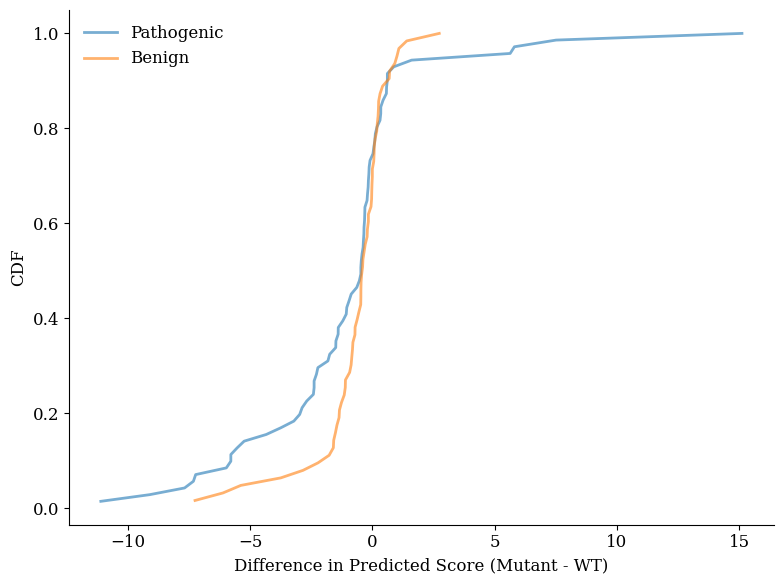

In [ ]:
pathogenic_distr = pathogenic['diff']
benign_distr = benign['diff']
uncertain_distr = uncertain['diff']

# Compute CDF for each distribution
pathogenic_sorted = np.sort(pathogenic_distr)
benign_sorted = np.sort(benign_distr)
# uncertain_sorted = np.sort(uncertain_distr)

pathogenic_cdf = np.arange(1, len(pathogenic_sorted) + 1) / len(pathogenic_sorted)
benign_cdf = np.arange(1, len(benign_sorted) + 1) / len(benign_sorted)
# uncertain_cdf = np.arange(1, len(uncertain_sorted) + 1) / len(uncertain_sorted)

# Set global font and style
plt.rcParams.update({
    'font.family': 'Serif',
    'font.size': 12
})

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(pathogenic_sorted, pathogenic_cdf, label='Pathogenic',
         color='#1f77b4', linewidth=2, alpha=0.6)
plt.plot(benign_sorted, benign_cdf, label='Benign',
         color='#ff7f0e', linewidth=2, alpha=0.6)
# Uncomment if you want to include the third class
# plt.plot(uncertain_sorted, uncertain_cdf, label='Uncertain', color='gray', linewidth=2, alpha=0.6)

# Labels and title
plt.xlabel('Difference in Predicted Score (Mutant - WT)')
plt.ylabel('CDF')
# plt.title('CDF of Pathogenic vs Benign Distributions', fontsize=14, fontweight='bold')

# Legend and axes cleanup
plt.legend(loc='upper left', frameon=False)

# Remove top and right spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Finalize and save
plt.tight_layout()
plt.savefig('/content/pathogenic_vs_benign_cdf.png', format='png', dpi=300)
plt.show()


from itertools import zip_longest

# Use zip_longest to pad shorter lists with None (will become NaN in DataFrame)
from itertools import zip_longest

zipped = list(zip_longest(pathogenic_sorted, benign_sorted, pathogenic_cdf, benign_cdf))

df = pd.DataFrame(zipped, columns=[
    "pathogenic_sorted", "benign_sorted", "pathogenic_cdf", "benign_cdf"
])

# save_path = '/content/drive/MyDrive/SMPO/Figures/Figure3'
# df.to_csv(save_path + '/pathogenic_vs_benign.csv')

In [ ]:
from scipy import stats

# Perform Kolmogorov-Smirnov test
ks_statistic, p_value = stats.ks_2samp(pathogenic_distr, benign_distr)

print(f"K-S test statistic: {ks_statistic}")
print(f"P-value: {p_value}")

print(f"Mean of probs_ala_delta: {np.mean(pathogenic_distr)}, median of probs_ala_delta: {np.median(pathogenic_distr)}")
print(f"Mean of probs_random_delta: {np.mean(benign_distr)}, , median of probs_random_delta: {np.median(benign_distr)}")

K-S test statistic: 0.21640956852224458
P-value: 0.07149646575905838
Mean of probs_ala_delta: -1.1591870265776547, median of probs_ala_delta: -0.470477033797982
Mean of probs_random_delta: -0.6901124823509656, , median of probs_random_delta: -0.3994573790638145


In [ ]:
from scipy.stats import mannwhitneyu

# Perform Mann-Whitney U test for both orders
u_stat1, p_value1 = mannwhitneyu(pathogenic_distr, benign_distr)
u_stat2, p_value2 = mannwhitneyu(benign_distr, pathogenic_distr)

# Sizes of both groups
n1 = len(pathogenic_distr)
n2 = len(benign_distr)

# Rank-biserial correlation for the first order
rank_biserial1 = (2 * u_stat1 - n1 * n2) / (n1 * (n1 + n2))

# Rank-biserial correlation for the second order (flipped)
rank_biserial2 = (2 * u_stat2 - n1 * n2) / (n1 * (n1 + n2))

# Print the correct rank-biserial correlation
print(f"Rank-biserial correlation for first order (pathogenic vs benign): {rank_biserial1}")
print(f"Rank-biserial correlation for second order (benign vs pathogenic): {rank_biserial2}")

# Determine which distribution tends to have larger values
if u_stat1 < n1 * n2 / 2:
    print("Pathogenic distribution tends to have smaller values than Benign.")
else:
    print("Pathogenic distribution tends to have larger values than Benign.")

# Interpretation of p-value
if p_value1 < 0.05:
    print("The difference is statistically significant for first order (pathogenic vs benign).")
else:
    print("No significant difference for first order.")

if p_value2 < 0.05:
    print("The difference is statistically significant for second order (benign vs pathogenic).")
else:
    print("No significant difference for second order.")


Rank-biserial correlation for first order (pathogenic vs benign): -0.0669539625814589
Rank-biserial correlation for second order (benign vs pathogenic): 0.0669539625814589
Pathogenic distribution tends to have smaller values than Benign.
No significant difference for first order.
No significant difference for second order.


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_seq_distr(seq_id, plot=False):
  # Filter the dataframe for the desired `seq_id`
  seq_id_value = seq_id  # Replace with your target seq_id
  filtered_df = clinvar_ss[clinvar_ss['seq_id'] == seq_id_value].copy()

  # Define the mutation type based on `ClinicalSignificance`
  def categorize_significance(value):
      if pd.notnull(value):
          value = value.lower()
          if 'pathogen' in value:
              return 'Pathogenic'
          elif 'benign' in value:
              return 'Benign'
          elif 'uncertain' in value:
              return 'Uncertain'
      return 'Other'

  filtered_df.loc[:, 'MutationType'] = filtered_df['ClinicalSignificance'].apply(categorize_significance)

  # Filter only benign, pathogenic, and uncertain mutations
  mutation_df = filtered_df[filtered_df['MutationType'].isin(['Pathogenic', 'Benign', 'Uncertain'])]

  # Violin Plot
  if(plot):
    plt.figure(figsize=(10, 6))
    sns.violinplot(data=mutation_df, x='MutationType', y='score', hue='MutationType', palette='Set1', inner="quartile", legend=False)
    plt.title(f'Score Distribution by Mutation Type for seq_id {seq_id_value}')
    plt.show()

for seq_id in clinvar_ss['seq_id'].unique():
  plot_seq_distr(seq_id, False)


In [ ]:
import pandas as pd

# Assuming `clinvar_ss` is your DataFrame
dfoi = pathogenic
dfoi['abs_diff'] = (dfoi['score'] - dfoi['original_score']).abs()

# Find the row with the maximum absolute difference for each seq_id
result = dfoi.loc[dfoi.groupby('seq_id')['abs_diff'].idxmax()]

# sort by abs_diff (largest first)
result = result.sort_values(by='abs_diff', ascending=False)

# Display the result
display(result)
result.to_csv("/content/annotated_clinical_variants_pathogenic_with_jxt_05152025.csv")

<ipython-input-257-3cc35f3511de>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfoi['abs_diff'] = (dfoi['score'] - dfoi['original_score']).abs()


,Unnamed: 0.1,Unnamed: 0,#AlleleID,Type,Name,GeneID,GeneSymbol,HGNC_ID,ClinicalSignificance,ClinSigSimple,...,seq_id,Sequence,Transmembrane,tm_seq,tm_seq_original,score,original_score,relative_abs_diff,diff,abs_diff
761,761,2758,446741,single nucleotide variant,NM_000206.3(IL2RG):c.846G>A (p.Trp282Ter),3561,IL2RG,HGNC:6010,Pathogenic,1,...,P31785,MLKPSLPFTSLLFLQLPLLGVGLNTTILTPNGNEDTTADFFLTTMP...,"(263, 283)",VISVGSMGLIISLLCVYF,VISVGSMGLIISLLCVYFWLERTMPRIP,20.149846,5.042966,2.995634,15.106880,15.106880
2254,2254,5016,363580,single nucleotide variant,NM_001281766.3(EPHA5):c.1748G>A (p.Gly583Glu),2044,EPHA5,HGNC:3389,Likely pathogenic,1,...,P54756,MRGSGPRGAGRRRPPSGGGDTPITPASLAGCYSAPRRAPLWTCLLL...,"(574, 594)",IAVSVTVGEILLAVVIGVLLSGSCCECG,IAVSVTVGVILLAVVIGVLLSGSCCECG,1.197569,12.296183,0.902606,-11.098613,11.098613
198,198,855,246607,single nucleotide variant,NM_000527.5(LDLR):c.2399T>A (p.Val800Asp),3949,LDLR,HGNC:6547,Conflicting interpretations of pathogenicity,0,...,P01130,MGPWGWKLRWTVALLLAAAGTAVGDRCERNEFQCQDGKCISYKWVC...,"(789, 810)",LSIVLPIVLLDFLCLGVFLLWKNWRLKNI,LSIVLPIVLLVFLCLGVFLLWKNWRLKNI,0.904645,10.001412,0.909548,-9.096767,9.096767
2043,2043,4589,1696145,single nucleotide variant,NM_001291303.3(FAT4):c.13588C>T (p.Gln4530Ter),79633,FAT4,HGNC:23109,Pathogenic,1,...,Q6V0I7,MDLAPDRATGRPWLPLHTLSVSQLLRVFWLLSLLPGQAWVHGAEPR...,"(4505, 4525)",PAIVGSCATVLALLVLSLILCNQC,PAIVGSCATVLALLVLSLILCNQCRGKK,10.394417,4.761913,1.182824,5.632504,5.632504
845,845,2903,27653,single nucleotide variant,NM_001063.4(TF):c.830G>A (p.Gly277Asp),7018,TF,HGNC:11740,Pathogenic,1,...,P13726,METPAWPRVPRPETAVARTLLLGWVFAQVAGASGTTNTVAAYNLTW...,"(252, 274)",FYIIGAVVFVVIILVIILAISLHKDRKAGV,FYIIGAVVFVVIILVIILAISLHKCRKAGV,4.765002,9.101883,0.476482,-4.336881,4.336881
597,597,2594,414172,single nucleotide variant,NM_001204.7(BMPR2):c.482T>A (p.Leu161Ter),659,BMPR2,HGNC:1078,Pathogenic,1,...,Q13873,MTSSLQRPWRVPWLPWTILLVSTAAASQNQERLCAFKDPYQQDLGI...,"(151, 171)",IIALASVSV,IIALASVSVLAVLIVALCFGYRMLTGDR,1.164483,4.906811,0.762680,-3.742328,3.742328
2127,2127,4788,1364067,single nucleotide variant,NM_005618.4(DLL1):c.1647C>A (p.Cys549Ter),28514,DLL1,HGNC:2908,Pathogenic,1,...,O00548,MGSRCALALAVLSALLCQVWSSGVFELKLQEFVNKKGLLGNRNCCR...,"(546, 568)",AV,AVCAGVILVLMLLLGCAAVVVCVRLRLQKH,2.811515,6.020924,0.533043,-3.209409,3.209409
479,479,1832,21874,single nucleotide variant,NM_203486.3(DLL3):c.1511G>A (p.Gly504Asp),10683,DLL3,HGNC:2909,Pathogenic/Likely pathogenic,1,...,Q9NYJ7,MVSPRMSGLLSQTVILALIFLPQTRPAGVFELQIHSFGPGPGPGAP...,"(493, 513)",PPALGLLVAADVAGAALLLVHVRRRGHS,PPALGLLVAAGVAGAALLLVHVRRRGHS,0.355758,3.326017,0.893038,-2.970259,2.970259
1108,1108,3241,808804,single nucleotide variant,NM_000245.4(MET):c.2802G>C (p.Leu934Phe),4233,MET,HGNC:7029,Conflicting interpretations of pathogenicity,0,...,P08581,MKAPAVLAPGILVLLFTLVQRSNGECKEALAKSEMNVNMKYQLPNF...,"(933, 955)",FIAGVVSISTALLLLLGFFLWLKKRKQIKD,LIAGVVSISTALLLLLGFFLWLKKRKQIKD,11.018755,13.890398,0.206736,-2.871644,2.871644
1540,1540,4009,860470,single nucleotide variant,NM_001942.4(DSG1):c.1684G>A (p.Gly562Arg),1828,DSG1,HGNC:3048,Conflicting interpretations of pathogenicity,1,...,Q02413,MDWSFFRVVAMLFIFLVVVEVNSEFRIQVRDYNTKNGTIKWHSIRR...,"(549, 569)",GIGLLIMGFLVLRLVPFLMICCDCGGAP,GIGLLIMGFLVLGLVPFLMICCDCGGAP,7.299876,9.710588,0.248256,-2.410712,2.410712


In [ ]:
result.iloc[10]['Sequence']

'MELAALCRWGLLLALLPPGAASTQVCTGTDMKLRLPASPETHLDMLRHLYQGCQVVQGNLELTYLPTNASLSFLQDIQEVQGYVLIAHNQVRQVPLQRLRIVRGTQLFEDNYALAVLDNGDPLNNTTPVTGASPGGLRELQLRSLTEILKGGVLIQRNPQLCYQDTILWKDIFHKNNQLALTLIDTNRSRACHPCSPMCKGSRCWGESSEDCQSLTRTVCAGGCARCKGPLPTDCCHEQCAAGCTGPKHSDCLACLHFNHSGICELHCPALVTYNTDTFESMPNPEGRYTFGASCVTACPYNYLSTDVGSCTLVCPLHNQEVTAEDGTQRCEKCSKPCARVCYGLGMEHLREVRAVTSANIQEFAGCKKIFGSLAFLPESFDGDPASNTAPLQPEQLQVFETLEEITGYLYISAWPDSLPDLSVFQNLQVIRGRILHNGAYSLTLQGLGISWLGLRSLRELGSGLALIHHNTHLCFVHTVPWDQLFRNPHQALLHTANRPEDECVGEGLACHQLCARGHCWGPGPTQCVNCSQFLRGQECVEECRVLQGLPREYVNARHCLPCHPECQPQNGSVTCFGPEADQCVACAHYKDPPFCVARCPSGVKPDLSYMPIWKFPDEEGACQPCPINCTHSCVDLDDKGCPAEQRASPLTSIISAVVGILLVVVLGVVFGILIKRRQQKIRKYTMRRLLQETELVEPLTPSGAMPNQAQMRILKETELRKVKVLGSGAFGTVYKGIWIPDGENVKIPVAIKVLRENTSPKANKEILDEAYVMAGVGSPYVSRLLGICLTSTVQLVTQLMPYGCLLDHVRENRGRLGSQDLLNWCMQIAKGMSYLEDVRLVHRDLAARNVLVKSPNHVKITDFGLARLLDIDETEYHADGGKVPIKWMALESILRRRFTHQSDVWSYGVTVWELMTFGAKPYDGIPAREIPDLLEKGERLPQPPICTIDVYMIMVKCWMIDSECRPRFRELVSEFSRMARDPQRFVVIQNEDLGPASP

## Endogenous Protease Activity

In [ ]:
import pandas as pd
JXT = 8
def extract_membrane_indices(transmembrane_string):
    # Initialize an empty list to store the indices
    indices = []

    # Iterate through the string
    splits = transmembrane_string.split('TRANSMEM')
    for split in splits:
      indices_instance = split.strip()
      indices_instance = indices_instance.split('..')
      try:
        indices_instance[1] = indices_instance[1].split(';')[0]
        indices.append(tuple(indices_instance))
      except:
        continue

    return indices

def extract_seqs(uniprot_df):
  sequences = []
  for indx, row in uniprot_df.iterrows():
    for tm_index in row['tm_indices']:
      try:
        sequences.append(row['Sequence'][int(tm_index[0]):int(tm_index[1]) + JXT])
      except:
        pass
  return sequences

uniprot_df = pd.read_csv('/content/idmapping_2024_10_07.tsv', sep='\t', on_bad_lines='skip')
uniprot_df['tm_indices'] = uniprot_df['Transmembrane'].apply(lambda x: extract_membrane_indices(x))
tm_df = pd.read_csv('/content/tm_library_annotated.tsv', sep='\t', on_bad_lines='skip')
tm_df = tm_df[tm_df['jxt'] == True]
sequences = set((extract_seqs(uniprot_df)) + (tm_df['aa_seq'].values.tolist()))


In [ ]:
# parse substrate seqs for intramembrane TMs
import re
motifs_of_interest = ['GXXXG'] #'GXGD', 'RSVLS', 'GXXXG', 'HEXXH', 'RSVLS', 'CGGX', 'CAAX', 'CVVX', 'CLLX', 'CIIX', 'CPPX']

def find_motifs(sequences, motif):
    # Convert the motif pattern, where X is any character
    motif_regex = motif.replace('X', '.')  # '.' in regex matches any character
    pattern = re.compile(motif_regex)

    result = []
    for seq in sequences:
        matches = [(m.start(), m.group()) for m in pattern.finditer(seq)]
        if matches:
            result.append((seq, matches))
    return result

def replace_randomly(string, target, replacement, num_to_replace):
    # Find all occurrences of the target substring
    occurrences = [i for i in range(len(string)) if string.startswith(target, i)]

    # Randomly sample indices to replace
    if num_to_replace > len(occurrences):
        raise ValueError("num_to_replace exceeds the number of available occurrences")

    indices_to_replace = random.sample(occurrences, num_to_replace)

    # Replace selected indices in the string
    result = list(string)
    for index in indices_to_replace:
        result[index:index+len(target)] = replacement

    return ''.join(result)

def select_random_not_in_motif(sequence, motif, roi):
    # Find all positions of the motif in the sequence
    motif_positions = [
        match.span() for match in re.finditer(motif.replace('X', '.'), sequence)
    ]

    # Create a set of all indices occupied by the motif
    motif_indices = set()
    for start, end in motif_positions:
        motif_indices.update(range(start, end))

    # Find all indices of 'G' in the sequence
    g_indices = [i for i, char in enumerate(sequence) if char == roi]

    # Filter out 'G' indices that are part of the motif
    valid_g_indices = [i for i in g_indices if i not in motif_indices]

    # If there are no valid 'G's, return None
    if not valid_g_indices:
        return None

    # Randomly choose a 'G' index from the valid ones
    return random.choice(valid_g_indices)

In [ ]:
hits = []
for motif_of_interest in motifs_of_interest:
  hits += find_motifs(sequences, motif_of_interest)

hits_to_ala_scan = {}
hits_to_random_scan = {}
count = 0
for hit in hits:

  roi = 'G'
  num_to_replace = 1

  motif = hit[1][0][1]
  len_motif = len(motif)
  mutagenesis = motif.replace(roi, 'A') if num_to_replace is None else replace_randomly(motif, roi, 'A', num_to_replace)
  insert_pos = hit[1][0][0]
  new_seq = hit[0][:insert_pos] + mutagenesis + hit[0][insert_pos+len_motif:]

  num_replacements = motif.count(roi) if num_to_replace is None else num_to_replace
  pseudo_random = select_random_not_in_motif(hit[0], motif, roi)
  if(pseudo_random is None):
    count += 1
    continue
  random_start_pos = pseudo_random if pseudo_random is not None else np.random.randint(0, len(hit[0])-num_replacements)
  random_seq = hit[0][:random_start_pos] + 'A'*num_replacements + hit[0][random_start_pos+num_replacements:]

  hits_to_ala_scan[hit[0]] = new_seq
  hits_to_random_scan[hit[0]] = random_seq

original_seqs = list(hits_to_ala_scan.keys())
new_seqs = list(hits_to_ala_scan.values())
random_seqs = list(hits_to_random_scan.values())
print("All hits: ", hits)
print(f"{count} / {len(hits)} hits do not contain a non-motif G!")

All hits:  [('PLPLIVGSSVGGLLLLALITAALYKLGFFKRQ', [(6, 'GSSVG')]), ('TLVCALGLAIGLVGFLVGTVLIIMGTYVSSV', [(6, 'GLAIG'), (13, 'GFLVG')]), ('IIDGTGSIGAALGPLLAGLISPTGWNNV', [(8, 'GAALG')]), ('YHATGWGVPVGIVAVTLAMLPHDYVAPG', [(6, 'GVPVG')]), ('RNIILMSLLHLGALYGITLIPTCKFYTW', [(11, 'GALYG')]), ('LSLAFALSAHSVFEGLALGLQEEGEKVV', [(14, 'GLALG')]), ('ALLILTPIFGLTWGLGLATLLLYCNHRNR', [(9, 'GLTWG')]), ('MGIALGGLAMGVLVGPPFGSVLYEFVGKTA', [(1, 'GIALG'), (6, 'GLAMG'), (14, 'GPPFG')]), ('VISLVGSVSGTALALIIPPLLEVTTFYS', [(5, 'GSVSG')]), ('WVYGVSGGAFLIMIFLIFTSYLVCKKPK', [(3, 'GVSGG')]), ('LFFFFSGVGSFVGSGLLALVSIKAIGWM', [(8, 'GSFVG')]), ('LAAVIAGGVIGFLFAIFLILLLVYRMRKKDEG', [(6, 'GGVIG')]), ('SFAAHIAGGFAGMSIGYTVFSCFDKALL', [(7, 'GGFAG')]), ('PFPLLLTALAALTLLGLGAGLPPPLQNP', [(15, 'GLGAG')]), ('GAAGLSTSSNILLASVGSVLGACLGNSP', [(16, 'GSVLG')]), ('ALLCMWFGISLPLVYLGYYFGFRKQPYD', [(16, 'GYYFG')]), ('LRTAGLGAGFVLTALLLWSSLGADDGVAEV', [(4, 'GLGAG'), (21, 'GADDG')]), ('CWLIVAAAWLGGSIDGFLLTPVTMQFPF', [(11, 'GSIDG')]), ('TTVGV

In [ ]:
max_length = 50
probs_wt = np.exp(linear_model(np.array(get_sequence_probs(original_seqs, model, tokenizer, max_length, device).tolist()), *params))
mask = probs_wt > 3.055293866
probs_wt = probs_wt[mask]
probs_ala_mut = np.exp(linear_model(np.array(get_sequence_probs(new_seqs, model, tokenizer, max_length, device).tolist()), *params))[mask]
probs_random_mut = np.exp(linear_model(np.array(get_sequence_probs(random_seqs, model, tokenizer, max_length, device).tolist()), *params))[mask]

probs_ala_delta = probs_ala_mut - probs_wt
probs_random_delta = probs_random_mut - probs_wt


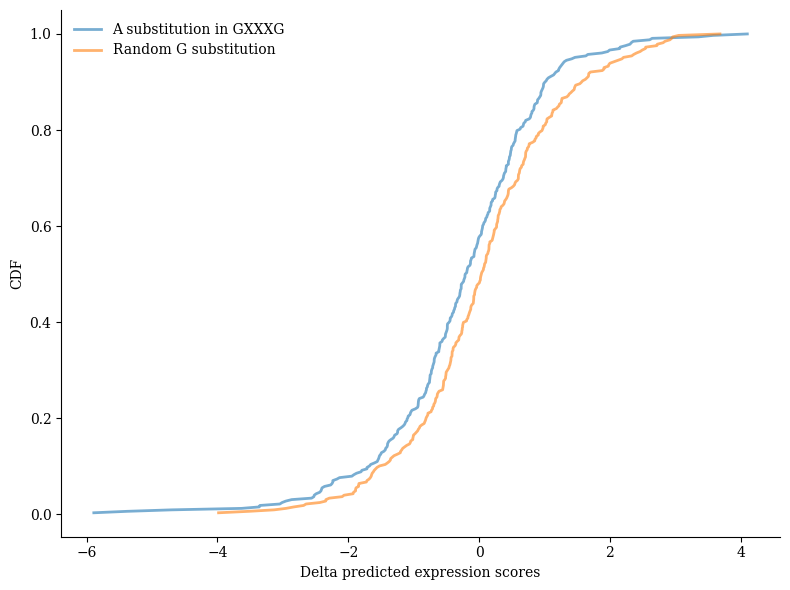

In [ ]:
# Compute CDF for each distribution
ala_sorted = np.sort(probs_ala_delta)
random_sorted = np.sort(probs_random_delta)

ala_cdf = np.arange(1, len(ala_sorted) + 1) / len(ala_sorted)
random_cdf = np.arange(1, len(random_sorted) + 1) / len(random_sorted)

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager

# Set global font to Times New Roman
plt.rcParams.update({
    'font.family': 'Serif',
})

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(ala_sorted, ala_cdf, label='A substitution in GXXXG',
         color='#1f77b4', linewidth=2, alpha=0.6)
plt.plot(random_sorted, random_cdf, label='Random G substitution',
         color='#ff7f0e', linewidth=2, alpha=0.6)

# Labels and title
plt.xlabel('Delta predicted expression scores')
plt.ylabel('CDF')
# plt.title('CDF of GXXXG vs Random Mutant Distributions', fontsize=14, fontweight='bold')

# Legend and formatting
plt.legend(loc='upper left', frameon=False)

# Match previous style (remove top/right spines)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('gxxxg_vs_random_cdf.png', format='png')
plt.show()

df = pd.DataFrame({
    "alanine_substitution_gxxxg_sorted": ala_sorted,
    "random_g_substitution_sorted": random_sorted,
    "alanine_substitution_gxxxg_cdf": ala_cdf,
    "random_g_substitution_cdf": random_cdf,
})
save_path = '/content/drive/MyDrive/SMPO/Figures/Figure3'
df.to_csv(save_path + '/gxxxg_vs_random_cdf.csv')

In [ ]:
df = pd.DataFrame({
    "wt_seq": np.array(original_seqs)[mask],
    "mut_seq": np.array(new_seqs)[mask],
    "rand_seq": np.array(random_seqs)[mask],
    "probs_mut_delta": probs_ala_delta,
    "probs_random_delta": probs_random_delta,
})
df['diff'] = df['probs_mut_delta'] - df['probs_random_delta']
df['abs_diff'] = abs(df['diff'])
df = df.sort_values(by='abs_diff', ascending=False)

display(df)
df.to_csv("/content/gxxxg_vs_random_delta.csv")

,wt_seq,mut_seq,rand_seq,probs_mut_delta,probs_random_delta,diff,abs_diff
260,GIIVGALIGSLVGAAIIISVVCFARNKA,GIIVAALIGSLVGAAIIISVVCFARNKA,GIIVGALIGSLVAAAIIISVVCFARNKA,-3.092859,2.788757,-5.881615,5.881615
140,LVIFILAVGTVAAGGYWAGLTEANRLQR,LVIFILAVGTVAAGGYWAALTEANRLQR,LVIFILAVATVAAGGYWAGLTEANRLQR,-6.641525,-1.158134,-5.483391,5.483391
197,VGIIVGVLLAIGFIGAIIVVVMRKMSGRY,VGIIVAVLLAIGFIGAIIVVVMRKMSGRY,VGIIVGVLLAIAFIGAIIVVVMRKMSGRY,-2.369724,2.795752,-5.165476,5.165476
82,GIIVGVLLAIGFIGAIIVVVMRKMSGRY,GIIVAVLLAIGFIGAIIVVVMRKMSGRY,GIIVGVLLAIGFIAAIIVVVMRKMSGRY,-2.793280,2.126397,-4.919678,4.919678
45,MLVIFILAVGTVAAGGYWAGLTEANRLQR,MLVIFILAVGTVAAGGYWAALTEANRLQR,MLVIFILAVATVAAGGYWAGLTEANRLQR,-5.391937,-1.008480,-4.383457,4.383457
...,...,...,...,...,...,...,...
19,ILITIIAMSSLGVLLGATCAGLLLYCTCSYSGL,ILITIIAMSSLAVLLGATCAGLLLYCTCSYSGL,ILITIIAMSSLGVLLGATCAGLLLYCTCSYSAL,0.472512,0.456905,0.015608,0.015608
118,VGAVLAAGALLGLVAGALYLRARGKPMG,VGAVLAAGALLALVAGALYLRARGKPMG,VGAVLAAGALLGLVAAALYLRARGKPMG,-0.076799,-0.087850,0.011050,0.011050
98,ALPVGLIVGVTALGLLIIGVVNCVIMTQVKKKPLCLQ,ALPVALIVGVTALGLLIIGVVNCVIMTQVKKKPLCLQ,ALPVGLIVGVTALGLLIIAVVNCVIMTQVKKKPLCLQ,-0.294407,-0.299580,0.005173,0.005173
314,IAGIVIGVVALVALIAVALACFLHFGKTGRA,IAGIVIAVVALVALIAVALACFLHFGKTGRA,IAGIVIGVVALVALIAVALACFLHFAKTGRA,-1.170842,-1.166817,-0.004025,0.004025


In [ ]:
from scipy import stats

# Perform Kolmogorov-Smirnov test
ks_statistic, p_value = stats.ks_2samp(probs_ala_delta, probs_random_delta, )

print(f"K-S test statistic: {ks_statistic}")
print(f"P-value: {p_value}")

print(f"Mean of probs_ala_delta: {np.mean(probs_ala_delta)}, median of probs_ala_delta: {np.median(probs_ala_delta)}")
print(f"Mean of probs_random_delta: {np.mean(probs_random_delta)}, , median of probs_random_delta: {np.median(probs_random_delta)}")

K-S test statistic: 0.13190184049079753
P-value: 0.006830022394847317
Mean of probs_ala_delta: -0.3152264504956581, median of probs_ala_delta: -0.2065928074710719
Mean of probs_random_delta: 0.041105051740824974, , median of probs_random_delta: 0.0316565705319336


In [ ]:
## cutsite introduction
with_cutsite_seqs = []
original_seqs = []
for hit in hits:
  original_seq = hit[0]
  cutsite_pos = hit[1][0][0]
  with_cutsite = original_seq[:cutsite_pos+3] + 'G' + original_seq[cutsite_pos+4:]
  with_cutsite_seqs.append(with_cutsite)
  original_seqs.append(original_seq)

cutsite_scores = linear_model(np.array(get_sequence_probs(with_cutsite_seqs, model, tokenizer, max_length, device).tolist()), *params)
original_scores = linear_model(np.array(get_sequence_probs(original_seqs, model, tokenizer, max_length, device).tolist()), *params)

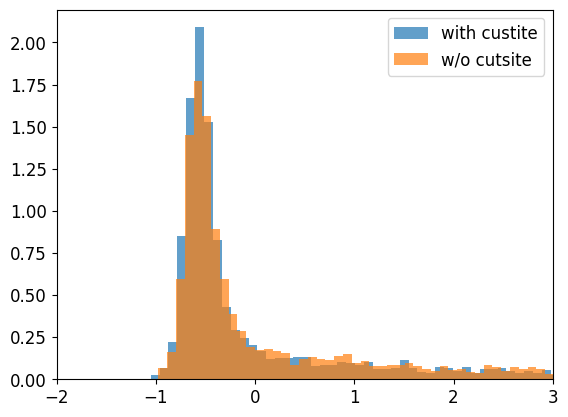

K-S test statistic: 0.06666666666666667
P-value: 6.263997438122077e-06
Mean of cut-site scores: -0.08463887373124122, median of cut-site scores: -0.48615088041296683
Mean of original scores: 0.018315225050823277, median of original scores: -0.4431941063641873


In [ ]:
from scipy import stats

# plot distribution
plt.hist(cutsite_scores, bins=50, label='with custite', alpha=0.7, density=True)
plt.hist(original_scores, bins=50, label='w/o cutsite', alpha=0.7, density=True)
plt.xlim(-2, 3)  # Replace with appropriate values based on your data
plt.legend()
plt.show()

# Perform Kolmogorov-Smirnov test
ks_statistic, p_value = stats.ks_2samp(cutsite_scores, original_scores, )

print(f"K-S test statistic: {ks_statistic}")
print(f"P-value: {p_value}")

print(f"Mean of cut-site scores: {np.mean(cutsite_scores)}, median of cut-site scores: {np.median(cutsite_scores)}")
print(f"Mean of original scores: {np.mean(original_scores)}, median of original scores: {np.median(original_scores)}")

## Attention inspection


In [ ]:
def get_embedding(sequences, max_length=40):

  tokens = tokenizer(sequences, padding="max_length", max_length=max_length, truncation=True, return_tensors="pt").to(device)
  input_ids = tokens["input_ids"]
  attention_mask = tokens["attention_mask"]
  embeddings = model.esm.embeddings(input_ids, attention_mask)
  #print(embeddings.shape)

  return embeddings

def get_param_by_name(model, param_name):
    for name, param in model.named_parameters():
        if name == param_name:
            return param
    print(f"Error fetching param: {param_name}")
    return None  # If the parameter name is not found

def compute_attention(model, x):
  layers = model_size[0]
  attention_sum = None
  for layer_indx in range(layers):
    attention = model.esm.encoder.layer[layer_indx].attention(x)
    attention_sum = attention[0] if attention_sum is None else attention_sum + attention[0]
    return attention[0]/layers



# out = get_param_by_name(model, "esm.encoder.layer.0.attention.self.original_layer.weight")
# print(out)

In [ ]:
# sequence = 'GLGDFIFYSVLVGKASATAS'
import matplotlib.pyplot as plt
import numpy as np

def plot_attention(attention_heatmap):
  # Plot the heatmap
  plt.figure(figsize=(12, 8))
  plt.imshow(attention_heatmap, aspect='auto', cmap='viridis')

  # Add color bar
  plt.colorbar()

  # Add labels and title
  plt.xlabel('Token positions')
  plt.ylabel('Attention value')
  plt.title('Heatmap of Token Attentions')

  # Display the plot
  plt.show()

def get_relative_attention_scores(sequence, indexes=None, ignore_padding=True):
  embedding = get_embedding([sequence])
  attention = compute_attention(model, embedding)
  if(ignore_padding):
    attention_heatmap = attention[:, 0:len(sequence), :]
  else:
    attention_heatmap = attention
  attention_heatmap = torch.sum(attention_heatmap, dim=2).detach().cpu()

  if(indexes):
    ln = len(indexes[1])
    avg_for_cutsite = np.average((attention_heatmap[:, indexes[0]:indexes[0]+ln]))
    avg_overall = np.average(attention_heatmap)
    return avg_for_cutsite, avg_overall
  else:
    return attention_heatmap


In [ ]:
cutsite_averages = []
overall_averages = []
for hit in hits:
  sequence = hit[0]
  indexes = hit[1][0]
  avg_for_cutsite, avg_overall = get_relative_attention_scores(sequence, indexes)
  cutsite_averages.append(avg_for_cutsite)
  overall_averages.append(avg_overall)


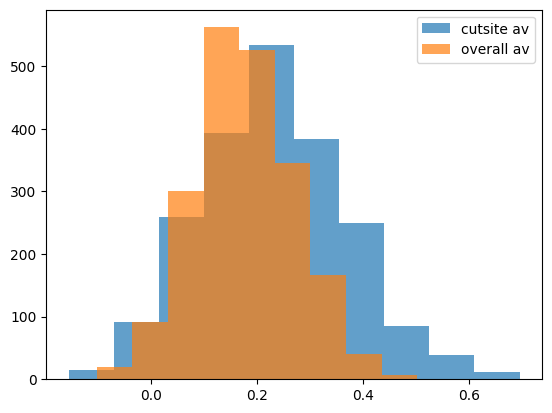

In [ ]:
plt.hist(cutsite_averages, label='cutsite av', alpha=0.7)
plt.hist(overall_averages, label='overall av', alpha=0.7)
plt.legend()
plt.show()

In [ ]:
from scipy import stats

# Perform Kolmogorov-Smirnov test
ks_statistic, p_value = stats.ks_2samp(cutsite_averages, overall_averages, )

print(f"K-S test statistic: {ks_statistic}")
print(f"P-value: {p_value}")

print(f"Mean of probs_ala_delta: {np.mean(cutsite_averages)}, median of probs_ala_delta: {np.median(cutsite_averages)}")
print(f"Mean of probs_random_delta: {np.mean(overall_averages)}, , median of probs_random_delta: {np.median(overall_averages)}")

K-S test statistic: 0.21699029126213593
P-value: 7.084337100767199e-43
Mean of probs_ala_delta: 0.23170801997184753, median of probs_ala_delta: 0.22690638899803162
Mean of probs_random_delta: 0.17720721662044525, , median of probs_random_delta: 0.1713344305753708


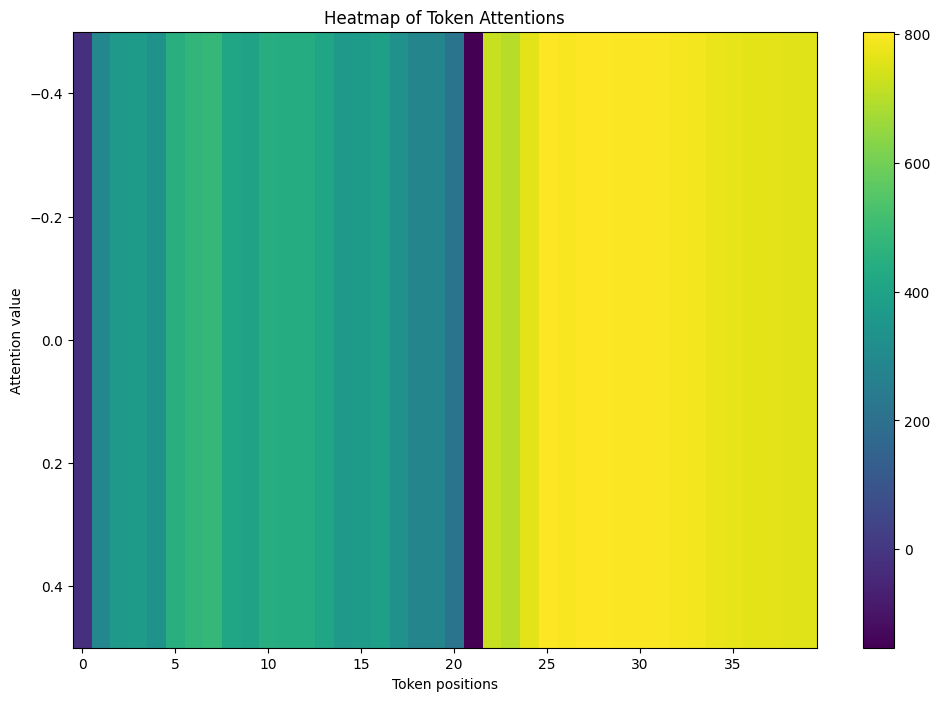

In [ ]:
heat_map_sum = None
for hit in hits:
  sequence = hit[0]
  indexes = hit[1][0]
  heat_map = get_relative_attention_scores(sequence, None, False)
  heat_map_sum = heat_map if heat_map_sum is None else heat_map_sum + heat_map

plot_attention(heat_map_sum)


## Deep Mutational Scanning for CD3 TM

In [ ]:
# Function to generate all single amino acid variants
def generate_variants(sequence, amino_acids):
    variants = []

    # Substitutions: Replace each amino acid with another one
    for i, original_aa in enumerate(sequence):
        for aa in amino_acids:
            if aa != original_aa:  # Avoid substituting with the same amino acid
                variant = sequence[:i] + aa + sequence[i + 1:]
                variants.append(("substitution", i, original_aa, aa, variant))

    # Insertions: Insert each amino acid at every position
    # for i in range(len(sequence) + 1):  # Include one extra position for appending
    #     for aa in amino_acids:
    #         variant = sequence[:i] + aa + sequence[i:]
    #         variants.append(("insertion", i, "-", aa, variant))

    # # Deletions: Remove each amino acid one at a time
    # for i, original_aa in enumerate(sequence):
    #     variant = sequence[:i] + sequence[i + 1:]
    #     variants.append(("deletion", i, original_aa, "-", variant))

    return variants

In [ ]:
#
amino_acids = "ACDEFGHIKLMNPQRSTVWY"
cart_tm_seq_jxt = "VMSVATIVIVDICITGGLLLLVYYWS" + "KNRKAKAK"
# cd3d GIIVTDVIATLLLALGVFCFA + GHETGRLS
# cd3g GFLFAEIVSIFVLAVGVYFIA + GQDGVRQS
# cd3z LCYLLDGILFIYGVILTALFL + RVKFSRSA
# cd3e VMSVATIVIVDICITGGLLLLVYYWS + KNRKAKAK
# Generate variants
variants = generate_variants(cart_tm_seq_jxt, amino_acids)

# Print the total number of variants and a few examples
print(f"Total variants generated: {len(variants)}")
print("Example variants:")
for variant in variants[:5]:  # Show a few examples
    print(variant)

seqs = [variant[4] for variant in variants]
scores = np.exp(linear_model(np.array(get_sequence_probs(seqs, model, tokenizer, max_length, device).tolist()), *params))
scores_diff = scores - np.exp(linear_model(np.array(get_sequence_probs([cart_tm_seq_jxt], model, tokenizer, max_length, device).tolist()), *params))

Total variants generated: 646
Example variants:
('substitution', 0, 'V', 'A', 'AMSVATIVIVDICITGGLLLLVYYWSKNRKAKAK')
('substitution', 0, 'V', 'C', 'CMSVATIVIVDICITGGLLLLVYYWSKNRKAKAK')
('substitution', 0, 'V', 'D', 'DMSVATIVIVDICITGGLLLLVYYWSKNRKAKAK')
('substitution', 0, 'V', 'E', 'EMSVATIVIVDICITGGLLLLVYYWSKNRKAKAK')
('substitution', 0, 'V', 'F', 'FMSVATIVIVDICITGGLLLLVYYWSKNRKAKAK')


In [ ]:
# make df of sequence, substitution information, and score diff, sort by scores diff

pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Adjust width to avoid truncation
pd.set_option('display.max_colwidth', None)  # Avoid truncating column content

df = pd.DataFrame(variants, columns=["Operation", "Position", "Original", "New", "Sequence"])
df["Score Difference"] = scores_diff
df = df.sort_values(by="Score Difference", ascending=False)
df = df.reset_index(drop=True)
display(df)
df.to_csv("/content/cd3e_tm_variants_with_jxt.csv")

,Operation,Position,Original,New,Sequence,Score Difference
0,substitution,10,D,V,VMSVATIVIVVICITGGLLLLVYYWSKNRKAKAK,3.432143
1,substitution,10,D,C,VMSVATIVIVCICITGGLLLLVYYWSKNRKAKAK,3.024261
2,substitution,10,D,S,VMSVATIVIVSICITGGLLLLVYYWSKNRKAKAK,3.001736
3,substitution,10,D,I,VMSVATIVIVIICITGGLLLLVYYWSKNRKAKAK,2.987873
4,substitution,10,D,A,VMSVATIVIVAICITGGLLLLVYYWSKNRKAKAK,2.951382
5,substitution,10,D,G,VMSVATIVIVGICITGGLLLLVYYWSKNRKAKAK,2.740604
6,substitution,10,D,P,VMSVATIVIVPICITGGLLLLVYYWSKNRKAKAK,2.735426
7,substitution,10,D,L,VMSVATIVIVLICITGGLLLLVYYWSKNRKAKAK,2.664903
8,substitution,10,D,T,VMSVATIVIVTICITGGLLLLVYYWSKNRKAKAK,2.632391
9,substitution,10,D,M,VMSVATIVIVMICITGGLLLLVYYWSKNRKAKAK,2.451841


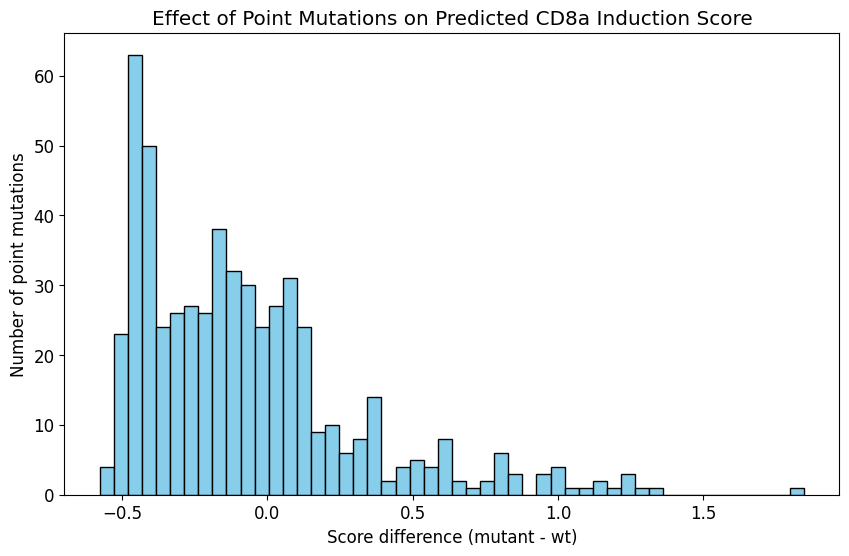

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# plotting
path = '/content/cd8a_tm_variants_with_jxt'
df = pd.read_csv(path+'.csv')

# plot histogram of 'Score Differnece' with labeled axis
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(10, 6))
plt.hist(df['Score Difference'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Score difference (mutant - wt)')
plt.ylabel('Number of point mutations')
plt.title('Effect of Point Mutations on Predicted CD8a Induction Score')

# save as svg, png, and eps
plt.savefig(path+'.svg', format='svg')
plt.savefig(path+'.png', format='png')
plt.savefig(path+'.eps', format='eps')

plt.show()

## Library Preparation


In [ ]:
## Prep library
!pip install -U dnachisel biopython python_codon_tables

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.8/146.8 kB 6.3 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=ee68044e8d5978b817daf52f6ac333beb90233818b2d799ef3d018986a696286
  Stored in directory: /root/.cache/pip/wheels/1a/b0/8c/4b75c4116c31f83c8f9f047231251e13cc74481cca4a78a9ce
Successfully built docopt


In [ ]:
import itertools as it
import pandas as pd

from Bio.Seq import Seq
from Bio.Data import CodonTable

import python_codon_tables as pct
from dnachisel import *

# PRINT THE LIST OF NAMES OF ALL AVAILABLE TABLES
codon_usage = pct.get_codons_table("h_sapiens_9606")
codon_usage_values = {k: v for d in codon_usage.values() for k, v in d.items()}
codon_usage_synonymous = {k:list(v.keys()) for k,v in codon_usage.items()}

In [ ]:

def back_translate_to_dna(aa_sequence: str) -> list:

    back_translation_code = {
        'A': ['GCT'],  # Alanine
        'C': ['TGC'],  # Cysteine
        'D': ['GAT'],  # Aspartic Acid
        'E': ['GAA'],  # Glutamic Acid
        'F': ['TTC'],  # Phenylalanine
        'G': ['GGC'],  # Glycine
        'H': ['CAC'],  # Histidine
        'I': ['ATC'],  # Isoleucine
        'K': ['AAA'],  # Lysine
        'L': ['CTG'],  # Leucine
        'M': ['ATG'],  # Methionine (start codon)
        'N': ['AAT'],  # Asparagine
        'P': ['CCG'],  # Proline
        'Q': ['CAG'],  # Glutamine
        'R': ['CGT'],  # Arginine
        'S': ['AGC'],  # Serine
        'T': ['ACC'],  # Threonine
        'V': ['GTG'],  # Valine
        'W': ['TGG'],  # Tryptophan
        'Y': ['TAC'],  # Tyrosine
        'X': ['TGA'],
        '*': ['TAA']   # Stop codon
    }
    list_of_codons = []
    try:
      list_of_codons = [back_translation_code[aa][0] for aa in aa_sequence]
    except Exception as e:
      print(e)
    dna_string = ''.join(list_of_codons)

    return dna_string

def backtranslate_with_snp(original_aa_seq, backtranslated_mutant_seq):
    # Function to get the most similar codon
    def get_closest_codon(target_codon, candidate_codons):
        min_distance = float("inf")
        closest_codon = 'TCG' # stop codon, init
        for codon in candidate_codons:
            # Compute the Hamming distance (number of base-pair changes)
            distance = sum(1 for a, b in zip(target_codon, codon) if a != b)
            if distance < min_distance or (distance == min_distance and codon_usage_values[codon] > codon_usage_values[closest_codon]):
                min_distance = distance
                closest_codon = codon
        return closest_codon

    # Backtranslate the original amino acid sequence
    backtranslated_original_seq = []
    for aa, mutant_codon in zip(original_aa_seq, [backtranslated_mutant_seq[i:i+3] for i in range(0, len(backtranslated_mutant_seq), 3)]):
        candidate_codons = codon_usage_synonymous[aa]
        if not candidate_codons:
            raise ValueError(f"No codons found for amino acid '{aa}'.")
        closest_codon = get_closest_codon(mutant_codon, candidate_codons)
        backtranslated_original_seq.append(closest_codon)

    return "".join(backtranslated_original_seq)


In [ ]:
from dnachisel import *

def optimize_dna(dna):
# DEFINE THE OPTIMIZATION PROBLEM

  some_sequence = dna
  problem = DnaOptimizationProblem(
      sequence=some_sequence,
      constraints=[
          AvoidPattern("BsmBI_site"),
          EnforceGCContent(mini=0.25, maxi=0.65, window=50), # 0.25, 0.65, and 50 OR 0.3, 0.7, and 30
          EnforceTranslation()
      ],
      objectives=[CodonOptimize(species='h_sapiens')],
      logger=None
  )

  # SOLVE THE CONSTRAINTS, OPTIMIZE WITH RESPECT TO THE OBJECTIVE

  problem.resolve_constraints()
  problem.optimize()

  # PRINT SUMMARIES TO CHECK THAT CONSTRAINTS PASS

  # print(problem.constraints_text_summary())
  # print(problem.objectives_text_summary())

  # get final seq
  return problem.sequence

def backtranslate_and_optimize(aa_seq):
  dna = back_translate_to_dna(aa_seq)
  return optimize_dna(dna)

In [ ]:
unique_handles = pd.read_csv('duplex_library.csv')
unique_handles.head()

,TTTCCCGGTTCGCCGG
0,TCGTCCGGTCGCCCGG
1,CGGTTCGGCGGTCCGG
2,GTTTCTGCGTTTCTTC
3,CGTTCTGTCGTTCTGC
4,TTCTTGCGTTCTTTCG


In [ ]:
import pandas as pd

clinvar_library = pd.read_csv('/content/clinvar_library_without_dna_raw.csv')
handle_indx = 0

# Create a new DataFrame to store the updated rows
new_rows = []

for indx, row in clinvar_library.iterrows():
    # Update the DNA Sequence
    dna_sequence = backtranslate_and_optimize(row['AA Sequence'])
    clinvar_library.at[indx, 'DNA Sequence'] = dna_sequence

    # Prepare the new row
    new_row = row.copy()
    new_row['DNA Sequence'] = backtranslate_with_snp(row['TM Seq Original'], dna_sequence)
    new_row['AA Sequence'] = row['TM Seq Original']
    handle = unique_handles.iloc[handle_indx][0]
    new_row['FWD Unique Barcode (55C)'] = handle

    # Append the new row to the list
    new_rows.append((indx + 1, new_row))  # Store the new index

    handle_indx += 1

# add new_rows to end of dataset
clinvar_library = pd.concat([clinvar_library, pd.DataFrame([row for indx, row in new_rows])])
clinvar_library = clinvar_library.reset_index(drop=True)

# Save the updated DataFrame if needed
# remove Unnamed:0
clinvar_library = clinvar_library.drop(columns=['Unnamed: 0'])
clinvar_library.to_csv('/content/updated_clinvar_library.csv')
clinvar_library.head()


<ipython-input-32-e5bd25c640b3>:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'ATCGCTGTGAGCGTGACCGTGGGCGAAATCCTGCTGGCTGTGGTGATTGGCGTGCTGCTGTCTGGCAGCTGCTGCGAATGCGGC' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  clinvar_library.at[indx, 'DNA Sequence'] = dna_sequence
<ipython-input-32-e5bd25c640b3>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  handle = unique_handles.iloc[handle_indx][0]


,Seq ID,Gene Symbol,TM Seq Original,AA Sequence,Front Adaptor (Same as TM Library - 55C),Front Handle (ESp3I Cut Site,GS Linker,DNA Sequence,Back Handle (Esp3I Cut Site),FWD Unique Barcode (55C),Back Adaptor (same as TM)
0,P54756,EPHA5,IAVSVTVGVILLAVVIGVLLSGSCCECG,IAVSVTVGEILLAVVIGVLLSGSCCECG,GGTTGTGACGAATCGTGCG,CGTCTCG,GGCGGCAGCGGCAGCGGCGGCAGCGGCAGC,ATCGCTGTGAGCGTGACCGTGGGCGAAATCCTGCTGGCTGTGGTGA...,TCTGGGAGACG,GGCGGCTACGCCTAC,CGGCGATCACGTATggaGG
1,P01130,LDLR,LSIVLPIVLLVFLCLGVFLLWKNWRLKNI,LSIVLPIVLLVFLCLEVFLLWKNWRLKNI,GGTTGTGACGAATCGTGCG,CGTCTCG,GGCGGCAGCGGCAGCGGCGGCAGCGGCAGC,CTGAGCATCGTGCTGCCCATCGTGCTGCTGGTGTTCCTGTGCCTGG...,TCTGGGAGACG,TACAGCCACGTGCCC,CGGCGATCACGTATggaGG
2,P31785,IL2RG,VISVGSMGLIISLLCVYFWLERTMPRIP,VISVGSMGLIISLLCVYF,GGTTGTGACGAATCGTGCG,CGTCTCG,GGCGGCAGCGGCAGCGGCGGCAGCGGCAGC,GTGATCAGCGTGGGCAGCATGGGCCTGATCATCAGCCTGCTGTGCG...,TCTGGGAGACG,AAGCCCCCCACCTAC,CGGCGATCACGTATggaGG
3,Q02413,DSG1,GIGLLIMGFLVLGLVPFLMICCDCGGAP,GIGLLIMGFLVLRLVPFLMICCDCGGAP,GGTTGTGACGAATCGTGCG,CGTCTCG,GGCGGCAGCGGCAGCGGCGGCAGCGGCAGC,GGCATCGGCCTGCTGATCATGGGCTTCCTGGTGCTGAGGCTGGTGC...,TCTGGGAGACG,AGCACCCCCGCCGTG,CGGCGATCACGTATggaGG
4,P13726,TF,FYIIGAVVFVVIILVIILAISLHKCRKAGV,FYIIGAVVFVVIILVIILAISLHKDRKAGV,GGTTGTGACGAATCGTGCG,CGTCTCG,GGCGGCAGCGGCAGCGGCGGCAGCGGCAGC,TTCTACATCATCGGCGCCGTGGTGTTCGTGGTGATCATCCTGGTGA...,TCTGGGAGACG,TTCCTGGGCTACGCC,CGGCGATCACGTATggaGG


In [ ]:
# Example input
def count_unequal_characters(str1, str2):
    count = 0
    for char1, char2 in zip(str1, str2):
        if char1 != char2:
            count += 1
    return count

original_aa_seq = "PAIVGSCATVLALLVLSLILCNQCRGKK"
backtranslated_mutant_seq = "CCCGCTATTGTGGGCAGCTGCGCTACCGTGCTGGCTCTGCTGGTGTTGAGCCTGATCCTGTGCAACCAGTGCTGAGGCAAGAAG"#back_translate_to_dna(mutant_aa_seq)
# print("Backtranslated Mutant Sequence:", backtranslated_mutant_seq)
# Backtranslate the original amino acid sequence
backtranslated_original_seq = backtranslate_with_snp(original_aa_seq, backtranslated_mutant_seq)
print("Backtranslated Original Sequence:", backtranslated_original_seq)
print("Number of unequal characters:", count_unequal_characters(backtranslated_mutant_seq, backtranslated_original_seq))

Backtranslated Original Sequence: CCCGCTATTGTGGGCAGCTGCGCTACCGTGCTGGCTCTGCTGGTGTTGAGCCTGATCCTGTGCAACCAGTGCAGAGGCAAGAAG
Number of unequal characters: 1


## Library Analysis

In [ ]:
!pip install Bio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.0/281.0 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 39.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 4.0 MB/s eta 0:00:00


In [ ]:
import os
import zipfile
import re
import json
from io import StringIO
import re
import pandas as pd
import numpy as np
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
from tqdm import tqdm
import pandas as pd
import numpy as np

def process_seq_files(zip_path):
    """
    Extract and process .seq files from a zip archive.

    Args:
        zip_path (str): Path to the zip file containing .seq files

    Returns:
        dict: Dictionary with filenames as keys and their metadata+sequence as values
    """
    # Dictionary to store results
    seq_data = {}

    # Check if zip file exists
    if not os.path.exists(zip_path):
        raise FileNotFoundError(f"Zip file not found: {zip_path}")

    # Open and process the zip file
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        # Get list of all .seq files in the zip
        seq_files = [f for f in zip_ref.namelist() if f.lower().endswith('.seq')]

        if not seq_files:
            print("No .seq files found in the zip archive.")
            return {}

        print("Processing seq files")  # Print a message instead of including it in the loop

        # Process each .seq file
        for seq_file in seq_files:  # Remove the comma and string here
            # Extract the file content
            content = zip_ref.read(seq_file).decode('utf-8', errors='ignore')

            # Parse the metadata and sequence
            metadata, sequence = parse_seq_content(content)

            # Store in the dictionary using the filename (without path) as key
            filename = os.path.basename(seq_file)
            seq_data[filename] = {
                "metadata": metadata,
                "sequence": sequence
            }

    return seq_data

def parse_seq_content(content):
    """
    Parse the content of a .seq file to extract metadata and sequence.

    Args:
        content (str): Content of the .seq file

    Returns:
        tuple: (metadata_dict, sequence_string)
    """
    # Split the content into lines
    lines = content.strip().split('\n')

    metadata = {}
    sequence_lines = []
    in_sequence = False

    # Process each line
    for line in lines:
        line = line.strip()

        # Skip empty lines
        if not line:
            continue

        # Check if we've reached the sequence part
        if line.startswith('>'):
            in_sequence = True
            # The header line might contain important metadata
            metadata['header'] = line[1:].strip()
            continue

        if in_sequence:
            # Collect sequence lines (removing spaces if present)
            sequence_lines.append(line.replace(' ', ''))
        else:
            # Try to parse metadata lines (typically key:value format)
            match = re.match(r'^([^:]+):\s*(.+)$', line)
            if match:
                key, value = match.groups()
                metadata[key.strip()] = value.strip()
            else:
                # If not in standard format, store as misc_data
                if 'misc_data' not in metadata:
                    metadata['misc_data'] = []
                metadata['misc_data'].append(line)

    # Join all sequence lines
    sequence = ''.join(sequence_lines)

    return metadata, sequence

def save_results(seq_data, output_path=None):
    """
    Save the processed data to a JSON file or return as string.

    Args:
        seq_data (dict): Dictionary with sequence data
        output_path (str, optional): Path to save the JSON file

    Returns:
        str: JSON string if output_path is None
    """
    if output_path:
        with open(output_path, 'w') as f:
            json.dump(seq_data, f, indent=2)
        return f"Results saved to {output_path}"
    else:
        return json.dumps(seq_data, indent=2)

def extract_skcv_number(file_name):
    """
    Extract the SKCV number (e.g., 'skcv_87') from a filename.

    Args:
        file_name (str): The filename to search within

    Returns:
        str: The extracted SKCV number or None if not found
    """
    # Case-insensitive pattern to match 'skcv_' followed by one or more digits
    pattern = r'[Ss][Kk][Cc][Vv]_\d+'

    # Search for the pattern in the file name
    match = re.search(pattern, file_name)

    # Return the matched string or None if not found
    return match.group(0) if match else None

def reverse_complement(dna_sequence: str) -> str:
    """Returns the reverse complement of a given DNA sequence."""
    complement = {'A': 'T', 'T': 'A', 'C': 'G', 'G': 'C'}
    return ''.join(complement[base] for base in reversed(dna_sequence.upper()))

def find_all_matches(df, seq_dict, sequence_col='sequence'):
    """
    Find all exact substring matches between dataframe sequences and dictionary sequences.
    This creates a new dataframe with one row per match, allowing multiple matches.

    Args:
        df (pd.DataFrame): DataFrame containing sequence data
        seq_dict (dict): Dictionary with sequence IDs as keys and sequences as values
        sequence_col (str): Name of the column in df containing sequences

    Returns:
        pd.DataFrame: New dataframe with all matches (one per row)
    """
    all_matches = []

    # Process each row in the dataframe
    for _, row in df.iterrows():
        seq = row[sequence_col].upper()
        seq = reverse_complement(seq)
        row_matches = []

        # Search in each dictionary sequence
        for seq_id, dict_seq in seq_dict.items():

            # Find all occurrences of seq in dict_seq
            start = 0
            while True:
                # Find the next occurrence
                pos = dict_seq.find(seq, start)
                if pos == -1:  # No more occurrences
                    break

                # Store match information
                match_info = row.to_dict()
                match_info['dict_seq_id'] = seq_id
                match_info['match_start'] = pos
                match_info['match_end'] = pos + len(seq)
                row_matches.append(match_info)

                # Move past this occurrence
                start = pos + 1

        # Add all matches for this row to the results
        all_matches.extend(row_matches)

    # Create a DataFrame from all matches
    if all_matches:
        return pd.DataFrame(all_matches)
    else:
        # Return empty dataframe with appropriate columns
        columns = list(df.columns) + ['dict_seq_id', 'match_start', 'match_end']
        return pd.DataFrame(columns=columns)


/usr/local/lib/python3.11/dist-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [ ]:
seq_data = process_seq_files('/content/XG_876024_zipfile-2.zip')
clinvar_lib = pd.read_csv('/content/clinvar_library_with_dna_01232025.csv')
display(clinvar_lib)

Processing seq files


,Unnamed: 0,Seq ID,Gene Symbol,TM Seq Original,AA Sequence,Front Adaptor (Same as TM Library - 55C),Front Handle (ESp3I Cut Site,GS Linker,DNA Sequence,Back Handle (Esp3I Cut Site),FWD Unique Barcode (55C),Back Adaptor (same as TM),dna_sequence,length
0,sk001,P54756,EPHA5,IAVSVTVGVILLAVVIGVLLSGSCCECG,IAVSVTVGEILLAVVIGVLLSGSCCECG,GGTTGTGACGAATCGTGCG,CGTCTCG,GGCGGCAGCGGCAGCGGCGGCAGCGGCAGC,ATCGCTGTGAGCGTGACCGTGGGCGAAATCCTGCTGGCTGTGGTGA...,TCTGGGAGACG,GGCGGCTACGCCTAC,CGGCGATCACGTATGGAGG,GGTTGTGACGAATCGTGCGCGTCTCGGGCGGCAGCGGCAGCGGCGG...,185
1,sk002,P01130,LDLR,LSIVLPIVLLVFLCLGVFLLWKNWRLKNI,LSIVLPIVLLVFLCLEVFLLWKNWRLKNI,GGTTGTGACGAATCGTGCG,CGTCTCG,GGCGGCAGCGGCAGCGGCGGCAGCGGCAGC,CTGAGCATCGTGCTGCCCATCGTGCTGCTGGTGTTCCTGTGCCTGG...,TCTGGGAGACG,TACAGCCACGTGCCC,CGGCGATCACGTATGGAGG,GGTTGTGACGAATCGTGCGCGTCTCGGGCGGCAGCGGCAGCGGCGG...,188
2,sk003,P31785,IL2RG,VISVGSMGLIISLLCVYFWLERTMPRIP,VISVGSMGLIISLLCVYF,GGTTGTGACGAATCGTGCG,CGTCTCG,GGCGGCAGCGGCAGCGGCGGCAGCGGCAGC,GTGATCAGCGTGGGCAGCATGGGCCTGATCATCAGCCTGCTGTGCG...,TCTGGGAGACG,AAGCCCCCCACCTAC,CGGCGATCACGTATGGAGG,GGTTGTGACGAATCGTGCGCGTCTCGGGCGGCAGCGGCAGCGGCGG...,155
3,sk004,Q02413,DSG1,GIGLLIMGFLVLGLVPFLMICCDCGGAP,GIGLLIMGFLVLRLVPFLMICCDCGGAP,GGTTGTGACGAATCGTGCG,CGTCTCG,GGCGGCAGCGGCAGCGGCGGCAGCGGCAGC,GGCATCGGCCTGCTGATCATGGGCTTCCTGGTGCTGAGGCTGGTGC...,TCTGGGAGACG,AGCACCCCCGCCGTG,CGGCGATCACGTATGGAGG,GGTTGTGACGAATCGTGCGCGTCTCGGGCGGCAGCGGCAGCGGCGG...,185
4,sk005,P13726,TF,FYIIGAVVFVVIILVIILAISLHKCRKAGV,FYIIGAVVFVVIILVIILAISLHKDRKAGV,GGTTGTGACGAATCGTGCG,CGTCTCG,GGCGGCAGCGGCAGCGGCGGCAGCGGCAGC,TTCTACATCATCGGCGCCGTGGTGTTCGTGGTGATCATCCTGGTGA...,TCTGGGAGACG,TTCCTGGGCTACGCC,CGGCGATCACGTATGGAGG,GGTTGTGACGAATCGTGCGCGTCTCGGGCGGCAGCGGCAGCGGCGG...,191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,sk096,GXXXG001og,GXXXG,SSIMSNPLLGLVIGVLVTVLVQSSSTST,SSIMSNPLLGLVIGVLVTVLVQSSSTST,GGTTGTGACGAATCGTGCG,CGTCTCG,GGCGGCAGCGGCAGCGGCGGCAGCGGCAGC,AGCAGCATCATGAGCAACCCCCTGCTGGGTTTGGTGATTGGCGTGC...,TCTGGGAGACG,CCTATTTACCTATTAA,AAGTGAGCAGCCTAGACGG,GGTTGTGACGAATCGTGCGCGTCTCGGGCGGCAGCGGCAGCGGCGG...,186
96,sk097,GXXXG002og,GXXXG,VVLSNPVAGLVIGVLVTALVQSSSTSSS,VVLSNPVAGLVIGVLVTALVQSSSTSSS,GGTTGTGACGAATCGTGCG,CGTCTCG,GGCGGCAGCGGCAGCGGCGGCAGCGGCAGC,GTGGTGCTGAGCAACCCTGTGGCTGGCCTGGTGATTGGTGTGCTGG...,TCTGGGAGACG,GACCAGTGTACCAGTG,AAGTGAGCAGCCTAGACGG,GGTTGTGACGAATCGTGCGCGTCTCGGGCGGCAGCGGCAGCGGCGG...,186
97,sk098,GXXXG003og,GXXXG,LLRPILFLPLGLALGLLSPWLSEH,LLRPILFLPLGLALGLLSPWLSEH,GGTTGTGACGAATCGTGCG,CGTCTCG,GGCGGCAGCGGCAGCGGCGGCAGCGGCAGC,CTGCTGAGACCCATCCTGTTTCTGCCCCTGGGACTGGCTCTGGGTC...,TCTGGGAGACG,CCATGTCACCATGTGA,AAGTGAGCAGCCTAGACGG,GGTTGTGACGAATCGTGCGCGTCTCGGGCGGCAGCGGCAGCGGCGG...,174
98,sk099,GXXXG004og,GXXXG,ILSICMLCVGLVLGFLISSVTFFLYCNHRNR,ILSICMLCVGLVLGFLISSVTFFLYCNHRNR,GGTTGTGACGAATCGTGCG,CGTCTCG,GGCGGCAGCGGCAGCGGCGGCAGCGGCAGC,ATCCTGAGCATCTGCATGCTGTGCGTGGGCCTGGTGCTGGGTTTCC...,TCTGGGAGACG,ATTGTACCATTGAACC,AAGTGAGCAGCCTAGACGG,GGTTGTGACGAATCGTGCGCGTCTCGGGCGGCAGCGGCAGCGGCGG...,195


In [ ]:
import pandas as pd

seq_dict = {}
for data in seq_data.values():
  if('header' in data['metadata']):
    sample_id = extract_skcv_number(data['metadata']['header'])
    sequence = data['sequence']
    seq_dict[sample_id] = sequence.upper()

best_matches = find_all_matches(clinvar_lib, seq_dict, "DNA Sequence")
display(best_matches)

,Unnamed: 0,Seq ID,Gene Symbol,TM Seq Original,AA Sequence,Front Adaptor (Same as TM Library - 55C),Front Handle (ESp3I Cut Site,GS Linker,DNA Sequence,Back Handle (Esp3I Cut Site),FWD Unique Barcode (55C),Back Adaptor (same as TM),dna_sequence,length,dict_seq_id,match_start,match_end
0,sk001,P54756,EPHA5,IAVSVTVGVILLAVVIGVLLSGSCCECG,IAVSVTVGEILLAVVIGVLLSGSCCECG,GGTTGTGACGAATCGTGCG,CGTCTCG,GGCGGCAGCGGCAGCGGCGGCAGCGGCAGC,ATCGCTGTGAGCGTGACCGTGGGCGAAATCCTGCTGGCTGTGGTGA...,TCTGGGAGACG,GGCGGCTACGCCTAC,CGGCGATCACGTATGGAGG,GGTTGTGACGAATCGTGCGCGTCTCGGGCGGCAGCGGCAGCGGCGG...,185,SKcv_104,140,224
1,sk003,P31785,IL2RG,VISVGSMGLIISLLCVYFWLERTMPRIP,VISVGSMGLIISLLCVYF,GGTTGTGACGAATCGTGCG,CGTCTCG,GGCGGCAGCGGCAGCGGCGGCAGCGGCAGC,GTGATCAGCGTGGGCAGCATGGGCCTGATCATCAGCCTGCTGTGCG...,TCTGGGAGACG,AAGCCCCCCACCTAC,CGGCGATCACGTATGGAGG,GGTTGTGACGAATCGTGCGCGTCTCGGGCGGCAGCGGCAGCGGCGG...,155,SKcv_117,141,195
2,sk003,P31785,IL2RG,VISVGSMGLIISLLCVYFWLERTMPRIP,VISVGSMGLIISLLCVYF,GGTTGTGACGAATCGTGCG,CGTCTCG,GGCGGCAGCGGCAGCGGCGGCAGCGGCAGC,GTGATCAGCGTGGGCAGCATGGGCCTGATCATCAGCCTGCTGTGCG...,TCTGGGAGACG,AAGCCCCCCACCTAC,CGGCGATCACGTATGGAGG,GGTTGTGACGAATCGTGCGCGTCTCGGGCGGCAGCGGCAGCGGCGG...,155,SKcv_124,141,195
3,sk003,P31785,IL2RG,VISVGSMGLIISLLCVYFWLERTMPRIP,VISVGSMGLIISLLCVYF,GGTTGTGACGAATCGTGCG,CGTCTCG,GGCGGCAGCGGCAGCGGCGGCAGCGGCAGC,GTGATCAGCGTGGGCAGCATGGGCCTGATCATCAGCCTGCTGTGCG...,TCTGGGAGACG,AAGCCCCCCACCTAC,CGGCGATCACGTATGGAGG,GGTTGTGACGAATCGTGCGCGTCTCGGGCGGCAGCGGCAGCGGCGG...,155,SKcv_126,138,192
4,sk005,P13726,TF,FYIIGAVVFVVIILVIILAISLHKCRKAGV,FYIIGAVVFVVIILVIILAISLHKDRKAGV,GGTTGTGACGAATCGTGCG,CGTCTCG,GGCGGCAGCGGCAGCGGCGGCAGCGGCAGC,TTCTACATCATCGGCGCCGTGGTGTTCGTGGTGATCATCCTGGTGA...,TCTGGGAGACG,TTCCTGGGCTACGCC,CGGCGATCACGTATGGAGG,GGTTGTGACGAATCGTGCGCGTCTCGGGCGGCAGCGGCAGCGGCGG...,191,SKcv_132,138,228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,sk087,Q3SXY7,LRIT3,LLVVTSTACVVILPLICFLLYKVCKLQC,LLVVTSTACVVILPLICFLLYKVCKLQC,GGTTGTGACGAATCGTGCG,CGTCTCG,GGCGGCAGCGGCAGCGGCGGCAGCGGCAGC,CTGCTGGTGGTCACCAGCACTGCCTGCGTGGTCATCCTCCCGCTCA...,TCTGGGAGACG,CCGGTCCTCCGGTCCG,CGGCGATCACGTATGGAGG,GGTTGTGACGAATCGTGCGCGTCTCGGGCGGCAGCGGCAGCGGCGG...,186,SKcv_128,139,223
57,sk088,P34910,EVI2B,AAILIGVLLTSMLVAIIIIVLWKCLRKPVLN,AAILIGVLLTSMLVAIIIIVLWKCLRKPVLN,GGTTGTGACGAATCGTGCG,CGTCTCG,GGCGGCAGCGGCAGCGGCGGCAGCGGCAGC,GCCGCCATCCTGATCGGCGTGCTGCTGACCAGCATGCTGGTGGCTA...,TCTGGGAGACG,TGCCTCCGTGCCGCCG,CGGCGATCACGTATGGAGG,GGTTGTGACGAATCGTGCGCGTCTCGGGCGGCAGCGGCAGCGGCGG...,195,SKcv_115,137,230
58,sk088,P34910,EVI2B,AAILIGVLLTSMLVAIIIIVLWKCLRKPVLN,AAILIGVLLTSMLVAIIIIVLWKCLRKPVLN,GGTTGTGACGAATCGTGCG,CGTCTCG,GGCGGCAGCGGCAGCGGCGGCAGCGGCAGC,GCCGCCATCCTGATCGGCGTGCTGCTGACCAGCATGCTGGTGGCTA...,TCTGGGAGACG,TGCCTCCGTGCCGCCG,CGGCGATCACGTATGGAGG,GGTTGTGACGAATCGTGCGCGTCTCGGGCGGCAGCGGCAGCGGCGG...,195,SKcv_136,140,233
59,sk090,Q14126,DSG2,GPAAIALMILAFLLLLLVPLLLLMCHCGKGAK,GPAAIALMILAFLLLLLVPLLLLMCHCGKGAK,GGTTGTGACGAATCGTGCG,CGTCTCG,GGCGGCAGCGGCAGCGGCGGCAGCGGCAGC,GGCCCCGCCGCTATCGCTCTGATGATCCTGGCTTTCCTGCTGCTGC...,TCTGGGAGACG,GTCTGTCTGGCTGCCT,CGGCGATCACGTATGGAGG,GGTTGTGACGAATCGTGCGCGTCTCGGGCGGCAGCGGCAGCGGCGG...,198,SKcv_101,138,234


In [ ]:
# give me all duplicates in DNA Sequence column of csv
import pandas as pd
duplicates = clinvar_lib[clinvar_lib.duplicated(subset=['DNA Sequence'], keep=False)]
display(duplicates)

,Unnamed: 0,Seq ID,Gene Symbol,TM Seq Original,AA Sequence,Front Adaptor (Same as TM Library - 55C),Front Handle (ESp3I Cut Site,GS Linker,DNA Sequence,Back Handle (Esp3I Cut Site),FWD Unique Barcode (55C),Back Adaptor (same as TM),dna_sequence,length
2,sk003,P31785,IL2RG,VISVGSMGLIISLLCVYFWLERTMPRIP,VISVGSMGLIISLLCVYF,GGTTGTGACGAATCGTGCG,CGTCTCG,GGCGGCAGCGGCAGCGGCGGCAGCGGCAGC,GTGATCAGCGTGGGCAGCATGGGCCTGATCATCAGCCTGCTGTGCG...,TCTGGGAGACG,AAGCCCCCCACCTAC,CGGCGATCACGTATGGAGG,GGTTGTGACGAATCGTGCGCGTCTCGGGCGGCAGCGGCAGCGGCGG...,155
5,sk006,Q9NR61,DLL4,AVSLGVGLAVLLVLLGMVAVAVRQLRLR,AVSLGVGLAVLLVLLGMVAVAVR,GGTTGTGACGAATCGTGCG,CGTCTCG,GGCGGCAGCGGCAGCGGCGGCAGCGGCAGC,GCCGTGAGCCTTGGAGTGGGACTGGCTGTGCTGCTGGTTCTGCTGG...,TCTGGGAGACG,CCCTGATGCTACGAG,CGGCGATCACGTATGGAGG,GGTTGTGACGAATCGTGCGCGTCTCGGGCGGCAGCGGCAGCGGCGG...,170
10,sk011,Q9NZC2,TREM2,LLLLACIFLIKILAASALWAAAWHGQKP,LLLLACIFLIKILAASALWAAA,GGTTGTGACGAATCGTGCG,CGTCTCG,GGCGGCAGCGGCAGCGGCGGCAGCGGCAGC,CTGCTGCTGCTGGCCTGCATCTTCCTGATCAAGATCCTGGCCGCCA...,TCTGGGAGACG,CTGCTGGCCGGCAGC,CGGCGATCACGTATGGAGG,GGTTGTGACGAATCGTGCGCGTCTCGGGCGGCAGCGGCAGCGGCGG...,167
11,sk012,Q9Y6N7,ROBO1,FIAGIGAACWIILMVFSIWLYRHRKKRN,FIAGIGAACWIILMVFSIWLY,GGTTGTGACGAATCGTGCG,CGTCTCG,GGCGGCAGCGGCAGCGGCGGCAGCGGCAGC,TTCATCGCCGGCATCGGCGCCGCCTGCTGGATCATCCTGATGGTGT...,TCTGGGAGACG,CCCATCTACCCCGGC,CGGCGATCACGTATGGAGG,GGTTGTGACGAATCGTGCGCGTCTCGGGCGGCAGCGGCAGCGGCGG...,164
12,sk013,P98155,VLDLR,AWAILPLLLLVMAAVGGYLMWRNWQHKNM,AWAILPLLLLVMAAVGGYLMWRN,GGTTGTGACGAATCGTGCG,CGTCTCG,GGCGGCAGCGGCAGCGGCGGCAGCGGCAGC,GCCTGGGCCATCCTTCCCCTGCTGCTGCTTGTTATGGCTGCTGTGG...,TCTGGGAGACG,TACTGGGGCGGCGCC,CGGCGATCACGTATGGAGG,GGTTGTGACGAATCGTGCGCGTCTCGGGCGGCAGCGGCAGCGGCGG...,170
14,sk015,O60487,MPZL2,LAIGSACALMIIIVIVVVLFQHYRKKRW,LAIGSACALMIIIVIVVVLFQHYRKK,GGTTGTGACGAATCGTGCG,CGTCTCG,GGCGGCAGCGGCAGCGGCGGCAGCGGCAGC,CTGGCCATCGGCAGCGCCTGCGCCCTGATGATCATCATCGTGATCG...,TCTGGGAGACG,TACGACCACGGCAGC,CGGCGATCACGTATGGAGG,GGTTGTGACGAATCGTGCGCGTCTCGGGCGGCAGCGGCAGCGGCGG...,179
15,sk016,P42702,LIFR,GLIIAILIPVAVAVIVGVVTSILCYRKREWIK,GLIIAILIPVAVAVIVGVVTSILCYRK,GGTTGTGACGAATCGTGCG,CGTCTCG,GGCGGCAGCGGCAGCGGCGGCAGCGGCAGC,GGCCTGATCATCGCCATCCTGATCCCCGTGGCTGTGGCTGTGATCG...,TCTGGGAGACG,TACCCCGAGCTGAAG,CGGCGATCACGTATGGAGG,GGTTGTGACGAATCGTGCGCGTCTCGGGCGGCAGCGGCAGCGGCGG...,182
17,sk018,Q6V0I7,FAT4,PAIVGSCATVLALLVLSLILCNQCRGKK,PAIVGSCATVLALLVLSLILCNQC,GGTTGTGACGAATCGTGCG,CGTCTCG,GGCGGCAGCGGCAGCGGCGGCAGCGGCAGC,CCCGCTATCGTGGGAAGCTGCGCTACCGTGCTGGCTCTGCTGGTGC...,TCTGGGAGACG,CACCACGAGGCCTGC,CGGCGATCACGTATGGAGG,GGTTGTGACGAATCGTGCGCGTCTCGGGCGGCAGCGGCAGCGGCGG...,173
19,sk020,P07333,CSF1R,VVACMSIMALLLLLLLLLLYKYKQKPKY,VVACMSIMALLLLLLLLLLYK,GGTTGTGACGAATCGTGCG,CGTCTCG,GGCGGCAGCGGCAGCGGCGGCAGCGGCAGC,GTGGTGGCCTGCATGAGCATCATGGCTCTGCTGCTGCTGCTGCTGC...,TCTGGGAGACG,ACCAAGCCCAGCAGC,CGGCGATCACGTATGGAGG,GGTTGTGACGAATCGTGCGCGTCTCGGGCGGCAGCGGCAGCGGCGG...,164
68,sk069,P31785,IL2RG,VISVGSMGLIISLLCVYFWLERTMPRIP,VISVGSMGLIISLLCVYFWLERTMPRIP,GGTTGTGACGAATCGTGCG,CGTCTCG,GGCGGCAGCGGCAGCGGCGGCAGCGGCAGC,GTGATCAGCGTGGGCAGCATGGGCCTGATCATCAGCCTGCTGTGCG...,TCTGGGAGACG,GTTTCTGCGTTTCTTC,CGGCGATCACGTATGGAGG,GGTTGTGACGAATCGTGCGCGTCTCGGGCGGCAGCGGCAGCGGCGG...,156


In [ ]:
# display best matches with duplicates filtered out
best_matches = best_matches[~best_matches['DNA Sequence'].isin(duplicates['DNA Sequence'])]
# remove duplicates in Seq ID column
best_matches = best_matches.drop_duplicates(subset=['Unnamed: 0'], keep='first')
display(best_matches)

,Unnamed: 0,Seq ID,Gene Symbol,TM Seq Original,AA Sequence,Front Adaptor (Same as TM Library - 55C),Front Handle (ESp3I Cut Site,GS Linker,DNA Sequence,Back Handle (Esp3I Cut Site),FWD Unique Barcode (55C),Back Adaptor (same as TM),dna_sequence,length,dict_seq_id,match_start,match_end
0,sk001,P54756,EPHA5,IAVSVTVGVILLAVVIGVLLSGSCCECG,IAVSVTVGEILLAVVIGVLLSGSCCECG,GGTTGTGACGAATCGTGCG,CGTCTCG,GGCGGCAGCGGCAGCGGCGGCAGCGGCAGC,ATCGCTGTGAGCGTGACCGTGGGCGAAATCCTGCTGGCTGTGGTGA...,TCTGGGAGACG,GGCGGCTACGCCTAC,CGGCGATCACGTATGGAGG,GGTTGTGACGAATCGTGCGCGTCTCGGGCGGCAGCGGCAGCGGCGG...,185,SKcv_104,140,224
4,sk005,P13726,TF,FYIIGAVVFVVIILVIILAISLHKCRKAGV,FYIIGAVVFVVIILVIILAISLHKDRKAGV,GGTTGTGACGAATCGTGCG,CGTCTCG,GGCGGCAGCGGCAGCGGCGGCAGCGGCAGC,TTCTACATCATCGGCGCCGTGGTGTTCGTGGTGATCATCCTGGTGA...,TCTGGGAGACG,TTCCTGGGCTACGCC,CGGCGATCACGTATGGAGG,GGTTGTGACGAATCGTGCGCGTCTCGGGCGGCAGCGGCAGCGGCGG...,191,SKcv_132,138,228
6,sk007,Q8IWT1,SCN4B,LIILAVVGGVIGLLILILLIKKLIIFIL,LIILAVVGGVIGLLILIPLIKKLIIFIL,GGTTGTGACGAATCGTGCG,CGTCTCG,GGCGGCAGCGGCAGCGGCGGCAGCGGCAGC,CTGATCATCCTGGCTGTTGTGGGCGGCGTGATCGGCCTGCTGATTC...,TCTGGGAGACG,GGCATGCCCACCTAC,CGGCGATCACGTATGGAGG,GGTTGTGACGAATCGTGCGCGTCTCGGGCGGCAGCGGCAGCGGCGG...,185,SKcv_114,141,225
7,sk008,P08581,MET,LIAGVVSISTALLLLLGFFLWLKKRKQIKD,FIAGVVSISTALLLLLGFFLWLKKRKQIKD,GGTTGTGACGAATCGTGCG,CGTCTCG,GGCGGCAGCGGCAGCGGCGGCAGCGGCAGC,TTCATCGCTGGCGTGGTGAGCATCTCTACCGCTCTGCTGCTGCTGC...,TCTGGGAGACG,CCCTTCCCCGGCAAC,CGGCGATCACGTATGGAGG,GGTTGTGACGAATCGTGCGCGTCTCGGGCGGCAGCGGCAGCGGCGG...,191,SKcv_134,141,231
8,sk010,Q9NYJ7,DLL3,PPALGLLVAAGVAGAALLLVHVRRRGHS,PPALGLLVAADVAGAALLLVHVRRRGHS,GGTTGTGACGAATCGTGCG,CGTCTCG,GGCGGCAGCGGCAGCGGCGGCAGCGGCAGC,CCCCCCGCTTTGGGATTACTGGTGGCTGCTGATGTGGCTGGCGCTG...,TCTGGGAGACG,GTGCCCTTCCCCATC,CGGCGATCACGTATGGAGG,GGTTGTGACGAATCGTGCGCGTCTCGGGCGGCAGCGGCAGCGGCGG...,185,SKcv_143,139,223
23,sk019,P78504,JAG1,LVPLLSSVLTVAWICCLVTAFYWCLRKRRKPGS,LVPLLSSVLTVAWICCLVTAFYWCLWKRRKPGS,GGTTGTGACGAATCGTGCG,CGTCTCG,GGCGGCAGCGGCAGCGGCGGCAGCGGCAGC,CTGGTGCCCCTGCTGAGCAGCGTGCTTACAGTGGCTTGGATCTGCT...,TCTGGGAGACG,GTGTTCGCCCCCCAC,CGGCGATCACGTATGGAGG,GGTTGTGACGAATCGTGCGCGTCTCGGGCGGCAGCGGCAGCGGCGG...,200,SKcv_112,138,237
25,sk021,Q3SXY7,LRIT3,LLVVTSTACVVILPLICFLLYKVCKLQC,LVVTSTACVVILPLICFLLYKVCKLQCK,GGTTGTGACGAATCGTGCG,CGTCTCG,GGCGGCAGCGGCAGCGGCGGCAGCGGCAGC,CTGGTGGTGACCAGCACCGCTTGCGTGGTGATCCTGCCCCTGATCT...,TCTGGGAGACG,TGATGCGCCTACAGG,CGGCGATCACGTATGGAGG,GGTTGTGACGAATCGTGCGCGTCTCGGGCGGCAGCGGCAGCGGCGG...,185,SKcv_102,140,224
26,sk022,P34910,EVI2B,AAILIGVLLTSMLVAIIIIVLWKCLRKPVLN,AAILIGVLLTSVLVAIIIIVLWKCLRKPVLN,GGTTGTGACGAATCGTGCG,CGTCTCG,GGCGGCAGCGGCAGCGGCGGCAGCGGCAGC,GCCGCCATCCTGATCGGCGTGCTGCTGACCAGCGTGCTGGTGGCTA...,TCTGGGAGACG,GAGGTGAGGGCCGCC,CGGCGATCACGTATGGAGG,GGTTGTGACGAATCGTGCGCGTCTCGGGCGGCAGCGGCAGCGGCGG...,194,SKcv_118,138,231
27,sk023,Q8NEW7,TMIE,VVGIFSLFVLSIIITLCCVFNCRVPRTR,VVGIFSLFVLSIIITLCCVFNCRVPWTR,GGTTGTGACGAATCGTGCG,CGTCTCG,GGCGGCAGCGGCAGCGGCGGCAGCGGCAGC,GTGGTGGGCATCTTCAGCCTGTTCGTGCTGAGCATCATCATCACCC...,TCTGGGAGACG,GCCCAGCCCCCCGTG,CGGCGATCACGTATGGAGG,GGTTGTGACGAATCGTGCGCGTCTCGGGCGGCAGCGGCAGCGGCGG...,185,SKcv_131,137,221
28,sk025,P04626,ERBB2,IISAVVGILLVVVLGVVFGILIKRRQQKIR,IISAVVGILLVVVLGVVFGILIKRQQQKIR,GGTTGTGACGAATCGTGCG,CGTCTCG,GGCGGCAGCGGCAGCGGCGGCAGCGGCAGC,ATCATCAGCGCTGTGGTGGGCATCCTGCTGGTTGTGGTTCTGGGCG...,TCTGGGAGACG,CCCTGGGCCTGGAGG,CGGCGATCACGTATGGAGG,GGTTGTGACGAATCGTGCGCGTCTCGGGCGGCAGCGGCAGCGGCGG...,191,SKcv_113,140,230
